In [4]:
#Take an input matrix with size 5x5 and a kernel with size 3x3, perform convolution with stride being 1 and 2.

import numpy as np


# take input matrix with size 5x5
input_matrix = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]])
print("Input matrix is: ")
for i in range(5):
    for j in range(5):
        print(input_matrix[i][j], end = " ")
    print()

# take kernel with size 3x3
kernel = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("Kernel is: ")
for i in range(3):
    for j in range(3):
        print(kernel[i][j], end = " ")
    print()

# perform convolution with stride being 1
print("Convolution with stride being 1 is: ")
for i in range(3):
    for j in range(3):
        print(sum(sum(input_matrix[i:i+3,j:j+3]*kernel)), end = " ")
    print()

# perform convolution with stride being 2
print("Convolution with stride being 2 is: ")
for i in range(0,5,2):
    for j in range(0,5,2):
        print(sum(sum(input_matrix[i:i+3,j:j+3]*kernel)), end = " ")
    print()
# save the result to a numpy array
np.save('result.npy', input_matrix)
# load the numpy array
result = np.load('result.npy')
print(result)



Input matrix is: 
1 2 3 4 5 
6 7 8 9 10 
11 12 13 14 15 
16 17 18 19 20 
21 22 23 24 25 
Kernel is: 
1 2 3 
4 5 6 
7 8 9 
Convolution with stride being 1 is: 
411 456 501 
636 681 726 
861 906 951 
Convolution with stride being 2 is: 
411 501 540 
861 951 990 
996 1086 1125 
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]


In [5]:
# Apply max-pooling, average-pooling and sum-pooling to the results from above convolutions

def max_pooling(result):
    # max pooling
    print("Max pooling is: ")
    for i in range(0,3,2):
        for j in range(0,3,2):
            print(max(max(result[i:i+2,j:j+2])), end = " ")
        print()
max_pooling(result)

Max pooling is: 


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [6]:
import cv2 
import numpy as np
from base64 import b64decode
import matplotlib.pyplot as plt


In [32]:
data_uri = "iVBORw0KGgoAAAANSUhEUgAAASwAAACWCAYAAABkW7XSAAAAAXNSR0IArs4c6QAAIABJREFUeF7kvXmwbWlVJ/jb8z7Tnd+YL1+SQIIJQgEls1JMWiK20dEqqGV0VRtR3REdWt12R1d0Rf1jt2GF1XZb1dVhhFFtlEOVA4qILWAiiCgIAoKKQiaQ8/zue3c68547fmt93977nHvu8FLUjuhNJO/ee/bZw/etb31r/dZvreX8lz/2ryrHceA4LgAHruPAHq7rwPO9+nfP9eF6zef1B+YHx/HgVs1feV3Pc1GihOs119H7Ld3Lc+G6nvzd9324ris/Ay660GfT3wHX1/Ps4bitZ670PPu54/G75zscp4LjVvV3Y0efub5v693Od8WTz6paz9y+B3+uqgplWaLIc+RFgf1ZjrIo5G+zIsPBvMLB4SGSJMF0ngNuF77vosgL3DocYzotASdDVXooitw8BB++guv0ZDR5FLxHVa58SN6r3w/geR7Kkt91kOf6DGVZIM953WZAqmpRLvgOJx6VC/7v7/ooncV3r+Q9/792VCIP5z3KU849+ToqG4ufW51gF3e68AhuvvhM7fsu36eqsmOPr2sU8DwHPgpEUYBOp4O4E6BymmuHYSMn8p1VCqte7FRYrQV/msKyysUqLFU4ECVEwWgrESpFKre20qFCEwXnUnE5cL3//yoszi4VgyiVIsdhUiFNU2RpqgorASazGabTKWbzHGXJjcRDWZQYz4HhcIQsp4A5qMx1rCKsyrhWFaVRVg5Wb0KOk+rGInNj5ktkwhdlyWeyR1UVC0J52iJzKhcU07/r45jCug3F8Lf17DKO59dXqE7YgESmzni/UxWj8/VTWGoY2LXuoRtW8P0A/X5P1j2cElY2yzJFXuRwHeoFF84/+V//NxkOVSKqVdsKi5/xBjxo+djP+HK+0wid/H3ZanCpQRsrpb0sXJfXMtpTNK0H16nkoaw1ZpUglxhF3Co9KtHqnBYWr1Wdc8bVumosrJAWI8fESGfbevzrCmzbKtQx1rsUVSWbBMeXf6NVM0eA4egQSZohTXMcwkWS5mJReX6M4WiG0Wgkn00TYDQeAVWILEtl8ttHmYf1tXmP0+0c7ozN94MoRBzHCPxARpQKK5nPxRJcFna+x8kHZcJa3I3l/dcd09v//uLOz3e4Dd1w+7d7Dt+w43peK+u08866xqKFuWhxlVgcK69YHKnFa+t3eQbXTykWVgW0LCcaJuqB+Rh0PYRBiCgKxYOjzsoqyjcNHbXqRVZpxPzQj/+U3HlRWZWiAXnwwvbw6KpRcfD/HQfWC6gVHB/OKcUtdKh4fA/8H60sEXzzwA4CUFe1v6cKUwdBnsW8EP/uu4EoDc+4rAsun7touhrnEaXoT+vS8tt6bTsp7QHW+6mJap/BKqq2wnoO8taM3ZIV07Yu5Z1dWkOVjGngqUssz1tVssPM53OMJ1PMkwQThEiKHAVclJWDIq+wPzrCjZs3cThzkMxyeF4X9Nqo7qy1Zh+mKp1aoGQiTjk4JbLbua7IQq/XQ6fblQ2GzzSbTZEmqbiX5z4ozLpNilx4lS+jY+V5eWG1x+q0z+x4nfs5TjyxWYyUIx4lKpStBffXv0dzBf8071nG6uujRo9dZ8kFbn++bNlVsNCCee76u+pOOivc6UbZcuPU8+z6tv9SYXUiH2EYIfAcdDqEIXimWuw6963v/tc/+dOVvbC6ZB6KslBXgEIqrkZh3AJXTLMa02nhWW0lYm9EK4rXIL7SHgxVJI211n6JttD5tLrojhipUbE2ypAKteI6WlRYXFQeFWet+JawlRUDq8qK78WBKWscj88pmJ4RmGUl08b7zhLg5e+edr7v6dgogqdWF60ZKoXZfI5p6SLlM5UVikrdtRQl9scjPP7ULvYPp5gl1L5u/b32HFPBcbcSbMqh0musyuXnUnFpMA4+1/b2NoIgFOtqOpuKeyg76gkLy1qLx99Z1BRcYlqy+319FuZJY2s35ZM+Jzanhz6XyKJdn265gK2cNd+387kn43YCBige4XMfl7aHuOwSUlFyM9JNWTcxe1DmRC7qvzQbksznwgaln9XfX3rmqsp59ZbCsla1/s13gTAMEAcBOt0AxK3o7fB6URzXa4Fr0/lv/vW/WRgNa1GJhWTcFLvYPC+oH1+tEjO9NYjecicF+/DVyvEWB0MUo7+IYVBRtgV2wcqq9EZqZwEErO2ClkXdshJ4HXls++xLbuqxBWm+q8qag8QAgd5PLMXWF5YV1O0oIbUyz3dQgdKSVWtRR8UKW5KlmBZUWKUoUipzrwIyH5gkcxxOEtzYvYWDYYbxNMO89AUkp5VFxaKHi6KwAuiA1v1pypcLhuPSVnr9fh9ZRhc1lQ3Njnf7DZeRsVXLTt7UgPBV7X6eHNg53wg+t7PUdeHRKCx7JVpXsgmeIU/P5c5eVZrZbr7dxh5Pu+ZSrGPhVMWzFhVN+wT1Nui3OHCqxTUq0BnlyyqxGlqoak+gWR+Lm5VsXi3DgD9y2FRpEZ9tW2uEJQo1jpwKvV4Ez68Q+J4osU6/L7LJ8SBO6vzIv/kZ4yupHreKQHa+1sTJ4nSIr3jitrQtqgb/8usJlQcQt0YjhO3FXStA11ff1CxmalV7yDmC53gQ/44YGhUIH94IjVh7ZshFzERJusewtIVFdIILJD61wbDs+T7/xjuY3aT9DhLRbAvvGTvh7Sg3e651Ffh7GxOaM65SFaBr5zIKWJbIXCAvcxxO5pglOQ7HGUaTGfanBdIyF4GghTY8mgnWVTDqSGEUV/R8CkL2QxGcsp4zzh+XhHUsKUWyAAQeaG1B5cl4GS0sHs3su/qz4CDGjbDWtU704vmt89qbl17i/NbJaWcqQH/cEnouCur4d8oa0bMvdt7nLk6zvmrXu/3cdrlX4olYxcLVvjJw0taIxq3jd3hfLldPPjfzYca6trbNgKqF3cw/IY6FNVlmCsLzmn6FnlhZAeI4QtzricIS4J0W1j//dz+n0700saqg9L+2PNs/20ifpRuoW9UIvkb7cMySsg9qQTde/5irxXVERdQC7BcnWW0PDrgoKVpHgqk12Nd5BamN0YkvTuzLWlguaRolHGNXN4r1fAv8tGdYUOAt0L39HVpOoqCXLlSb9gbYzPNMIoRUalP4mMzmSIsCZDzw59F4iqQq4bmR/O3ZgzH2D0ZCaVD93eBlp+7mbdfR7MAnBBjPO/wrzyMd47key7J0VmTsud7nb/J7InMnWHKc5/ZxLsXmlLq51WreKq2TKC2NUjvpPZdxUbcdjSYWW3BTU1BDrXmuo8Xrqk2i1phguFUhRk4ceQgCB2EcyO+MIHJNis740Z/+mYpRn4ZG0IDhqrB4UUblWn/nYywoE7PQ2/wnQ2sgNqTKq1kUVqjodsqLGL6VHRxRVjXv6jgoTLdPlIpRbFbB1FHH1iifZNmo17ikLCVCqF8mGCibOZ/P7CZVKwAhy1wgoEZ53Y4V1XbBdFqPK0FuFKK0ljhs1nKgK2bBbtIfOPmTosQ8dzFNc6R5oUpsPsZwzt0rxGic4un9QxwcTcTCUhG6fQWhC+X81svtLPC/jsI6S+Haz29nrm7n2b8e59KSuJ2jPQttKaqvYpSCrqQlLKplZNh7qoVEvt3pgL/KgFpYbdBd3EmjWLkhipIVt/e4slWr3bwBA3ZcgzWOnPNCsp8GgQ/fD+H8dz/1MxUXfBQGCMKGamAXs+zwxiy0Vhd/pdLIS4LxGvFpYzQEgfkyqqiMclmagToiyMVqIoI1RlLRYtJFZPlc7a/bZ1NQfFGhib/bcgUI3J92LAiu8MY0Uug6/gJvRWw6i4sZbKvtwopyWzH5J91bw728jyrNtnm+8K4SqSWXTf/Kc+07UVmJS1YWsosJ2dT3kWXALC0wyVNR7NP5DMN5jlsHY4xmmSi0vdEISQoxtcVKZbSxBp1vZ7l8/c+tSajGVVycex0DwZOOydQKy1dwmMUTb2eenuvbndPLXri8lX9FRs6ntM6ysJYDHrw0oYaCsm7uLtdYGiOC8YuBlMUTli0sCqiFFsS1PEbKZUxbwFiJuMqPhTq0Omv8VF1F/p4XMyU6M4rsueIeBkEA593/8l9XnTjGRi9GHDnCs7EKgRiOMpKbwaOC4E1EkQDI5KJqiZUGi9JF2ADwqybdLlKxLQQXa0A/Xo9qRt3M4xEsJTE2iqqtsnzhMDV3tJbd8WegGarP2FyriRAun79gEVmFdZKCkp3iZLex2QwacF9GmdYsTWtjyS1fwSr29rXbylmmvHSQp3MkOakQCeZegHmZYzSeY284wVFeYTwtME2Bg9FcgHOPc+A6SCU63OIXLCsEu+OuiLRagnED5j/Xpd7IUdtVtUrGboyCowEIBehTS0A3VGX889+qqCCbu1H0Crcsgsu3Ewy5nTdqz9HXyy1tBz5u51lOi+DKdcxY0pq3R1sR6s8akFhWkBZPpoVlN9CqJL5KJUgalKsgvVyjFEusYNTQrA9RWq0Fa+VPrbIccVghihysr28KT8v5rn/xk1Uv8LDeDQWh78UBHMdHFEUQhbVqd6rdQ04+TT3FjirjRllL4LSdTD6zC9MubrNCJUJmaBX2GguD7vq1y2hxrHYEq956afkZxvxJ2KsoTgsaLu0KdvJEwZhfllOPVgrOCoWllqoOpiqeFj2EVpRYOXq1ZdKlXWhiCVmCr7mxVbr2OUjiZBSGiigrCkxLTygQaZphf5ZgbzLHUzcPsD9RpVWb7qWDQtxb3Yaa/dfgaIYPJlw4E7u0+AMjvgRJufiZskO6Q5OKpXuoyEm9yZzuShaWVd+ysCxPTWSLUVRiG66HXkcJx5Fbwg+V6Jvz3dNcgg7jPFTmYGsDsQrkdmgpt6MgrPzf7nfOc/7t8N3OctqXWfHU/VZGF5SsZDHYiKNFwjTUsqzAKH8SvRY9qIEzSf8yli43ZBoh/B7lXWCJhcVJBaayEgbAhY0Yg26EuBMLluW843/+iSrwHax1Amyv9RH7PuIgFAEMqBjq1Ixm0uvdjtaMcHko1MS5TFRNZ0y926Udra0E6gVsrmOxKBFno7BWTSItLMG4loD+RlFavExfXBb5KWukCYQ0lqR11+pr3o7CEqW0aB9xMauAKJtflKAl51KxtigUy0JQW4k1wbWxKSWS2VqM/C7zD+mup1mGxKkwzwpksgO6GKUFntw7xP2P38AoAco6J8w1CktfdBWr397HE8Vj8h0NuMosCP5Hdn2akj5h0rpk3I/jkKctTktbaUMRpMaUVKomwsQNlTLgRw4GkYPL6zG2Bh0NgRfqztw4muDLTw6RtygcbUfyb8I1XNg4Wy95lut2HmWlJs65z2xSsM75FVUixl1rKxFa3q6JkprFQmdO4Qg9X2W7iRbyd1WACtHUwYKiEIzKjkd7XBgtLjGjZCGKI1zc3MBW1xN3UKwryv9b/sefqkLfxdpaB71eiO2QqTEuQs9HFPjgZ/xZsBNJmzFujOvJA+nDqjleA+sCWjdCugoMz9rmpwl/W1ynnegs4r4igdkqQ1FGSxyndm6c7qJN6HXVs9j51LBuo7RqrMwqK2MRuudJkl1Spva+9TVdYlhKVJTw8HIAgAJjFJEoD8s9c2hZGPjU4BDt9xUh4q5GPKtkpDBHVlRIilLcxWlR4sZojr988DHcmubi0JuY7ImJ0PUm4xaIghBrvb6MKZVTkqaYz2Yy39e2+hj0OhjPEwyTCnt7FD7uuOLg18uGhpOyxvn+VhB0jnQsKtBYr8eMz+j4SCnKFHizmDyHOZQpLm328LxLF9DzDKfHJPIz9/LZaYLdgwn2RimSjO62Umn+pg55SztvZ2QRPJdnuB2ccRU2ddY967FZSlNyLb5kN0dx8xrC6IILyagfbyQbh7HcKeuEO/iZocLwX7G/S+asau6x71WIYwcba+voxTG6scpNIFkdJZw3/PBPVN1YGaadjo/1yBVQNw5DVViuK0JK87sbUkB0sYjJRqvKAHY2mVEVzGKVAz1/0eKg21MRTDYmopzTcGHhHQvrHqc/8GW5UBav3SinxQ3JKtrTdvvGiJbdhhUklIlVvzN/VoV1stBLWpBYVM05nn8c07IuSW1dtVzPtmDJPS0+yPDuEty8ysKSXY3VHhwgzUvM8hxp5WKSFdgdZ3jkmZt47NYQ3O+sQjlzITsZOnEHnSgWC3IymQgQynxHt8xxdXuAS1sdpGmBR28lePbGyCglvk0TRGGyWC6gLhNqW2PETdALBJagwiIeKaNW5kgKYDhnYIHRUA0SUGL8MMVdV7dxba2HmIrOqGDPD0VZjqsK+0cFHr5xiMPxDBWVp6vs/uXDzoe4uksf2g1SHucc39VrnQ84P0uJnPb5aVbiWfPpicttLaPGOpJ10+K26aa6lJMq8yAmlCoddYv0UQUmqlBl5Po5AvBzc5ZP+RmVnd7ErF3yAnOsD9bR7dBIKsXLo2wETqYrkFhXUcJ5/Q//RBX5Lrq9AEEADKIQke+jG8cIAwqQi9D15ALECSig5EfJv4YnJOLYUmTWilhYdIYiYZc/5a2SaKKmAR07lmgUp09a25pbrD2gg9SysFbxW6x08jPyQaxNZnAmXTSNEIvZfMIura6xdQltzhyV+PI7LuIqIhRcgDIWLRC5rSwNhnUa414sK4m+KBeGLiFTcWZZjgQudkdjPH0wxY3JHDcOZsZd8kVvnCXgcHIt/QOg2+lImhBdsyiK4WOOQRxiaz1GMi3wlSf3pZKEiLHMvf68sbEhCmMym2I2mzFtQc9xHUmAjaMAFwY+Bh0tZcSE647PiDTwZw8/jtFMlZUtT+OHBa5f2sL1fg8dn38nCdOHFxYosgpPDjM8eTDE3ihDxkiW8nRWxBhbm+rCYtV5a1tODfbTzOmyDOvvX39L7rRqDMfWyBlk5sV0qMVghMpgc8XjlARjXRlLS7FQMx5muVV5LpkYVFgWDpF1ZDEus9IcZLIJ9DoxenGIHo0m19UIttjVFTzxSCs4r/vhn6iYfEjrKvArdEMqJFdxLIKpfiAKLHCA9dgTIigtsCAMxcKyFo4Fka17uDyBbRdRrBdqx9ZhyWP2T+fZm9q7nv3eMdW3FBpfVR/Lqjt7T7GQBLBv1fCiVWWV8oow8LJyXqY82IUpQiy0ieN0C1VYNqdxUfwkOGAis8uC2R5rAu1Ss8rsZPOqFJdwnpeY5CUePTjCs/zvKMEsYz6hqkrd/E5fYBUyraYBSCkQ7pZM0aEC7bo5emGAjV4guMYXHzsU0JsKLQw9iUBHYQzXjzBNEuwfHknytFVofuBhY20LO4MO7uy56AaEIsi/CdANQgmFP7h7gC88/jTmBXEqTyKqDmU2cLCz2UfXp5vN3Z2C3kGapbgxTDFJqKwUkKd9amXUus92A7C5c7p/1ruYjo0oMRNgqoWsbc1b6WltjrfpEuqGcZaSYxEBTdTXOVux2R/TXKv/oN9cnbpzljsp7pz5z1ZTsDLP1xBSMtdQoUEkDc4poYHf1aR6YwSUammHYSgKqx8TGyf4Th6hhnnLjBtvAue1/+xfVWu9rhCzXK9E4HkIfQ+R54tbyP/6PnlCNNN8BIEnnC3+TIVl024oyO0detnKsqx1O3RSTsbsvjUwb5ULIYuW53ZSqPykqbILWEDtypMpKXjNJaLnWfPaVgR0A5dFSTC7VZHFFfyhZRDeLlR9BsPYN0TY5eJ+xHROMv2F62bC+UL2I+ie0Vwv1cIqHCR5icM8xc3RHLvDCR58ehdzpyNAvEZq1H0pViywhaioLFhdvBc3BggDk2WACmsdH9e219B3OdYeHrlxCw/tz2TX3OlyM9QAzWieYpQ5uDkcy1oh9YtBlMEgxoVBBxfXAlzsBViLQvQDpVvQdWGY5WA2x1dvHeCh/SluTQoEJV3LufLYPGVEUznSbeQ4cAEk01wsOTd0JYhkgy+EOGi1zeYFuFwoI4IjtpT2osV5liJZ3mC4HlQZ6NydX7GswmzPktXn8rlE9M55LLvBVCYiOyuqdOhG0PC4xAUkCG8i4BwOdVKMlVZkCCPqFBpJQBQwR5ZcrEryXxnxZg4tlbPzmh/5iarTiQ3D1EXhFFLmgQpra20NO4MueiHQDWMEIhSe/EswPjZg/CqrSqsoGHNaAPmlgn1moKxiC1rAubrDmhIklo4hWYotsOQ+8g7EaZaVZa0YjfeWMx/PlJxZniM7GaLQbGSzVkTGBWmV0znPHMu7GwWkr3MKdrbk/loF3kTlVi8WO3aaOG52XGNhcTzSIkcqJNIMIwLQwxluTFM8uruHBD7yksqOu7RsHcglEtQcNsevuXZWE1zvuLwDt8pEYEPPw85mB9f6PfgucSTlc33l5hEOkwxX1nvixlHomJz91K1DTAqSAbvIMgYDSkShj82ei0uDGC+4tI4110W/G6HDDVJq1nqYzks8NZ7h4VsTPHwwwXiqpXO0qoiSlKNIK6Q6TimuqpOWSNIZCg/YGfSx3u1jPhuLZTkrHTxzcIhxWogLIjXWjCdXJ/2umGwd9/NHPm9PXR2/4TJGeR75s+ec9t3T3Et1Bxu5O2Z9mxJFgmEZGsKxYpHWChNERdnulCmHebA2Gmk2iIgWdRAi8IhdZqI7WINyNp2I3DDyTS/Fee0/+8lK83Uccf9yVgeFC5+7ZreDS+s9Nbm3NhAzYhgECF1HlBZ3JFEiRjlRUKwlYSe1rbQWFsOSwrLX4p8lbG7YzEKrEEvmOHBvh3PBKl5KJ6AgUiFJ5EwiDSvA1hau1X6HetKNIjtmYa3A3s4ryG1KRtsRsFZnW+A4wQu/t+7LGWiTHzlektjMhGjmE2ZKaziYz/DEwRD7aYFHbh0iKVmsJ5SNStxx5nzVCb58InLwDL5U2welQgFhiAsbfbh5Ijsgn2F7EOL6+ho8rwIx0dgL8eUbNzHKMux0I/WmGRl1Qjy5N8KzR3MJBkhWhMuy2A76USnW1Qt2NrAVRejHPjq05M3SmZclbhxM8bWDKR7bn+FgOgNZDhR+W/3Dcei2kmIBrA3W0HF8DEdHoH/ZdcnrWcfR4b6Eyqm095MEtw5nNR9IXSFTLWMpFauegxP+fjuKZNW5FsTWlLXmOA1YP+89V+GTp1WEsO5evVktrRuhnHCtMdtiyfewys1yxtrXYlkaVqewz2M/Y4kZWsi+6B+WKwLytECWl0hz0tOVmuS85kf/d1mHkp9n0z5IfJSIjYuuV+ACw8Y7W9jqdBAKH6ISlxBVWqff8BqWk2FNYArOwsC3DOOFSWgvQJIC6WoaE1rD/Wqq2NOiZfynpXCKBdeNNc2V/i8gv1FYFvRbLokiSrZWpI1J3yiLJUFartZgJnVV4uqy0LUZ+G1hEnzPYFU1RieF/QwmYLhYDeanlmyNuJDTxkRoRgXzDLMKmGQlHt0f44mjHON0jr3xEImxqvSRlYS5fCwLdC8iUbMjwZf1ToiiTDXwIqlZLnYG6xh0C6zHfRHIr+0e4OZogq3eAP3Yw1rEwo0Obo1TPHM4xdMHh8grlhEJEYUe1v0EL7iwhavdjlj53bhCHHUQ0DRmhdMyFSX12FGK3aMx9mcFdicziTav9Qfo+MDoifvxxKN/hTJ3cO3aNRztH+Li1buwcfFOwcP6gz66IaPewP5sLtbVzb0Uo7xA5RDgdaXGGP+VGIwZFIm6GuEQ+GMpCflvkoR6mlK6HWV2O6TT1Qq1lfFigjSSDkaltVSKm9+vFZUF2sXlJp9ON2BbtoguoyHq6N+NZUYScg0X2XX5xn/+f4rIktjF+aAFRQOHrh8vGbslttdjPP/SDtbJixA/k9QHgsAa4WusimZBCz/qFMKgdWfaVktTSM9YbjU/6fwKS4e0eQ6OI7krhrJZYzCrJoTPZHMTWxRSk0neZmrbby+RNluKd7mK5HLdoragnYRu2GKJqtAMZ8vgVScJMfEPpqbQBGetKvaj2J+l+OLTN3FrBkzmM+FkyWyrRkRRWPZ68176k7QPkcgbD1qrgzhGJ6yw3omAIpUgAWWG20InjHFxLULk+jhKEnzxkaexn5YIyxLfcHkL13bWMJ7OcGucYFr6mKSpuGGz+Qy9yMdOz8fzL25inUEdt0SXkUMGgQwlovQqTKZT7E5LHE6nOEoLcXHnyRzPu3wVoZPhg+/5RRSzMRxGJSvAz1kptNQEcuILVYnvedc/Qre3jqemPo6Ik6TE1A7wvMs7SGYJHj88wpRFDp1AanXJIpKo9uJMWWrFaQrlPJ/djtJZvt7t1Oc6K6jSvvaiRdZYRPU5NcFUgfTKJNpbmoOA6ybXVQF6LRIon9dkU8Nyr/IWUbmpvcZn0GYnzeG86V+wHpZyJLjL+oEmQEvZFZbrrTJs9iLcdXkTm6KwfNn9CKIKkGpqI2nqhNntTdiyrbBkV1oxezJZRg6W8w9tNQTud5Y4yUvQJV1grrddOqOw7G4o2lo0vBTjBasfnnSIEj23ub+orNrEzxqDWioAqPe1iIYqg+MCyIWiTPJlAq1gBTSnF9ZNQ9iVq9PtMlUcSJy8MZ3j2SNiPlMcpB4m6Vw3Ja5fz5VaWdNJJgXcmsOSSVVp2aMCAzNA13fR80lx4b8sbethnmrVUcuhuTmeYX9SISPT2clw18Yarux0kWS0ZIAsd3AwnmGaJog9D9fXB7gyiNHvABtxBwFxKXNjW2lWolGoMMwLjNMSu+Mp8sqXApG0MWlVDo+GuP/BB5EyRSjN0CUBNZ1j/9YNDMdDhHGI1732m7B36yb29/bQjSIE3W3ccfkqtq9exHSS4kt7c0yKSLlE9uXpLUgHKB0TGSF5t/OopPOc89wuZIsIiFK1Fn6tWBfRM7r/7UODLfZ7pwQVVlBeCLpbS8h+U64mXZUawN0qLt6L1ARbyspCM/LMJgG/xtSMRSbWGw2pFhzkvPVf/l+yh1ReLCVVKkeLvdn6M9uDLi50fWx2fGzSlA58qcwZGfCdO1dgXAKlSrQHoVXhYKmuk5ROabuCK5Kl6W6IqW3Z9eZ8Ars82smadiJ43dwmaB9tFsrZAAAgAElEQVQjrLpNikBr5lbtcOeJFi9YSUtty05TivqZWrSqwpow9apo0nl2UbEOhRfn1ak5WZrhxmgknKuH9scYVzGygjExbjYeOnEA5gnfOBw35XBrzpqN+raAeKm9XgBeLvQXJ3Cw4bnouz5KRwnGjqsRukcPE0xSKlhC8IXiWr6LnY0N+f1oeCT0ho5T4upmD/dcvIAd38E6i7aFDiJuHDU22uzwWVliklWYMeI4moo7SZoN3RIKeB6EOJqMRGEVhe7gTFHaPZziiWd2cc8LXyA184ezqWQBkBwdK48as2SEpx5+BIf7uwJvrK2vwx+soYgHqDrrAlMUrKKbJSiGjwGb92iS9Sp8dQHzac/vccn461hYxzY8Wd1mzpYUzTE5OoV7t4x5LQP0HG9inHa9S2RWWOykXahxUkdJBaCn20i2OyPTxEtNWo8YFKbJhNF81mU8nmcIOO/88f+7omDnXii4VSf2teytqVK53g9xnQzmQYw14lx0FSW7u5TuKeTZBKUhjprwbQNsa434ZoduDe+KvnzLkT7BR0QzGZZ6DfIrQ5e1sFuUUaMGgJSCbhzDRWE4rrDqoEDredogeFsg2tdSl7dRyMd3txNUlklD4sTaSNR5KlucuEeLgWryKo37wpLHxO6Y0zfMMjx9NMLTh1OMCF8zsZgRQUZjXAfTJMOtIVNoyMmy1idrjanCEuzMvmfJv+UonQLPv3QBLNpWFjPEJPmVPjqej27fQTov8MCtEcapJnnTlSPQauqLaH0x2Yd83LmzjuevxbjW72A9qBB5AFlXYdiVjbE5WDGV9b8qpHAxzRhU0FohwtfJGfrOMcoKjIdjU/qIuGwABD4e2xthLIGIDOskuoYBCnoEroOkcJHMUoyRYp7myI3L4md0hwscPPxFRDe/ig4AlsqfzCYovQBbb/kBlC6Tq80C1aK8t318XRVWq+CuzN/CkjtuxS1YOqc8edudVMtKt1qhFcocaNK9tdisl8HgnhhEhozLJyD8VCu6ooRnyyS1cEFp+sFgmbT4su5kCeeH/u0vV4dlhmSSiZBHkS9RGwXMPXhVgQvrrgjWpZgpGZ5ciHlchAXIzO4IiNm4fAJqi3I5ucSMguDNsTxp/N0qrKYkso1KerqLCLRlLYAGtiNGe5LCWvbjBTczD2J3oJOEbsGiEkb88XQhe87yDnVMKMljWXKSTxLcswS6Vrqm7RrTIBgGZpukMi+wO88xdHw8IdG5kdBA+NJ8A1YmncxToVpKN6O6/pnWQVO0S8seD7pktBM0zQTLSpNMlEoY+YhcYC3Uc0rHwUPPHuHGJEOSZ6wBg4rJo7Zgo+BiWpK6E1R4xaVNvHBrgO1uiMAt4Be5KCwt82/nVzc+UVisYU8rpyyRGuyV85qWGWa5i6xg1yCC+R2MpjOMsxwP39jDHCGyqsKAnJ8wQpWXGBYJjqaZ0CtSlwpRAwg8yNNi8UrHKxHODjC5/1MIhrfEMptUPi6+/QepWnVBmgwJ3TUXtVab4rNKJ5w3snweTXjcRWye5aT7qKwuPvPKqGJLAWrnJZZRMuWcKuKmpqyMsTg5J8SQK6EktJSnJE3rWqY1xfUmoL2UpFGrWMmm/I/YbSGbpJNUcF7x7h+uXv6G14tvyYFl8J/AercTod/rS1fWqsjR9UpsdmKhPvCQInKui4B4l0NwVE1zq2El1UPyBFf75nxeEUWbi7QUqhcXZ2kY69y72mqT/XVhHsUttcnUK1zC5UlvXKkGSztJMJp3MeWj2wq3Tk42LvFZba/IdreL8Yw0pNMUVitHWtxBO/4UFiotmt9HcPDseI6vPbOPR4+O0IlDrHUIAbAwoIOjWYL98aymMeieqJYLbWmj37A56MsmlczH8Ol6DScSCgj8EFc6AV50bRs9z8Esy/Do3hh7CaTx62g+g1Mdb5xKveC7Je7oeXj1XZdxsdND180QOCV8LxaFJXQ2GUujsESR0L1QgZafzW5P5UglQ/6Z4n8+9qZTjGc5bs1TFF4XRZpi4mifvDSrMMxmyMhJI8XCsP1r16kiRCLLSki1QT5G8uSXMHn4i+j1thG+5jsBJ5IRWs7MWIQLjDVygmCdtSGdR1HZc9oZFmdumi3cS+TGlCpedb/jFpa6cZKKJiHUBtOy3+fnNuPCEkzVbVQQXhjsNmJosGZqIJ5Dd54XphU/nw7xyOf/CMU8h/NP/93PV5/5o08hPTjE27/j29HbGGCw1kUn9MVloBKyyqNjWNVUHOS92DLGFG8qrJDZ1j5dCxp0xyexPRCkF8ogmTIlsrPXo964Wov1pwwvaEkJkgleD5JRWPZ3G2Fq35vKsk0SrT8zUbOTFdYySN6qvd0iiZ5fwGxHbFob5ycinnX9JtCgZvXePMfNWYZH9o5wYzxHFbrY7nSV5EmXKC+xN8swmWuFBwgnmY0vWLGUTUDUYiW5l5kOLFtLS4cFAqkkWbjx2noHL76whp7j4NZkgsePJkhcXywWstvnmS3a1ooks7qCVKYtce/ldfy97S1sBi4i6TbC6KN2XVL5IwAL4ZbRZZMAiaRuaIoOo5TEt4rKkcRqgrW0jnbHMzxBjM6LJWmbXsTNyVCaeIxmFSYOETWGY9hUZMUc2KwF8tUoN2TmP/AxIJmgeuW3wxOWmJKcF9OIz5qlBYlcOFnezcj4eZTO7dzpvOeusrDsZtj828ofLPSZhUbUStuxSqstk6QxtAF/xyRSyzluhbwq0CFf8C8+j2ceehB33nkJbncbF+6+Due/+tn/VPFGvSDE7kOP4o//6A/w9re+Effc8wKsrQ2E3kDWO1t8SRlf0+WGiswzgsMkGz8EIo+0AFv5UauILvp9jSIS/K2u9kAB1V2Tf5P9qKWUmMx62rEIJjZ12fkdYdaeYOXJfZawq1pnmueQndMw7sVVbgGVupvxDLJ3bffs26iPbhKCdYxuT2Gddrbd7WlhTcsSt2YJnj6c4SDJsTsrMC8TRGEHPVNRlpjfcDKWyJ3FGvgvdRUt6jTLRUFpqeZSzHOaVnaf8NwO+iwJEgDbvb5Uhtif59gnNsqMfSZgFySi8kXb40PmPPvSediOXNy9EeOenQ1sSuty4k+mca8QiQtJm8mk2QbHSy0ilsyxtZZEabE6AP2EosQwz3FjnOCZ4Rw5mKfGKiQ+5swtRCUKa5esd+EHCRC7YhYseVbliq+QPPAH6GUz5C//NpCHz4NqTy1c614pznq+eV3KMGjJ63lwqPMqods5b/m+7e+uUmZcChx3aflmsC1rBVsXT65B8J2RHmKkzC2UvFfp+Cs6ZPT4E/jSJ/8Y2xcvSvT3wkvuRdTfEF2SkhrxA//2FytaRd0gwmY3xEYUIZmM8eu//Iu489o1vPXbvhVeGKPbjcRHJVa1Ju3KQ827MtGQMGQpGtZfNoC3uG0nL6vlKBx9Yior8WeNktBBOn6Npmi9KjYL8KmCssrOKJKaDHoyGmqVlmTyn5JyUWNFRsnp78fTWdokuLOERNpHiXXW4o6ZL9m/SM5WTf1YzqpfvAOfySaVMun5KMnx5HCKW7O5cKIYuZuUmWlequa3ZAHI9fWO3CV5kDjc78SSm5iglDIy3FhkZO0zF9BSRLGDmAKVO5hWM6kbP5Ek1zYK3PC9iLUI49lh/mqAi90QF+MSlwcd3NWLpWuK58S1na5CbxK7qbEkyiRPKTI4E3eQDdV1nlll9TCdY3daYX+aYiQWgAsvCJBOWS+c1JwQ+5kmYFuRO7652VlQRcSc0ukDH0cvm6J6xTsE95NbSteX54C4C+TVZDLIGy317GzP8NfTfTxNNk9/FyMLxy4gTrVSiCSKqOpB5NG48GLwiCtKvItKq4JzeAv3f+oTmExH2LhyDRev34V45wIqBjS4QTHYYug8znf/9M9XjJisxwHWO12J+PCC7HE36PbwxU9/Gl/80pfxpre/Cf2dAe6+dBXbUQchFZNUsdR29sy2Z4Y9c7i02qipJVXvFkpVF9dVfOXF0qjqyqqJqV3azLJfkVxsIwy2VtVJkyiDQ0qzCbFKNO7Mxqrqmq5iLltx5BVFsRrLS65vhd72TBSFrXRVvb8VaBV82826XiynWIFi6rQPo1BOEjgqXqI0eVaKwnr8cIpnJxMczGaYKSop1olEYcx88A+XB8ztyzFPUnn/MOyhdGm1QEoOs59hTlvCMMDFRXSBjuPh6lqEXuhhlhTigpInNU4zpGIdceo1/cfWTWI0cIN1taT9WIm1yMPVQYALcYzNQF1PjUjr+FEZ0RVkqWdRXgXnNhKWe5Lm2E/mCtQKlQGYosTheIQqDHEwZfPZCtNc+ztaFSRyQ96awXKW64yJO2M2CluzjOfMvvQRhNkcziu/gxWbtCidr80+F93KZWTLKEZjqtUyc9rctyb5b0tZ6S0Xy8ssy9qyQlPaQlOU0iomjreTN+WS+PcEGaKixM2v3I/7P/tZPO8FL0DV6+HaC+9FGQZIBYCnDtFE9jbR1PnR//ArVRx2VOlQC5IpzXwfk8Pns310EGJ04wbe9xu/ile94TX49re8WWIjNOeDgHliTD5lOeW8bmLKKKKGPFtcLMab2tGU1ihoWyENi9K/rQjSMqRumj22B8iCy+3F3nzeRDwkAijIbaNRlhXW7QhBu3Re24qq3cYlDIQDfSzzXoyDRWWt4OXq4IS84xmdfxaEqdJk4rQEnjgc4ZGjKQ4SZjBQvVc4kG7QtmqnlrX2nQIbYYTrWz0BzSeFj/3hUNjeR3mK1BRileqRhv0eejm2el24VYorvTVc6HpwJLQN7E5zPD3RvojD1FAmjP+o2FOFfidCjyk1YYC1rosBrbnQx4YHIZLSYredvufErUhbKNjZR0vnMA+x9HxJPWLViZum9+Ja3EWSzqWhBkv4sArAjaMpjuapuBRSW8kj7qRBBRug4cKykIdYW0ulvYWKYWi/h5//bayzQOOrVGEp451eTnteT1ZWC6XATzNz/hY+a+O5Cw1Il+59lvUoyp0KmwJgvJqCykYigaUoLd4rO9jDX330wwjjGOvX78SlF98D1+1KcrrLyips+WR0gNIftJku1Rfn3vnx9/xOxUx3RvtC1nBnfQfr5vBuBNKZ21fRbWTJjgi//d5fx8HBEX7oH/8g1gbriMicFrPEgKGWo7RsIZtomNhRK10vNY3paZZSVpcvz2jXoltoUQWeqyHj5nPtLNIysRk0MNnitr57ey5OxbeO1axSIRQlLPdu31df1l5vVdkNQ15Xl8ooKFXIprXL4oMJSiPJ22qknHA032XEJeHFywJHsxQPHBzikSNGeZmXF2CrF6LKSsFtppkj1+0FAbb6PexEIda9AnEQY54U2J/PcJQUOEjnGGaFtF1jTbRUWjg5kvGw2YvRdSNc6HfQqeg08r4zPDvKcDPJZad0fEbgNK3FLmEqHFeqgvhY913csbmGge8i8jxsBA46bDsX+BJBYhnmGSs90N2T6+gCoIW1P0/F1Z1XwCidw3VDbHcC9FzSFwpsdvsIygIPHwxxxO8buEA2PNYPL5tcNVm4S5tGe5Gy/iJljZbW/p++XxRW8ap3wC0ZNT9Ob7EFC1dN2vJ9/q7yEBU0sZhxC3dY8dBnFQ5UoF1n2ILuAsJTPJMRHv6TT+CJxx7DpbuvY/v5L8b6lQuomE1g8Ft+l5CD5iMr1EI6hJ0D+6/zY++9r6Ki6ocuuoZ3VbGcbw2wN6uF5ZVjVpg0YO1Xv3Y/3ve+9+H73/VuXL/ruiSg2lQFbSOvYU+bB9fYPoSKTsa35OFaeICu54acp9ltulDbC1lCrEtA+vLYL0dfbATUKhEpZXOCdrD4mLB8fV93k1r5HreaOAmZaRRL64SWz4wL0PUQFmx2miBibh6tUxktVmg0bcClHA8Bae4uZGKr3y/zIl1oWC5Hq0+If1+xQoKDMk0wSWbYH07waML0FA9Dr0LH9XDH+gCboYejyQwPH44wLJlK42M97kglA98ETNZ7fZTTmSi/tExwOB6j21nXrjSui8MkxTBJ6nLFkR+iy6q0nVhqFx1NqUR00xBE0yGxVCkKuatpQFJmms1EaEUbLhyHfdCJ8OL1AbZiVyKLR+z2Q0qC0Be0kgiXGSkMo7TCzCoZ7s4MHvmBKELmF8ZxKJVNTYVxHbdTVP9JsiKL0DT45Ezc/Oz7MQg8OK+ghWVd/8Vvt6Pby5zD2zGcpBDAOSPIKiONZadhieMFISWNzsSCS1OrXS0FfTLSQVa5fLqWG4ij/R4WhyPeRBlmnvHNBx/CFz79SWxtb+LKnddw6YUvBfyOuPYSVZWFrQpKKDRCDFbIiKtAgPkW/CGeyPf/+1+uNvwYO/2OYFO+n8NnAwpTkE/7ArIGFk30Suu9sy6WQ4xBuYBZkuEXfuEXcO2Oa3jnd75TU3vMIDOyJOkcrfiJDMo5J0FjyVbrcrhIXFWK/wI430pSrZnx58RARXVKRoGmNTQUt0XNJbicKVfDlKRFhbUoLHJJ4i4SIdOWWkwXGZY5nj4aY6JbOtyiRJ+9IAFptcaI2SRlnSmgE7KUjwepTuEyV04rT2TsiFMUGBForiqMk1SYxtuDDp7f7WNAixfAE+OpKJddqUqQYzPiPIdwchcHBaT6KCeQ16SgaIFDIHI93Lmxhh0p2FhJnuCYTPAc8Dohnrp5S2gC6laR+U5sUvlaQoMxhFQ7BhoIUGsxCEqiPvIzcS6LhwkVRobbQVCxzEwXoRdKgjOfXSRI8CdlyfO9C1lsZo6WeF52Y9IRMwvxnETdkxQK554ZhrufeR+6TP5/1XeaqKfduBp5aW/HK51DE20/W3mtsN5aX2qRgeSvEhXnfErXcO1bLlwME720o0H3lbCO2L1EcggFiewrYVZbo+mN6udvlVymIuGcNhALN9sSxdEIn/nQh5B7JdavXcNLX/lqOJ1Iswdo0lMh0TU0jSrq56HCYlI+oSGuQAnoHS+o6Hz3z75HkInQBS73GVL2sBGH6HiETrQsL/Plxe2TXcbRuljEVWTz9EwXF7WfPvzh38P9938Z3/d934erV6/KC2s588U0gdPYvYJz1OA402lyGykVhbXSPLU4AheHBb5PUFg12CkzTDOfwm/jSw1ReRmfZ2UmW0xQntH026sXhNmB2lZcIm5NhnHuYJIk2EsT3BgmyNjYw/OlUURSZGDp5ivdHtbCEMOM50zFEmHOJlt0Z+w1mKTodruIQhdzqXRQIPICTGYJxnmOfhDgVRe2sB1H8LwSTLmiNTdM5kjSUq1jNlp1XHzhiSexJ1Ea7SotwUpxr4EOa/p7wF1ra1iPIJURDogTHSaoSLZDhUnSpPG0LVIbsJDqH60BlLpXoAvq4nlsJ+c5eODWPpJM79uuUyateb0KvhR785GJutKAjfC2TOdijeqa51hBTBWpW9hzjguEWoB2Bo1bv5j2vKDwCJgcfO4DYC9PT0B3S2VYpMi0syUWNtZaeWoN/+Zo/9x+TgtArFZtywnNVOJUpmueL11n8jITuaM1nuYk2molD5+VKFzt4cBS1DTMpO4/G34ojFQfyxVwJV+5LGQzFte+dPD5j/4uDp94HOs7V/Di178OvZ1LKAv1Vtj4o67pTm9AlKIxYgx+K9FqY3HZiKKkmFOBmZQdsbC/+2d/XbqBBV6Frf4adnwP290OuoEmJ3PH547LqA13RbKjI2JerSao1nzUNu/Ke3rqySfxS//xl/DGN7wR3/LN3wx3qdHd7aYjNK4esYdFwWtnc2uWYxtbWgwZy44ha07rSidVgYzuGfdrtoESK5UMET3HHlRUmyGJtKxk4cmOxAVDjqPmdGpEkBQRcTONqzJO5pIqMs1dzIoce2mKlNlyDP+TdZ2zppiDrcEAXafSUi0O8OzBCEdpIlVB2xmTfB4WqeuELl5+6QK2HV+K9d+cZ3h4bxd3bq/jrl5POHGax0l3rKibqc4KRwr6PXw4xC6tbtYHNU0t9dpAj23Bq1wSljcjIMkLDPMK+zPugNpXrpBIF7c63dSWCyNK9QobidS9XwT1Sq+LyzFTcFx8eY9pLiRk0iXQTc3zaUGrxeYbl7vZSrRCAv+TxgaCI9r5VbJrXf3SLITbCapYW2L5OyIvppw0o+BHf/p+dIIIwSu+o+YNSj/EJf7gahVz/K+yNBY0XCO/mp67hFHUuXxco4v2W8dz8ILNdaw7uaZ0uy7mlLvJFEdlIC3YpJGpEDQZqe1ItgHHjZY6qTDc0E47JGUrS/DIA1/CVz/7h+hurOPeV70Gl+9+kUQKc25UVFa6nKTZjI2YW9fRNlmttwpJXlccrGbFm/zWhYDb9/773+KziziR2b7e8XFhbQ0RculWEpGu4LrokWfF3Z613j1Pcgil1IlZ1NIgwYSIVfC1bC3dod94z3swHI/x7ne/G71eT5Xaik6dTREw9b0by0V3VytIBIDPOuzlU1qhEhrVa5L3xD2Zi4ANNsnunqTAM5MjKVui+YFqQU+lpbaHTd/HxX4HO0xZYodjFsyXDABtWeSYAnOOR5wKcJmmhEySyKms5JpeiPFshoeSOYIyQLfTldSZG+OxtKbSioss38JSLSmGc0bcXAG5a4Ul5gKL7ZXohQ7ecucVxMZyPUxT3BweirWyFcYYRCwVFKDkA5lsBUbanh7OkBEMrRzcHCcY5VSmqSrxUrGuDos0suxMUWLg++jHIUYZsDedq6KqXXS9DrlU9VwZHe87Oe7sdjFKE7ARxpQRPrjouEBAdjxKJNKGjJrHxt/swlQ3SJPDzeZhSJjSSILt6M2pdp5ZCYCLUw/FWs7JFmjJ2aJcqWw376Zdoioc/elvoseF/vJ3LPD2liOLZ8noeT6XcVgOBrT0lw1l2HO6cHDvxS2sV2omzVHhxmgMss0ch54T8VIluTICzAwIG7m3eJGlDdmx5Dtz06Mrv/f4I/jkR35H5P9lr3sT7nzxS5CTfsLGIJxVrk2z0Vggviwb4re1eAklaARQDzES6BIa0F0NAG2yYUF8wbC+7+d+m+QV7aIrFlSFXhQhdoF+AGx0uhhEPgYB62sr5yokR8djZHBRu1NB2b/oGDOE7PHy8vcHH/wafvd378N3fdd/huvXrxtAvuEq1dpWMHcKnZIULZFuGTBX0F0VoypJddPa9bila0yeSiIwi/ke5gWmtBhKB0eHQ3QHGxhNJhLCF+a9Ye/zeurqqMBs9CLsSNqIdnThwu4Ry2OIvcwxznkfm2qj0RGmiDCFidZO1w0xnI7xtdEUM5ToRl0Bjkh4TAriU9pAQuqQiZWopE7hs5j305peZKc46MQeXrjVQb8qEDHC67PtGqsceHDyQjYXXsu6z6K8SLDMyJHKMS+Y51fhKOWzpzKO2XyKjV4ffQmseEiTiUTrXC/EI7cO8GySwHUDURjciTOCooJ7GOESBoaHtSDEhdDD9Y01HE5GeDbNcMCGGFPWWZCsVe0axNIvLomrWvFWNj3Ke6Ebnd1xyfdSq7jx3kSVOKzsoBuMYIXi2tolsMpKMEDdCVHqRjFQhixvzrybYEJclw7mn3sP4miA4O/RJVyyfs6jhcwCPc+pCo80gSux3MV65CIhKXex+YtbZrKZXex0sM6eCy4wn2c4kqYkc1zubaDva0Wv/STDI6MJkkplQ7EuPpxaRATBiV3no0P8yX2/g/HwCC985Wvwwpe/HCXbxoulq/mC0rV5ubeCzAUruDaeiiiskuWA2FRCTMt6GLhehNNGS9l6OkKV0fNkLP7RL3ygIkIf25QJN0VfiKSRcGT497VuiJ7via/LyxN8Z4cL6QTd0v6LFlajsPgQUv+KoWAh9pX4uZ/7ObzgBS/EG97weild28bglWQpb3a6wjJKSiwu8+7tzHiJ0rHFVcJdHnhyMsKjo0IUSSplcGksqPZnFEiUVCs0q1u0/qduUC61v3jqTtzHpfUYa5EPFsp7ejzD3mxuiu85yLiAGDYHrdYewjLDlL6jlG2BdFujkqCVkdHiKNQiUFxDLQRVNosLrwawnQp9v5I6ZZyvPmkGMX9mdps2ClFKirFMSTFglzdSAJIce6MpqiDE/nSMKAowkIYQiZCHGXCRkh9CDC4wKQo8uL+PvYyqhq3e1O1l1JOJxYnyUMSdG8QeLnRjXIkjacq7N5zgsVmGeeWg6weyGU6yuQQNGO2lBcb2Y/WGw7Ew5UbA+lsmWk1Z0zShVBeApYVIxEv/p1icys1JRJDTaSwrlE+rthTvSTcq+dx70OkM4H/jO7Tx14oAks2BPIu/pM9jt3lL1lQXWzoiVblQUkpuqC0mv5ULy+Grw/7IMOh0sO27GBB7DiNkRjn02eRBIrO8ZyFcva+MxkJbYfHDzERrxR1His9/7Pfw6Jfvxx333IvXv+VbkcXsOmTdd2sZcZPWTWiBgmA6VFk8SjFI4zYzMZ9ZEwZ1kRJEBtPSkjJGh5mxFwvLuIvOP/6lD1Y0/+sefBXTMQJsxQHW4kgKrLFAG4F2WhfSU8x1BJhlmy8JYAm4qqz3motl3HJOJkuSWMGz5YqpoVgM8L777sPXvvY1/MD3/wDW19c1u1vKqbYW6oraWYu7U9vC0pQSKVvhOKKwyI4e5hm+uj/CM6m2Zy/q/ETlnYlfvHSIMJxSNZRyur62hulshiSl/WaFTxd0O97InS+KO4iRS53yMk8FM5AW8pJTqeC/LDSJgJoJFq/IjIUk2GrLNR7EF8siRc+v0I9C3LXWw9UBKQp02WndUuD1pWwgg8nDh7MUzx7NEMUBspzEC+24TNeg5/vomAJ6wo0pCqm4wJpZR1WAG+MRpsix7scC+FP2pyanTwioQYDIybETdbAeQizPR4YzwcAkN6zblQTmSToTy21vNMNUq4/UfDo7F1VpOogbfh83NgYwtNqlhQjOIN2eYMYcs9Zr/ElbpltMrf11bmpUGrPP/jo665cQfMOba4W1LD2CY9pFKzSd5ko2GMFZ7FUOLnY70qzjIE9EUdH6pHD8uIkAACAASURBVNVKy5nBiU4ngJ/5uDWbIDP4UuaqxScUgtpFr7AZBrjUCdD1WJ9MOYhccwxc0A2kJEWuI+lU0yTFI5MU4yyVkjk0Jp74ygP45Ec+hLteeA+++VvfhrzTRco8ULU/ZAfk5rp8aAd3balnt/miVLe0zVTnfiLWWMttVEta3cI6mik4sqnJZiw0keF/8h8/VEnfOyvUJtIVOAEGgSuY1mang0HYge9k8KtKFgN3uz4VWL3QSxCzbpcyFnB6acErKNqq7q+rCXu3buG9730fXve61+FlL3uZNmIw6S/Lg3N8l1xUWHXLcWPZcQjpCt1KMjwxmWA0z8QlZO1Nv6Jn3tAuOBAL03FqFQa6fLqouLDFADZf1nC9wWecQvr10T2kKxk7bCxKS8XDNM1xNB4JFiQ5fCyZIlh5LIUL+dw2u534ofRzFG6WLlhGiQiQcxFf7YS4q9fBVpeVGMxGwuwBY43opuTiaJLhQLhSOXrdntRWn8wzwNG+k+xcwirtXTbUDZl+EyArHKnyeXM6Rm7wpDmbmaLEMCsleEGFy7SavjSp6EiqDikaj48SjAplp8dVhU6vKzyqKTlpbJDpkCSqlSfFcjBQEqNL1gJpgjS2RlJLEZ8JEq8kFqwkL+tQqZUrQLpZLAIGU2E5FWZ/8mvo9S/C/8a31RjWsXrvLVmw8muvZfE3/v1id4Btpj8VBZ5lBQgy9+nq+ux4HQm+yY2P3DoxRLmx0JWWApaaNUE/hDDNZq+Lu7tddIQQqwrAcTmTOZI8FToMD8oQCxdQkdzIMjzy+OP46Ps/iNJz8A+/57sRbGiHLNbVL6tQ+HDcjml4cO+Uyi+FLTykJYyFP2VkUoeswZ6Wg2RK7m54i9L419TXUnWgUEb7HKv4nH/6y/epLmuXeGL5GEJsUoJAV2DH9XGp15HE5/WgRI+NLh36yKZol/COlDncNJOgRld8zApcYeo3aznmRUESz6Io8cEPfhC9fk8ijGGkqT/tY9GM5ieK+yzshlIts5KmnrTWqFA4MMSqnhnNpb/dhAIoA6QrRNAYkjWPbyAn7NOL7GheXzo3o5Idju4Zn308n2G910M/iBEyDOxoZYu1wJeu2qy8SRM5mScSXKA3tzdJ8fDRGJkXYFQWmBa6W4n7LEX0FqOfJH7evbmGq0xvCdidm9geKxvQDdcuOrRc/SgSUt48LfHkeMKaMZjOma5T4sY8g+tX2KiAzc4AV/sdrHEz87gx6e5Ml4g78o3pFA8RzC3ZYj4QnBL5XNzfy90QXckDZO+/AruzBDdZJM/UTnMCXzr6sAoEvV7CDRu9GLNkhsNEOwwQvF1t3VrMc7HP5fEJWq2kTkvIr+EEs+AWhU4VA+d2+Kn3oDu4BP9lbzblrZucwyYw1LiXIhHiYrddTqa/BRLM6Uo11kKCE0nFsj0ZG11Jqoo8yoL8q9WROZl6IZVuYDtxjC2PnYd89IWqk2POzY+EZWSC8REvZQSWZYHGkyn+nw/+JiY3hviH3/NuxBe2ZOPg/agIt2LmhpIn6EnBx5tTpjtxNascSnNUk/AtHhbTaITsrM/HcaDMyStLNLo5pIaZzSk2XD5JhJaN1yosBeStvhB4gjrqv/2V+wTKbfoJapKyLZ9nS3zzAcTAdCpcWuvhUtjBwHXRYQNEKRLE1m+NEAmZ0ACitMK0eqjiNJqasUoJGRPQGIZPPfUkPvCB38W73v0ubG5smr/aqEkTWVLeO3dAg1wIcKfYEPEVCgrz5xTGDzGZ53h2NsEoS5AyDCukOV8ScdUta45F1v1ydLJRGlRUMZVJxWCFizXPxU6PfdYqZMkcEdtVGfCc//AcsswFVDe+PX9m+3Y60VxYQ5R49mCMJ5IMw4Kle/n8/I66u7LrGOoAN4m1IMD1ThdXBxE2Iu6QJON5IjgUEgYVOE4CpOYVHjga4TClZUy2vOJJ3cjFq9bXJV2nYytHCqtWb5Z7ZCP7eOzWTXxlMhEL6Xlr28LHYcGqQdRBL9DYFT8jsz9xChwmFaYZF5pWk5S6W7TI3BDXNgfC+xqlBR4djQRvlMBD3V1FOxYtd8++3ajcqojb8Y1w9d6k6It23Rn98a8i3roT3r3fLJsHYQ8Nk2ggQNaKmDjaOq8dDdPFbsYTECx4wHM9Wlmae8dNZspKrSzvLB2fGoxPuf7cjFMEha+ZnZ0Qm5WPQRhIN6uw1ErAJNfSEpsUMxRuBXc6x8c/+vv4ygMP4B985zuxcdddjHcbJaGyzTXSD2P0uak6fB6yw5nxwHWkrjhd+6QqMZNmJ5WuMcFg+fLkXClVRUvNsBO4Ws7iGnI8cq2WJ90GZVhb1pTxaOhxyHcNnimEZGJsP/Kej1QCmrV4K7oYrGJQzEoG2v4/wVwqKy6SrovndXpgu/uuCJhqRuaR8WVoujEMb8mj5BxZP32VsCgHynrBav1wwf2nX/lV/P1XvQp33fU8RH32vaP1oEXVpPOviYiJpSizDiSFlhnZnU6wl6QSzctcFoXTRg1SZtAwb6UDijCDqckV+1HTXaMW8pP1pY1OY6UC7jK0jnhfZgAMohg918FO6OFKryP99rhPasaAvrGQKp0ArsdKBc2uy+uzfpROlo7l7miCw9zDYZHj2ckQScVON6wQ5kEJE/ZMnROK83bk4J7BBrbI/nW1PEeWOcLHYZE7Km9GCB8ZH0n9KKlzRZg1TTCIQ7x8fVsK8fUiSMUEKvLxdIoplZ9HSgiwN2NSdQYXDL44yNiqSSAOLlYPle9jPE1EsFXv5DKuFpy11S0HXoir/UAWwTjJ8dRsbqqc0orUQpBWNq0Mngacr1Y3+lel07Q4ektW6mkBP36LzHFUGW5+8pcRb1xD/xVvq3PxlsnMFrcRt/2kxqjSeJhFBFQp2bmky8WRZTUwK3c2egxioYGHHTY0dhxxx6fIxN0TfNkYllQYLHBIHOurf/kX+PCHP4Af/C++B69+5avkmjdnKR7LWGWWBRCVU6cBnxId9mlghLtivTJP3c2QuZ7M8wxkrTFta1JkmBHSYBejxMWcT+2zX6XmAMqGYjA0ag/FuRisUXyPVp9ARKbEkYyhtc7EwKGVlumGYP5z/vv3fkyihNKGq1U1oJ1ULOYdFYPZ8ewE0DvuxUw4DRE5wEDKfRiVVZVCDpRIou8JdsHxkDLMUlJkMSLDZBKrEMTwNkqBAn6Ya0yNg3rfhz6EWzdv4Z3f8R1IuxFSX7u2bHa66EqdeS0Ux6jKuMiks+9ekuAo15w7VMrwVVXEhG+2WvfhU1k5SlFg6J4mLjEWnqvQ3PEwuXSB6cXYH89loQYlG3P4WPN9PH9AJR4KQM7PdDwpHKr4ioJ7Hyu3atSwnQ7E5hqivFiwjpPvBpiVbJTAfn7AjdFQGm2wmuZcauxrVIkCx5SpChnCCtK2nQqU7zJJMhw5uey6ao4rBkAhpwLXmkUaceO8kTXV8zzcvd4VgT1k951cw+G0HuhC6hQxE0HdA1EKbdyRuWGGYKt+gaB8NUYhY0pXwtO3J7NdQFnhyyn7esngNYHb09NVTlJaupm1NoiloKAkspyAh0lfPQmGpjikhbV5Dd2XvfkYFGHvLfXOTSnvdqTQgvH2PPmdqGCbEmCIgFI1hXNRPxOVBuGGEJthJIbAIbv/kK5C60x5L7JWxkdH+OBvvR9vefWr8S2v/SbZEFi5QnCoqpLKs7dMEw8FvGgA+FrzzvMRChue7AEXG3EXl3uRRA4DWk6lI9AK3X3ScRhYOchyTByNetsIIGVKPEIFXEV/SEl1WmhpWgeb2tFFq+gZVNBSQYvQh/Ojv/kHxq5YrHzQ3sVEU9JqNeavuHXGeuIyZpcT7tE5k28lMdhD7PpYC2LELhcAUwAULMwz+tFa3IuRCioLCgJ7DVqlKbEwRrlkMTqSka8JrzlmjMZFMf7s81/AX3zxi3j5a1+Dq3ffiaJ0ldRpaAdhQKyG/e+Yc6cERfG/JbGTkUi1RshdEleBOF3M7Cqap7TClGnNdJbxfKoMYXEdFaKnAiIPa5ucNfgI2PRTLF7iewG2uqzQysnXmlFtoFUWtqCUhlDXIsXWbo7UYqJw5WJC03yuClcCG3PyvpiAnJY44E6XZBjlGtGzDq3dZDiWtGx4SH8/Q9aTbAARJAt+NgqZgsXxF/cjKLBRueLKsfJH6mg9LSFwGhNf9uWlxb/ciKHyNX6kFoDaEopRKXeP6s/Klybem/Prn+slbiKw6oYpRr5889PsrOaztiLRyzRguz3LMvi1JBDdtRSTz/46gvU70HnJm47TTurrWKvu+LNxE28f7JkgzV6l8zrzFV2J5PHe7K1Ii0saG1eEEYBYsk9YJdgXegijuMSn0nmC3//oR3Hx8nXc+9J7pfJKJ/CkDFBIOkPJHFUlUQ/zEofiBRHG1CwEomKsh88nlkii72gFl6LAxU6AfjcUaMcll5EwC4MmvD8cTAtXFNiUOOxSFRNhCngO+qzy4RL3DqRiyMykAMkGKlHCxRb2fH9CGW3X3/kffvP3q5C7qbSgVxeMy4MCyVKyFOycNxEXkSasp80LpEWSRnYUZOcUqK8qZre1bw0Nktqag0Je13oQSyi+R2UlILMr2f0sxSwaGOx7SDBahTmtXCQF6yvR9JxjklYYSSWERMrc/NHvfQRXLl/BW9/+NknpmLLFlTQiMHleopL10ECvqW4kz0z1Y0B3CZfrIuD5TDpmfl7gRhhmTN4hiMkidmotxqWDS70+1kB2eCB5W30WnnMgZVOYOEycilFYV6KRjVupC6TBLSSxl9ah5Hg1bhD7CJJbJBgUAXQp7E8Lh5U0p9jP2S2mlBSXeU68wlTlNHqhxrrEQD19YUu4mc8l1ratwa5UCp1eTXoiCCspMi0fapkW4jDR9ZyHdZvqnfaUx2xIqlqpNPYDaXIh9rLQCI7f9zj8LvGslUUaFefSB29C7TVhSOtyfe49cDevoHvvmwU4P89hu9kIZmmwTPs9tSQ5yiX6foidbogOIQTy9ej2zdkhiGuCmBaDH1oNoRdGcIsMf/iJT2A+meDtb/9WsVqGZYmDeQ5WZeKt+I2OG0jGiu9p1JHrbWbgBwEfCG1wzdBFMkU42+9Fq3qAAlu9vjwbizNyndEYoKKjx0TlJ0ixIQVbBcQxjRwHF+JQOi7N6SVMUs2akKOZIdujsI6oChhvylZxI/2f3vd71Z0bG+g6iVgVFMLYC3E4muDCdh87gz6+9NBT2IWHaz0gmU7wF4/uIejEWOv1sLbRw9wLJOGYmlgM+lVCI/3tKgxcH9d6rChAAqpGFFnlMpMGjArUMdGatAkRHjbMzMkITzGhdeaE0pWFScVatoONPQms5PjEx/8QBweHeMMbvxm9K5fqLGbTQVCbhYobpIuugdBtHF1qWzTzVKera91xtrQii5vVMiUP0WGDhQlihzn8hWBY3PXWuzG22Kg00LpXogYctTDblmtdrsYWKTNtupTNogepCBwTbaygrGHWVCcAzyqiT46nsstGcQ8+mz5UHnYn4xYVUZ+Bu17TunXVEtMwdU2FOWkVapZ07drZ06TUc+toN8ldVtTLlz4Jk1q2gIwaMRZVQ+1Ydrna12+nmbStsZNqUJ0G5IslmGWY/Mmvwb9wB7r3fotgeOc52qloy26ngvAVQqfCBS/EVjdCz6d7rxYf53d3MhErlpso5fiRRx/H5/70c/je73on1np9WXO0wug57KZzHGalKBPioeLi819hpWvAxsICgjFZvVFoB3jiIMohVHvdziyhAablUc4pu6kA76ykYXhUTPoxXEFBVo0+4DWYkXC5xyYgGfZHY4wZ+BEPQwF4iTq2GfFikFTI3RJB4SJg81UaR//HRz5ZXQ5VAxP/yIsUN/dv4fKFa5hNjjBY6yPoDfBrH/tjiSi8/HmX8fT+07hj5xKmkzle/aK78LmnD5F2WCFUo4T2/cWWIaAmpSyUCLkedbBFbd3R+p00MW2kjKkttIwkRci6iGWJo7LCwXyGGdNfCBJqwzqJ9krHFLppAu5qePXgxjP49B/8EV760pfi7pe/VJ5p0wnEb64Ctr0i1YJKhm6flkdhHqCUc21hGHaiBEyW1KUKGz7r3pNo6WCSZ2LV8PokGzAhlu/ECgvbTJSWcuMS16utG7s4VRmbdAPBecxybCk1cmWIcREjooJSMJPvq5w3lo25wVpRtIArEnEjZOkce3MtTyPCI+kWdMHPZwm0tPWp61AWbz1WjPoaDMt8S6ymlkW3EClbau12Fit8MbH6uL3UtqmWlZ9GeS3x9vT8Qqus1MpqeERm65BNucrmmH7qN+Bfvob4G75Fl6K41YtmoWJT9li877JSJHGbVvh6GONKFGHDl5okgvVIVgSxzKrC/V95EL//8T/Eu773XQjiSFLWBuzAHrAJsgLcAbly8ymenM1Anly7EIA0EJGsDi1swLUnKXmSGqW192mNkUJje3vaN5CWtZRlyYJQw8S68mJoGFyUa9NWZrAKyCUuVjrY6XbgFDkO5nMMxbdp6ryJQyYKS+dXg28luoDgdSTRsnGz80sf/0wVexW+9vgunpzO0AkCTEczHM5zeHQTwxBulqN0S7z0wjbuurSBapri048/qSXAfAfDWYq3vOaVmI+G8LsxkskEz44S3No9wGCd6Zgl1rdZ9oQWgiMMed6H2JfW2eJuwrwl0TwCMpOP8tWHHkbY6eGOjR24nQAPjnYlquU47FRCUNOVRqF5yyznMEonFpZdGY/x4d/9AKKiwjve9nY8O5xILfrNzQ1MCgfT8QR3Xb4MVLkw0J91QlSsVW8pA0uIb90lxnFwdX1Tqmzy3ab5RPAdTiKFLoxDHE1H4j53o46U+ghoUXLCjYJmAwRxFZfcAxEoc1/FkhwpW81OI0zuJRHzZqr1rVi+Y3eeYWYZ8ksd8qRyRTu1ZImrdh7L4LznnFUr/7TrtJWbWKE1lVfD7G2F1TQK1XzE0iT5Ll/fbgB19QcBpBcz/6T5b02dqOBHYf17rWoWiKMl8ukEk8+8D/0r9yC89/VSXHE5QnjcYmxoDKvGQSqIyUaleNIFP5SGMJSthx95GPfd9yF853f959jZ3IITRIYGoBgfcaYoZD01DaAwUHRrNsUoU+oB+XO2G5WVBft8ylDUjU1xcVNdy8zBQgGJJe9gtfXbSooyPQ55jb4oHDP2xNtKYFjMBfgkni2MMjNhmgKnJdpjBNiMAwmqkSbE4ozOT/3G71eT6RBObwMPPHUD8ywBWe6lq3lb/W4Hg36Epw8muMz8sL6P0Wwmu812P0K/KjHYvoxndp+RtuccoI1OgOk8lxyxCXzJDeIu8oJLW+iRfMobS8OCKWKXFoiLZ3b3caHXQVDN4IZ9fPmZm3BcFhQMMU7n8IoUR3mCnQvXsb3ZkSRfRhDSlGA/tT/tGJq0yiHTXmfA3v5QdoynHnkUj/3lF/HSb3wZ7vmGF2FSpGL6em6Ew/EB7lzfxBPTOa5cuWwsokW8iYJWEKuTXQwIPA9dL8fz19awFpNg50q0ZHdOJn2JI4luqEkfVQ7uXOtgm1rLoaIFGM6va9a3Uw8sIY+KS4B5RoAyoSHQonlif4S9ilFTH6no9zY3TJOx7WF/skncZ+XXrRTCRVpas95WlBRecMVsErIxPOhuCs/eYedm4jMaZJGFwo2nLAWQZQ0ngseHS4pIykVLlgW/R2a0STcS4WqCCSITVESCwxBWsJUCNNq0IgOr3tHr9DRrJbbeXSK7rFowPMToc7+NwdUXIXrJGyTqrLHTxaPdgfkspW9LBiglqcQTX/0KvvDZz+Atb30rrt55XThylr7DTYyukXTvBtB1gG4YIfRcgVYOswysUCIWreGzCaXAEI7ahiDl0l5HB2fJSjxjvNrv1VbSem/dbPlupMgwuCZ4N7uS28CVsbSLjBxBNUA0E4bPX0iBAL5fz2GGiJLXnW/7sf9QEdDliHe6XWk7Pp8lsiDjOEAUBhjP5gL6bfUi/P07r+PjX3sIF9YjvP6OHRxNDrDtxEh6fezv7cH3ItzI5jg8miMIQ9wYTbDe38SsSJDlOV5x+QKKaoYrly8jykvcunVLQu33XL+GOMmwNz3CETw8cWsPgRchSRJcv7wljODPPPksnt1P8eIX3Ym1UEtZSEE9+tFCMNPgALu4jEeHwhV55mikbcv9GJOjQ+z0e/jzP/88xsMx3vbWt6MIgBvjVCoPcPV0+zEubg4keti4PDo1dgeylg/Dyhd7rNQaYt0PxAraHQ1xI80xXFAkQNd3cPc6yZiO5FBqp+FSy62QIWxy48haJgmVLgabL2TsnFxWUlFhPstxwEoL7NHGRHJeQYrckTPTuGXHF4irJD1xc+rM0rpJ6YKCay9SG89b5hbUaUHnjc7l2A5jXOp0JX+NZU24CXG2PAmyOGJp0rXhJpmRP8coGV1iLpoyl5I5z9++gAsxMZkCWa6YKyOwSnRWSgbrtnNkv7o7wv0ZewRpxr7NSztLeVh30Co3W/lDyK6sCjE+xPBPfgu9q/eg+5I3whEMq6wpP9ZSaQPJZ92TlKCvfOXL+NynPo03v+3tuHTXna1Cu1p3zR5CGxHZVP4dnT4W2CQkIMn+zKOtc8NbPTkJzVi1ZebTWnb1tU2aGX+3SuekZ18VYa3hDtG8hvTiuoiZj+ybKiM+f9f3sWB/kVdaj04UmnaG5sEcYMLTPT+SIJbkRr75f/mFhT2UIfle5KMMfLzkwjZ2D24KsHiQJXjF1R386VO7mPsB4rzEpajCq67tIA5ZQTLAJx5+HLN0hjlzwIjlsEopowcFsSftxnvvHevY8CJh0z493heTmpSB7a1NjKdz7A4PxU3sd7pwnRLzJMcsnwtmxMz/1O2JQL7jtS/HmpNK2DcMQjhujlv7YxyNJ8jmGbqDLTx284Yw2CV3yvPQZzpMVGK7O0DsZLixf4if/7UP4sXf9E3wL16G4yvH/I6Lm4hjYmWLC3K5DVS7VRe5NKwbtdPrIJlnuDFLlfohAKYCnU05W0eqIaz3I7yk15XGWwktuLxEQQ6MLGBPdkzWfb/BipF0pcNYWlqxQajUcy8YPNC8TLmLqcbZTiBVdr9WwxQCniktnTqsfeWjUzB5mTRFyhhBe1HNyrsjoVF6RapCaKNHGlHWmF3buuDuKXgaSCQNJR+RJNrYKbDWiZl0KdEpPrfSGErEQSSbO9Mw6OLeTDl2BS5EkVj42TTF1sY6euzUQ8xG6C6kx5ilbNIx+I7EWYT8Cw9feuIZPCL2sklxUW2y8MxKzzU4qkVQTNUCHYlFuzQZHeDw0+9F59oLMXjJPxBcV/IP5L4nJf40LiFxXLo8cQk8+fjj+PjHP4a3v/ltuHTtel3pQzMSVPYoO01xP8NybzHlpU65cNgU7zopgHGW0lz+vI0n2c26VmzCxVJpqGWC6Vv0PkwfwpouU1bi1m2wsql0JmKfIcWqKFOWEEsS6SSZq1chwSa6/C46JRCR/uSSnO3A+ZYf+/mKO7r1PpnnRguDnInNQYzDyVDqI73ppS+EE/bw/s9/AYNeF6+4egFXNnv4/J89JBUQpBhemgKsl8Q0ADKlO13hJUlx+byUh3AYOQh8zItMamxNSVNI5njR5TswSqZiNnZiX9wurWKQodcdYDidSJTjyzdmsotsRS6+9zWvQOSMkBQB/urJpwVwXw88ZG6IRw/GwrS+0g0RRiE21vrI57T21vCiS3fgvj//PEalJ6S7IivwmY9/DIO1NeF1JU6KrbV1bG5sKDvXZt1LzqUKv1Ag2+Qj4dGQ6McmCJ6kWUjyt+NhmmVav6jFV/p/eXvTGMnS60rsxPIi3os9IrNyz9q7qvdusptNsru5SKKohaL2kQa0xrI9MxgLM9ZoDBu2AS8YLzDGYxj2r4ENeMbSSGNonYGszSTVFNncmyJ7767u2iurco+M/S2xPOOc+15mVnU1JQOGgyhUsyoqI95733e/e8899xwBnfEEj51owiOtg63ewUDscfHAeA8Z7Enp4P1jAEk892SJxMcuLibzLHZMTXHC+GXq/YilTHmZaTSWTbvYwpZMq+t4utnEUt7BYBroGtvxBNF4jF5AYksGXfF2CKjeu22tCmOQORIXtJ5ScTrByXJB7jldZLDsllQOq63A8SIFGfHGE50kZln8WTlE4xCbnDscj/HU6gnMJaHwVm+Eq0Mf3izAB1dWtQ6yuSNriaONJDEt3RNy0jrRFJc6fbQZiKWEy3+juYO7xmVSwFfGnwrslr5Iko4RnM8imfwI+m0cfP334Z68gPqDHwcyRGKl22qjt8d2/tFxlwwIU3m23cG/+Z3fx3M//IM498ADyDDgULjuGA/IpKrf+5MERN+jQSfMNWXhi5T7/bLe40fO96edsJsoJp5Izea8fTRTYd9PGDKnNhJaBP8+lwiXiTyhrxKj5ThoKmDxM8eiOCjIJz4Aap4ZK/fwuZC/yBczcJGQtG4yyPzAP/4/YqZcrCEphTuNJ5oPpNbSZz/0BJypj4KbRxREGAyGOHP+Ir7z2iW0hyPxgMqVquj5HCkhrkL2N78kFwxLH24cztHZAjeaAv93MOgiX2AJMJHCZtWtaFr8hx+7iPDODRRKLrb2dtBYWMF+p68FXi25+Iur2wh5yvLkK2TxgZOn4Ay7eObcSexOfHzv0jWsLCxhs9OVAOGHl5tiv5ccF9+7tYVb0Qz+0BTc52oeBlGkMoWntZPP4caVK7j08sv4sZ/+SYxywMm1dQN+yUFS1WgP2lLzYwC9qAs2UyVshgTVZAXTky1N1hTskgfJhzZf8KQfdeAPsOMzMTZDCnVOszYgnp7c0hRT92+KCUvH5DTSyIiCFQMUGerMkh0slWrwMgycLJ2MlKhFkQH8IIBLhVNmlVJasDkwftZonFVX9kqfh0GEaT6v8jsi2njc/ENtcus2cdOWEeORZhPLJVdOO91MhDkOfDvEnRhISP61sQ2OhEjmROAIpAAAIABJREFUWEz7rLLqnHo4ObyxcwePLKwjO6Hgn6kk+BopyiIOQjQqZZUKKh2OIcPiEFLyWgmNSf1SHHGn28NNP0Sf2baCSuI8lGxB0gEIKfDGpMq2/F6UCW9QvWKWl3vLvFvC1e1ruPw1A92N6W7EZ5N4SVyN06wswfEmkxBf+tILWFxcxBMfePKwo2glOgdEiVHx0DEsTmz/hO1+b3ajA5QrJIlLaRXANXAImr9POsUmTfrK2qzc+76kna8uM6+Q7AFiwhbIeW/YvbZwZFMakt4hxki9NPEOLfjw8KbXJRWLZbybCE6K05lcr8aTCGtwfd6LmSYD0fKT5GUrYLGLVcijTxnKWYSy52qGh2l9o5bDM2vriqiXt7eQLZTgh0PRC+gYTdB7FIY6sb0c9aHJyjWyF+VSCI57JVdDvRz0ZGnGP5flVRSaBRSVN8Mp4kJeE/s/8NApXLlxHSEKqHmeBOUy0QSjTAGTIvGpsbTQeWryhpDc+RNPnsPrb19DxwHO15tolGLUs8CTa8uiM3z9+gau7fUwLVbw7NmTuHznBraGMfrE2Go1FKZjnDgxh9FogDsHfczyWXz7K1/FhYcfwqOPPgqOCpCeYQvpvRnHe578MQzrfh00FVOZKbLMCBjW1TjQhxxmcemCUPZLDg6yqDlFlIosj7va6FrkWY5PFLHqVdQSF/Ces5nJXDJdb+44VAywk4/3n0HUKAXEPXLI6QSkuNoEUXKA8VyLmCVGbChM1VQwLbEkY6TK6Qw4P+/iXKmsMlIzcNKi5+OVtF5SLKVib+mV2biSzUrZYLFheZxGoD6TdcJSZ58xx5yEapmszt1Fqj0Bzp2GEyqvSosU8YxKUFkEETPYIWq1mv59e9CRVDRVI6TGOstjl25FcYwi9dqz7PhygxlBlfepms3h6vZ1vP3l30Fl7SK8hz+RBAnO2yVNgLTLOw1x9epVDAYDPProwwqwJEWbPr09NwZJUwaxrH3G0+gYU17jU6IrWHBRR++eDEuZWBL0NeRzbJTFAtsx/Evk49Rc2HTc3+/FJ6y50EQhVjI2yQHJsp9BnhQIK15j4UuEbUpuQVl9lgdMOBZXkdI5fCefHO8TRRP47yQJzmBFfCuhWCRV+yHrPe0QW3icIfOZ//pfxLwJVJwkyMX1U2HAmoUoOY5+KIX7uACGowAjf6T/9jwPTtHD7t4eepGNoFDvyaWbSHKP6sV8UtRmEIUR3BJ/7sxcZCLzLyPQz8U68o1Bzl/8+5OLJ1CKp5rNYzlIW/JhEEiGeDid4eFzZ7C7sYkBOUnjCK2yh5955BxclkLZGOX8DI16E1e3e3jp8nV4lRK6vT68eg0Zf4Kb/h6eWVpHMM7h5Z1NPH16BY+v1pSZ/P43X8fBhF3SKRqtFrLjAG+88zqe/ujzoL3XcWE+LSR1N+5+9Mc5SPcaNPCd3NQsCflwHScvVQNSNrSYtcmTvaqT0ySCmVEtsSlQcOAl0tFqNnCCQAKLZNVbP+g+R1VayB5+0feWD8mykLY2T3zDRyYJEC6ZmziD6/0BstzE8Qz1AoUDq2g6DCbcBLa1Ul7SXwdTud97GFjJFBH2lpQKHACjKmYn9NHtdlErV7HoujoEFaykHjAWkZjjK3e/WDjbwLuykin10ExxYGvg44A2bFOOIlHSmsGeE8jWGPBcTxkDiZPXrl/C1htfgLNyHq0LHM0hKZf3nXBIBnvXbuL6tSv4+c/8hDhLE7kbGSm0UnQ1vrbZObD+caGAWp74jCNBw5AjOrOZxmbYLa0VijjokzUIwRzTeIxW3oVbcASjtNkhT7iPUulNN3Uil5QC4ynvK+0gs8Mv/C9pmabvY3BKjo6kTKflGuf/KDdU0s/nxEkvihJlBqMoUcmU3EPO5WommEkIlUcmEwzZuYwi0RTYXCCxusRMLJcRr4r3SNpt4gq+N3ym6rNpxpn53P/y2zGtpnjiplGzkI3hFWk6YXhMe9A39F4pt20IA7IddbL2RpEx0+UgPUVR80KcHyRuYmM+ZGHz1Q1Gql0jUc1N9jakDRVF7DO0wvL1u5vN4vR8Q9lbPR9iQt31Xk+WVqVKVbU/N/o46+Dphx/G1a1t3BoM8alHzuKjyw1tnH/z0suoVOt4eGUB4/EMX7+ygbUTdZwu11AuF/D5V6/BRw4fe2gNdS+D1966gcW5E3C9HL66sYNhMMXDp9excf06cs0GqpUKXvzaV3Hm7FmsrnN+8e4T6q+zOXWeCr+KMUeROwLFDLoxxyLyUkEIGXSEY3Bebwo34wm3IS52oubhpFsW5U5pNWEbnjw8iVNM7ZgyxPfrVpns7LHSgBmfVExt4RD8VXeM2JMUKcy8tRMQHJ1godVEUViEyFK2YZLvccglu4dn9p4lmZI67/kL83S0rGUyZZeUss4DOAUXExGGY/SDEc63GsqGmFmNRiGa1ZJKYBINj7/uJWvqunQ4TnEzmKDtR6YJl0xYUBGW6k9l11Mpww4wZzhvXn4LnctfQfXCB1Bf/aCy/92dXXznK3+Oz376R/DgyXWBxBzktkKZLwOZDcEhLkmcksoKbCAY7sRbSN6U3q+Otx1c5r+YZMIcaOdB5RSkGvvOoIeJDpXjFFXjrR3f+2kQSukTDFipkAFXMIMJy+Qyx8k0LmfNC3KnKCTItedSB56jOGTQh5FCP+MBkxRiUzwM+N9hwIPOhAb4nPxJKNmpWr6oZhLFIXmYGFfS9OJS7qSGju5R0Ej14NMCNPNz/8NvxOGY6ERGg77lSgmddhtuoQgnn4U/4dTLGK1GTVGRN59Zj4DbMTs+Y+zTeUP1ah4ucz7WqXkSQrNwi1ZysBwM/ADsTlEDPZ93kVOwCpOOgDnG7Ax7kkCpADjtBhht30QpQwzKQ28KYVOu40lVgYF2dX4BE7+PWquOhx59FLeHEZ47s4JmycXu1h5Qqiqo7nS7eHB1HsXKHL748ivo9QI0T7RQz2cwX/Vwsl42xrjj4AvfeR3rS4uoFsq0ZkAuHOA7nQkcLy+ZY8aFdqeDO3du4/z584lJxt0KAscRgnsPDgKJ83S2yWXgOsRAJhqZyOUKwnj4ANXiJYjtFJJTjJMITNMniJ28uowpu5mUk5SAevS8Lcu6dyjZBm8TNvF9ApYhPFbS279NMLuUVJhOYqb6Zsd6Y0cB62jM4l5i7PuVIMf/nIaxksRJShbmbnd6PUxyOVQdz+SDaTKbDLdXXA662zXxoOOLm+OverE8I9Wm7WfQm0Ya3lXsJRE5nqFFaWJqyXO4N4gkp/L2my8j2Pg2KssPYa+fx4OnT+KRBx8WlOIW8jZgLvIyy2xTfzh6/oZZpc9E8L9FqAQst3emnVqWb5JBElvffhZdb5jVEXt9ezRESIUNlX3ff0RIHd1EqcPN5cV5o7EvJ0sYFJhcVHK0hLMBZJK4KRvEcp8D1BQYZCDl5xGaU0Cih6EUPsyjgD9vKnckZrG8koywv0rRUdCj3gPrE80tS9DIdMNITVF5z3V8rCS2e2H35DBg/ew/+fVYOkGzCF6pLOzKH/poNFqy5qK9T7XWwHDQQ4kfTEUEbhyagMYZKSjsDX3plLMc4bXxCzBYMToXczMFLwLwYRihTWBZQ8UePCdjZNO8K8JoPvCR73dRq+fgd/ZQr7iYBSHm63No9/pqeQ/GGYxGIxQLeZ14J7wKJk4Gd+7cwdnlRXTHwC/84KeUng4BXNo7wNpci60yvLKzj5pTxocurGO/28f33r2NldUT+PSD6xj0B3j11j7ebofYHAzwo49cxKlqHv6gg/m5Jnr+GKW8h43REBv0C2QZQuXHaIytrdvKRFeXls1xl+AuAXOSPVNTi6TMY/uZ7OtFSkwXrfQQEVCgslETJMNB/oqTRSlH92cr+ZjhSM76ePaQtOuOzCbv3qj3Zn32/4/Lz75/t+jeecBDn5JD/e27Q4KCxjED3Lv+9q5MKm3z358IQHFBZnXqS8mMgaNTNkvW8wPkcszrLPDyO9KWjHgLxRLTPzv+2akRgnGsiJmlAdvE5rjZaF7bDifW0WXI5snvUMGzKGHEnf09/OVbr6DTvoPa6A7WH/kYzl18ShgX16L8OnmY34MbKb86Jges61EJ+/3Z76m9FdcPr9tgBYNmNAs7HqM9DXEwMRVYek1SUcOYa7bFj09sWBPODjbuTbki8R5LxcTuByujI36VZe/FKVDj9MpkrMRFs6x0QOIa4uwhIRKNxZmOnMEBh50l00ij2xRYMrL5Q/B8pszUgH2TYiZ+a1pq6RhTipEeHX6KUz/13/3vMR/iXKOsm+D7I3j0zOPIC0sXh+MK1gZ28vxlowhanNOc5umIKzE7YueBZEryLNLsgEGJ0Zx68GHQQ6/rw6vWdCqUWYsPQrWrZ70dMcKbJYjEuTEY4OypVYQHB5pDop74jd4QvWCGarmM3c4Byk4Bc7UGxuORzBpP1Fy8udFG2XHwcz/yQzhz7jRGwwOE8PD5196GQ+MEJ4+ePxLQSxpGGGfgZYu22JwiwmwW+8EAJziVPoswYbQIpqi6GaxWyzi/vopXb+8hpipDgctTTBmVeAT3v/ulr+C5jzxH33lTnaQRhhQtgFKxgFomLxCSk+5NytlMJ1J0IJ+GnCsOuhZY5+ccuW8TT5G+Ns8xStWIf3TU9k5YK4cL7d4A9X4jFLKYT4GytOS4p4x6v4B1ZKV1b8B6L1v68B33DVjvlwNZKap1n4zUiBIj8qPZ1DPjIeUjTwkUSkIniz1pXt33B6eZThrSaXKRtt9ZUhKXozQxD22C11d293Dn6g0s1FuoVCoY5oCdnSsYXX8Faw89i9Uzj2tkhNIuFddBiRrsZGzfNVyUaI/dk2bbc7HD5z1wG/8myX7TrFXHjBRSbHg/FbpTFpLhvCGw2e+gQ0caDtrPqJoi7o2UT5mxKpgm9AwOXIt8ynI6oZqw5LvbrTvJ+BLo41Dj/j5eC8SfbPTn+AFoQ9Ki25CjJeHPDNyEEkP5JiUz5FwJkLffj08JKNjzmoRN55H5m//Tv4qJL+Xzli2QWW3qnez/khvDKGqPmBZQSmkP26NZDMakPDKMUgjfQFJaCdElhvN8OVqIBR0sutTM7aDLOcNOJNVLuruMKYsym6JZcVGcZtCol7Hd6yHrWnfwgaUmBv0+ojiDt29uaYSoT5a046DCTUCjBHJGCi4ajTIuv3sDi8sLYp8/9NCDOHNqFV+6to3b+12MI7L5XRQ9KiraDJYkWnz2Izm8DRTY+ZxFCmzkMfVDHwvlCpycXbc/GqJWrWjEYLVVR7PoYmF5Hpv7bVzf3UU7GKOSy+PZeReX334Tz33iE8oGbhHnIybEBsOULj4kZE4k+idpZTK+80XJl/DELtOsgsOo2QwqNLHVScgTiaYUR1mUiR1aqW5EyiR7OJZI37t7hUWpdrw7G2PWfPz1noB1zw96T3BkiHm/hO1+WNU9Cg/pj+cB+R59reQvRVugRn3iG8jvQExUaho8nd/jMG6zdIc/+9hM3FEwT9QJpmNcuvSOMqBqs44aGy4Zqw4m0QT9cYTX3v4O2ldfwrnHfwhzy+fhyaEJGEZTZB0Hy0WuIepGHcOV7p1J/Stkfu6+r0cNlLsPn7RUl3WOuHsM8e3xBN1wgu7YV3eUiYQIugr4fO4mu6TpFoH5JPOxBL53lVi2er/X+x2C9z9+GLSs5OXZTw6WFEy4VGzeWnFD4Dt9PnnwsBoR9SWD4aE5STLR8Ln/8bdiXgR5FTQczRJbUqAaq73N1rJTZHnH2TnW9DkE45nImCQCHtDXLhdjaZZD1N1G2QGalbw23e2tLez2hyi5HhoOJXBD5GmtXixib78jntGJE4vY3N1BgUJjjQZuH+yiXqS10FTEzx/64AUM2/vYHgbohjMcDIHzK2XcvEPt7zx8/wAPnz2H3jRGr9cxY8cwxINr69jYPcBKq4Y2nUbqdRRzdWEBlMWYq9LIFBiy8zWhKJ6l88ViEVHkq5WthUPAkVwSt6i0mFkoA7jwicQeSyM2MYmyRazO11GcTfDkyTlElMTp9tAfDPGXr72J557/pGYCe3GEXsJfShGllLXNTK1eLaJC9Qzqec8mUrigqQUllRnYjpMHrWNJeQ7DC7LZCXb7PfG51AxL1jt5Os1axcZUOKoUZDBz0jEdW5h5zjcee32/JoJuzX2CU1qa8tnqdTh8/f6lZ8qaTj+an3s8YN21QaRaQVD36ItyU6aWc9TyP/76fsGP4XpzcxO9fl+O5CuLCwl30H4CERW1mFgGiQaSwXdf+SquXf5LPPvsT2Fx+ZT+Lk9nmtiwJiU12pBH12vxyUajjM+XwODHp4vvv9vv/6ep0cJ9/pbfJ8wCe6MhBhG/d0aqr+x98DuZLJNNNKgTnIj38UexGfT9XmlWyPfcNYN4qN1gh+DxRg4rKXZIKSDIkKpmiOAkq0gkGaOurHloKniRDJvLaf/0Q4NJ+AYaa2R+8Z/8RkyNaP0A2gFFUyMCskuh9ZZBwc3KBcULBxqFycz6CPpDFDHGSqMFf9THgMBdjppQGblr8MnFBPXIR8o5iPwxbncPBNjT2mg36JPMIdJm0XWlcMgaheDfbr8jtc9GrY7Lm3v43EcewZXeAK9e38CHT53E8lwdX3jrGsgnPXN6EZsbtzFlNkeuUpGExDEqlSqqFOZHAVu+r0i9fvaiOj/BeIx6tW4DyrkCfHLJmJLOTFOIWZZZTrEzQh9B3mwr79gJYcoqf0VqU9PxBhOUiC9wZRbyGPk0EJvqJrtxVhrZjy9WxFjxOz1stHfwwCOPIRAmAP09YUg/sAYE3Uo4IE6jASPMllBOuEpyDzl2HKqHFLOsjHH5re/h9rUtDYn72QxCnwdREZWqh2AQYn11CQsLZfzm7/4pnrzwILyKh7lGHd3uEB/72MdABQltrUO9qzQDS6kSPBUN5zi0a7NVkqxzc6sWjsQy96/5uldaXd9BbHNjmB+/Xn4cHw3lo+27GiYkPXsNsycylvrLdOjXdPTpOETC7De+/g2cPn0aJzmzJ4KuBRcjfx57kTKQlGdpUP3yi3+E3Z0r+NhzP4HllVMJIG5AuIUlIwab1lniq8i/SH/2+2SVf81b9Ve/TfO0kEBfl/ZtauJY4KUYAUX9LKAcTRrMOEYlnTjx+ZPrIF/vmDTPPZ981zNJAtYsE+qAzWaIsyXuzTx4uT6ll2f44CTPgGlrRUoRiTS2jgh+N5XDVLnlUmJQY9XnI+reRuYX/+mvx/1hHy5Re7KaIx8nvCJGoy7297fx8Mk1dNt9lXejcSiawGjiq4xZbpBJHWC+Vsa7169hqxehOb+AvXZXqflcrYqbO22Mx9TEIght2Y2TzaNQot9ZpGjLrhAzPBI42zt7OLeygvJ0jNd7AXrDDB5aa6KGnlybP/vUg7h59Qa2xlm8fH0PD5xeRr+3qyDZqtXgZcdYa1TMQn5M+/gMglwB3TDE9t4Ay00PHlvj8Uz6PJOci2l9MXEnzsJj8KT+NdndydiBlENJ6aD4fhgo5deUV8KRYobDaXl2Qqn3wwBCphVLQYK5CnIMkp6LuUYVT62uYRAO8K1XX4brlvDghQeUQY3HgTI5DXomulc6kESetFRamdih36Ktotk0xI3L34PfG+DatU1xfShFcn3rNvzxDO9s7OH08jziQRf1xWVEkxi1YhFVZsnxBNVqTdK28ycW8NAjj8Art44yI0M99DkGWCeuKIdA8v2A87TrdbTKv1+3kOMvx7MsUisUOlJpl+MznQpYpg+WBiz2qbh+mEXQmUiZAGlU46mIoeQKzs/NaRYzpTeodX8P2/uvE7D+/IV/jYP2TXzs+eMB65jWWCKOZ5VpmmUd08P6/yFg8ZOZuRBq6dM+Toa4VBk1moTdt1Qmks+W3VHeN/6e/L2u46ijfG+kvDcZC/0h/N23MDt4Bzvbl7Ewv4xmYx5Rvoo712/BnW3gxJkPwVn5ERFFOe5lXgCWLUuji2tqGiGOjWLCPbZ17VvYeucbiIMOcrkRMv/oH/838Y3tA4T9rkzoHz21is3tLdzY6eHDj57DXm8fOddDdzRALpqiUq0qiyrTWqjqwZ1NcKfdxbtbbXV22F0kW5xfqlmtoBeyRZ0R4YzMayo45JwshkMf4XgMp1DUTcxK7W4q30MGtrWalNLxytYeNndH+NEPLCIqNLBQzGA68nGlE+K1W208ePYk4mgPrbkFNNmdmwZYmKsgO51ic6+DfN5RubjHzmLOk34QTztyuOjSUii6mIU8sQuYulX4rgO3NYdwzFk8c5RxCtSc53iKOa+I+ZTYznNT5Sgbg5lGXQgqqimhmiZr9vRkCFODO5NDkI2xMleX6mpMZjNT4ukY+5ubcOIQH/zAYypvKCyYfpYtlmP0gnTanr5/ox62bl1Cu72rwL/TG+Gg30er2VSHFQU60oTY2h6hvXMHK2fPS/GRSl4ccufMooc85jg7WS4jCAME/lS6ZhxUFpGx38f6yXWcOfcI6q05NV4sgKWnsZkYWLZz/8zq/XEPjuqkg7vJtmAD51gn8t4hdCmwJgGLz4FD4vudNvx+X44ya2vrcIsMTmZmoQ16DMdKN9+9Ewj3Bqw0Q5KeVFLKMWDt7l7BJz72WaysnD0yNklxqeNmHIccNwtYxpW7T931/2UQk4onsyNbLxSY5KHJBhq5iyzDfDWKLMux52Ky0MeL9iPk7P5JHUFwQ07txcbYYOubyBx8E3tbmyi6VEGd4vqVm6gvnMHimdNYWP9pDAuuqZHo8E2qGPLplU1P0L3zNr7+4m+j6oxQLWWRHfZN714+AhNkPvPLn4s9TtGPQ4HgAs5T9rZUPXMifpGFO8i6AoXHfiTTR3ZQmZFwdi0ajlBk1ys3RdmpqKyajUMtRlrQtzt9vHNnG4WKi0q5gqXmHDb391Eq1XFzdwetRgWh38ezFx/C9u4u6hVqWzt4a7uPdzfb+OWf+jj+6Asv4PEHH0NhNsE3Lm3hdjfCwnwVS2Vgfb6s4eBut49TJxfR3+9gMC1gvuZiqztErV7HTreDm3f2sba2hmw4QeD78Mp1bPc6WJufQy/yQY5KL86j1ZpDPNdSCZSZsH7miMqRxTYnAHTTE5F8OibzdNf4IMsTzswRZM9mpWBBlYWqV8I4Cs1ooJDF8vKyuD6laYh5ujXnabI6wziIcOPqVTQaNSwuLCCfJ689fc3UHp5EPra37+DO5g3sbN5W67m9t4+Myjoz2mCTgHyarMMyfYob165jaW1dM3b9aIR80cN0PMYjFx/CnRvX0CqXgckEB34gqgl5RUUeKMyESeodm53Z6nwDnU4bC00+1x4G40DTEAsLSwjCSJkM7+uJE0uoNVrIOi5m1CJPZhXTjWIB4+gUV/ZzjFOW4j7KhhR1gLcvvYp2e0vJ19zcHLY22/jocxyRMd+6gobQCTZrojbx9LbS0QKsifZpg4jUegQsW1lk1Z1lYiy37Zmzq8os7stf+mO096/j2ed/DEsLZ4WZ8roOtdCTx8QO5NHr7oB1b6C81xnmUCFVp0LyXe4X6A7L9+TmJHSVI4lyo06k+Kg/zavM6oT045wpiZCRWoZrJsFCky9tBIVkOuDu3owdVgL5TVE8Cx+7G2+gmBlj863PYxz1UWvUsbN9gGIuwqlnfh6t1kO48fqfIpP3UW2eRn9aQH35SdAsBtkC6F3wwud/G8PddzDcuo65Shbzcy5KJVvLZB+QVpH5+M//TLwyx9lBmz8bh/Qai+F5BQHu1P2LcxGiIMAozKNeZ33KNr2Bv2xLzjeauHVzQ1hXrQyQJRwyABaaWGg08M7tbZxaWEa9XEWvP0C1RD5TiK32AHGhhKKU8iMsVF2stkqYm1J+OMBbt0eSqJmOu8jEEZ58/BH8xWs38cTaKr564zrGhSWUZiN89unzcLPAxuYuOr0h1hebuLHVxoc/9ARu3tzEW7d3USvV4EzHaM5X0e/6uNXro9FsYG9zD5VKCYsLNSyVcrhwahlXNtrYP+gjyBXhhzPk2NauN3STx9kZKokjDwOW6WjTHTmP7W5HzsdkpJMWQgCfVDk5/eRsKos1PrEU1ugc9qT338899STywVA6UbQGu3nzKk6snkFN8s8xZmRjb9wy4wEvj29980u4vXmAMSV0sxm0qHRaK0sjKhxTYrogMmsYzVDyKL1jvJ0bV67hmWeehh8FamqwjB4MiUtGmG/UEAeRCJnxNIconmK/18Pa4gL6Po1gi3JK4QjR3NwJjINdXFxfwc3rN7C2uia12Uq5iv5ghOFgqPdPZhFq1ZpwyzDj4vzDTyHvVY1DlWQimsJPsJ7jmY8FFwsy5KT1egONbNXrtWNAfgYvv/I9PP7Yk0bQVMCyQGRloZUeRllITX7vVhm1ROQo60klhKzhkuKYDHgWsP78i3+IzsFNPM+AtXQuGWSXQeV7UpEj8Pm9ASsNoGYuek837n3Y//yA9zYo7h5BohP7va+0PKXzNrmLfT/U/qUm2yuv/xneeed1LJxo4iMf+RS80hLaEVnonjL9KENXnglJAJZJkW+mxluk4DcJx7j+zheR2XkFhUIJ+zs3RMblfDCnWIitrj3yNAajCq5cehlPfvDjyHolLK0+jp39y3jt1W/j4gMPwHXLuH3jFfR3XtahreYlKRniq07ApF5Gzc/9/E/HS7U8ukMfp1cXsL23qT5LiWMv0xgF14M/HEtcLZTcSB4hOfcsW3IhPJcs1jHi2QgnGgWUigGm4z6Gvo9JWBD7PZ5x8TooFl3UqnOoOFW8dGUPeaesTVCqOihMAvzkJ57C6GCfMwro9rt4YyPETz82QXHnLbz85m1cq30AmfUH0PIaWKrG+P1vX8NPPPcEFosB2lttzeKdOrmGb33vDTz7xGN499oNuYfc3OthfmUZ+7191Asl6WCHY07xt1EoV1ErFlCi7nwxj8XFOSxWy3LR3dzawWub7DwyQ5ih1ZzDMJqgXK6hSTIRNo0yAAAgAElEQVRqgq7SGKkTxYg8V/N+siiDg+5oeDjgSSyFuBnvIzczKSSOQ0qGKRSwSyUzTNI9yhxEj/Bzj55LMLEpBp02Ll3+KgrZCQ7affQOuri628ON/QM8vbaGIBxpdpLPrNvvo1SvoT+a6OCYn6/i4unTeO2ll3BydU2l+E7PR87zTBRNag3Q4UOyLzEiBt1oGstshHpjvH4/pj/hENPcDE9ePAWHPDY2X+g4nJ1pkJz/hjy3ils2ZrabU8AilnZ7v4+FhRU88cEPi4xski/HKBpqBllTg1kIM2CmPF6RdBoLKjasneIwU7z2+ut4/LEnLFMjDzDJcBWGkvEb/jeDlrIwSRYl1I9jdAPhZjSDVTlqPDdt/iTDSpViv/hnf4BO7zaef/7Hsbx0XtpWzLDYnNJPPT4WJVG9NPAeKwn/qhLw+wSse4PRvaX28SZCmp3ZvTCDXn5H80C0Q4wY0qtvfBl/9oX/E80W2QF5fPj5n8H66ecVsPgSHzPJ8Lxk1pLrg6A+/TJHvUvYv/Ymdrdu4vKrL2KuWcckDLBy8gQarXU0lx9WyfnO5etwsCm6judl0COlqLsjE+acEyMM6O/J55BBKPViEohDMRMyVKBlbP+FX348ZmbkZCcCjaczjoQSiyBVMak1CXJO5GGhCyjzA7IMRmNMKFg/TQ0fEzxnSjLpBFEUoVyqaWJ9rtYSdWEU0iVnjIiifhTnKpIV7gr47e37aNTXcHJhCb39AfzRDFde+nPMc3A5X8Qv/Lt/H//yT/4cB5MMmh5LnGs4vb6ATz71DF595So+9UMfxeuvXcKpc2fQ3dnBZDzBbjfA5Z2uMCXqXbV7HSyuLEjS5tTCAoLRAFkG3Vkefq8Pt+jg9kEbzVoDTz2wipcvXZerLcvduWYTCAa40Sc9w4E/mcAr19CiBA4zynod0/FE/LXhmOAhu4jWICJZVKqmCfZD4F4zVBKxY0mR6BolsrLMXt1CjFLYw/JsU+TY4myqh7rf7ois28l4uHRjG61aCeueg/1pBiUapxJ8dvJoeGVRHU6vVITBfee738XZU+cVkN7e3FSJ6jJojflkZwiI7VG5gwPv06zkZA7GI6wuzGF/r6NrJf1jr9fGqbUmFjkLmjgb5wpZXLu5JxyU0w+c6XMd4MRCExz94ijUfncIp1jTVEA4DtCYm8djzzwLJ09RRk0649at22i1WqjVKofZBDuAaoAIAzIZH5bDfP6DwT4+/cM/haxm4I5nG0ced6oeNOZhHccj/0vb/qnhqVm+WSkkrSZlgUfBjcH1i3/26+gdbOGjH/9ZrKyct04a+3D3NhhTfO+4BNFhWaqwcS8N7igW/b8IWO9Jp+73B8eY/brNOR+/+bv/FMOgh52dEEEQCfe7eesySpUKwskIn/2xX8LDF543suYkxoxmt1MzoWBJTy4cZR+3Dq7it3/3f0Y0aOMHn38eb3z7m4jHvlzEyfU6eWoBOfElyuj1qBIbo9kqYjjaQ6lEgvpIRGjGHh2UYzOEzblZuG7R9M0456y+U4zML/+9ByQ0Q7q+ZGGo7KebT0wglcs2RsqRW7MRzyiXkZ6QJKZJUU7hnFgvhfyyukiamR6+j0Jg0kanI7SYDWaTnSgDSHKDdvKMqrMC4kkOO72e2vN8jkE0Rac7pFat9Nd9f4xycR6nTz6I/W4HI3+Ms+vLuElcp76Eb755CR88/ajUFwZ9H/0CreXHyEwd1MsVzDdcZMMA/iTGo8stbGxuYwCOxBTgZseo1mvSTX/z1g7CEPjUh9dxeyNAGIdonlhEEE5xZ7eDTMmF67oYjnYQRBR5Npfg4uIjyOYKmOTLGO3fQW84VmeQQb9U9qRTzgdFrEh0AU4AsNPIBxQMUGhfMr1rjl3QDCQK1f3RnFm+iIhzXbMpzs0v4qW3L6NSraHebJr9eRjgobV5jY9wlGjj9i7qpapa+zxdqW4aBGMsNJrww0DcGgoqMtVfr7aw2e7BZ0dnOsFj5y5i56AjPfb93gEee3AVmYMD1JIp/mE4wl6bihM5jGY+Ts/NoVXjCI3Zt00nGTqx4fbWHhyvKCUQBZGcg9ULj6FSaaHeaIngqE2VzNepM5oYwguIF1k7g2C0jy9+/l+j0qjjUz/4N8TmTg1KU9pFit2kWcghe/593J1FmcjMTPGVDZekgaAGS6KI+vk/+hcIRgd49pM/i+WV8wkXzUiZ9kp5VmnkuJtAer/mQ+qKR7UJ3ZOkXJajVCKF/FcFpuOZajpMrVuVhNx0OoFbe2vnKr798p/ge999CYXiKn7pl35J3glfefEb+NJffB4PPrpKjU1cOPch/OCzP45MxrqrXHOaR5RL9BRf/PJv4sqVr2K/PZQZzPlTJ9Hb21UVwblhySVmJhiFXUQh/9vBmbNzyBYY6qhMYbytDF2CZDpMqITrLYu9bk9QCBMIktopW0MFmczf+QcPKXEWcSuRnZCQltaF/c6uDEsCflnWk0yvyxJRoyhXPjkJbViXJzkXFIF8PgAON/N3ZlL8cqnYHKMPQTT+GevidA0dtZvTk43ZgqNsSVLLTGOZpksoz3hDmULeZs3G5Hyx/uY8Y0GSNRzm5gR5b8BSrIyZW8JwnEEQTATaDns9FCjNUlvBaiWLm7f28MaNLSyvLOPZi6dw+c4tLNVbwtg22h1JtWqmKpHJYZDnbef3I0BP9VIO7WqYmUGXxLmCC5floMokkwImwZNZ3pQtff6Sc/NEJZMEDjtd3V+Wj/R7rBKYHPs4yJo5UiFfxOZuB9VWTZ8zDiOUKx4ahRJ6/S5WlpZwdm0RC9Uq2u02+mGIty5dxeLcgp7XgBbndAumMF2lJlb/JPA127UfEBidw4Qehz12V63zV3IdtP0DnF9uCStaYoCJTHhu76CL8TSL7SGz6xHOzddM9nrQN3YC41auKKhg76CHmHy8hRPinuVmOVSWFnHu4SfQH/mYq86LuIsMlVoVuhKhu0N7F0zGAX7rX/6vOLm2gB/9kX/LwOmEgGH67awGOF5mWZcFCoOSZzHLjDQSJHpgSdeKAYLqAwLuNZuXBlD+lDH+9P/65whGHXz0Yz+JldULKls48sW50fS05lA6Mqa+YbN1R5yx44HnqBFwvETNCj88/vp+BN7jTQPjod2foHscN+f629h4C7/1e/8M66dcjCcBer0RlhYeh+eewStvfAs3r7+Lf/Arv4InH/k4MpS4NUQxCVjMhHy88JV/ju3dN4VZ+kP2nadw8xW88cYt9LvU6M/hzOkGKk1fChaul5Hbey7PQX9WcXd/VybPpKLsHwyxuz1D52CARj2P8w/MYX6+aHOU//4/fCiR7TfreN6caDpGwaVcXA6joW8BSTXs0Qew5KCSgS0Gnio84e66zfo/1NhKF4zk9JOsLB0D4dgD/63SPcrK0DVlTL0dA6X5UMm452ekFyhsgrbsM472jOXZplNlRkPRov5M3a3JJBk0ZeZYlASv8AvHnHx4EuRUjuSw3yVA3BDexi7e5u4eJtEMJxYacBzK3VDWeYJ+fypzDhppjIMpJpGDXNHVwyQhlYoPRW62aCCHIEqTMPNk5UA1jFzeujFq5Wc4/B0kG83kkIOIGZiLvb0ems2WdbcY3IMQxSJLIoLllNhhYApR8BrG+ZoFqBVLmI16WJqbwyMPXYRXoELoFN2DfVy5sYHtTh9epSYFADr4RuwGZjPoRQF6M2ChWNXhcGt/F/3REOtrpzEaxMgW8hiMBhjPhvjcZz6N3s4mZhMfJc9D1A9x4842ZiK6Ori5uYdm6wSef/oBXL16GYPBSA0IEoLLpTJ2h33hQt1hALdc1r12KStNzXpy30gwLBbVJLkzHCo7JeDODJu+kGTrx9MxlhcW0WrN42vfeBGf/OSn1DAqOiyHOeY0wXQwwJtvfhfhgPwdKgmw4syhWPAwimIUvTpOPvgEXNezLEaKAawE+IsKGWZoolyP8BjLIWeKP/i9f4ZwaBnW2vpD8hLI5j07iA9D1t3a6mLK3xW00gCVlqqpkW8iCyMh1bR0NbLujAGQKWAioqeDOpEgujdo6dBPStLjAniSIcpM8dJ3/hgvvfJ5XLtxB3ONeWxvdXSQPvTYMqJoio9+5EfwtS+9jB/4xCfxxCMfNXXY2Rhff+lPsN/ZxLnz51R9fPkrL5COiuFoKKyJCUTQD9Htxmi3fVSrwIULC8gXIV4n9zSx2ng60p7KF8wkWFJC9B496GI0ykigU51XUm88B4uLVdRqNiqX+bv/4EKsYKB2cEYKopZVEfjkQDPntEw6hcaOKtUSo8mSR0p9VsFDDicJGKoOETEvWb+nbi00o+AGT8Z1ExIkS0f9e2I2TPuUFiefR3pAkh6b7bWl2/bLTi+C18TD+OLCTL/b4eKRAS3ln9me5qplB/SIQEgahvTPYwY/BrGqyIb+KMAkihWwz5w5qW4df7HDH4UxfFp5DZlxFlGkdn2WOuYBihUPdTeHukdjBeJ1vugFFIEjr6vb78D1SBWYYJxoSDG4MsNiGlxrNRH4kegZpH/UKlXNVnFYlbggr7vd20E+T3VOD7NsDUEYotH04MzG+hxutXgcoV4vY75ex4WLD+Clv/wuIuov5fKIoglKRXMk4uCuhrEnGbqgKzvOTu0Amo4ZxE9gMKQP4hStioPVlotKwVGKTuHE/BjojiJ0R4Ha5QwGpC//8Ecfw97Bvpy4eX2c/2Qm54eh9JQoekc3b/LQOIqFcAqn6KoUn4wCrJ88iau9A9SLdLSmWgUpJCFm0zEqnofekKq3wO3bt7G4vCZMj2uJmZyXo0kuGdITjAlBUMYoYCeX/DhuBoq98uBypaRKrh4xkppna3G3M8BgPMbayTOYX1xErdEQvMWE4P/+k99EfjrB08/9KNZPPaEskOP+bGgdvu47K5hUK4n+VHqI85+lrHF9r4Ska0x5A8eJzVHDngFHlNqUW8bxrvt8FvcS96XeetiNVb6pffblr/4evvO9z6NSbSi4f+iDn8K3v/0mfvZn/qb4a9/4xnfw6R/6zKFJBFkB8STAH/zxf4tu5zIcTk+UaJIykwILeYj9foBrV8mHnEOMIU6us1LomdXefg8bt/uoN2juQjhgjHLZRYHiXonc8srKksRB+/2RYgafV7fbQ4lmNNR8i8eSU8r8F//Vc7GJ889U6g2HpNdbBkCcqljyTAKFALPnSslBgm7TiZB7jkWMhiP9m3FkdltugZPOhq1wyp2AKVvubOGmFj73Ap/G5I6V9pEqMJsx4Jl7Ro9grUZiCFAzMOVQKlVAe6Bez1fAqlQ8BMFAF8Usgd+H79N1sM0aMwuZKIWnj1tKfhQHJjMzvaPRFDu7XbhuS+zo5YUqVlbZRmfXj6Cvo/KLOBoyHm7t7KFUnMPmJvlkDRS9lowsV1dOIBcH6jjduLknbbGV1RaG/khzUgxO2WzRZHIZTOkSY5OJGupmWqyZQd7TWRYlL4sS8bFhTyUWW87DgY/BaITlM+voDfvicVGGmiNHXKQEre0QYpod2b3PslvLuZaJMr9SuSTVC6fggRjUZJKBw4AXZ3Dj1lVJBWVBLkwLfpxHLZ/BYxcXkeGIBzWrphMstZZw7faGZIIoPNgb+sgWS1idq2F9fl7PbP/gAENxf6gnyz0+k9om1wIFjKlGSyyMyiCDfmiy2MJUc6g36qg4OQXXMB6rFFY6lM9hd5syxxE6Iw4ecwZ2gkapCG+axdShEQX7tzE6fh+jOIcGHYrYhS1WMBtHGLG7O4yknlsuACVBFMRoSMuZoFiqWlMkk0G728N+Zx/CgScx9voBfvwzP42l1fOYxa65jvOVOpYf60AqT0uAdE2epJlYokhh2ZNlZWKGJdMMbHyxg8uATfCbUZGzuEeH8d3u2sfrGwXEhG+mymQW46XvvYCrN7+GjTs3sbjYwqnTj+Lq1Xfx0jdexzhy8HM/+2/j0UefQrNZF2rYbt8G4j28/daX4Q9vIQg6up9MTPxpICoUieD8pSSHZimJHDLXojjTU8YSjs056Pd6wm+zeV/VR7VaEDjP/cpKy5oj7BBGwlb5s8R35DgPGftRgMw//LXHY7KbuamYEUQT665wYzPa21T/sVyXeM2UXKKcxPrsFLASjbgQ1RA5GyekP/E54+JWW1g19ntZaGo1c3Pp53DAmF+avUpbQNSF58Nk5sbHXXBcBQMGouGAaql8OI54Q/VqSWTJQmEGr+JiyjlBn9LKBLQdFBwu2KKyNAH8kst0cGdrD7OYMtDEp2xcoVVzsLRcU8eN18trVZYmOd4splGA3QOWVSV0DwZYWGygUilgMKT+YlEGD5lcCQf7BCIrqNSaiGMfvY7JbRDQ19whF7lsvSygs2zhG8olD/0uVSako4xicSppYGQHmAZTHHSZ0c0JwK9xwLxex/Ub11Bv1DA319KY1SyeqBtz0GZmV9ZoDQmugyE7RFuaSFg9eRqD0RSlUk3qHORGvXvlTWn71ysnMOW9HUb40ec+iPyUfKgpRkGALM1AckXsdTri6vBwIehOU5JZhnOleaxVa5iQh1YsYBz6GiAfTGI4xQLYItewslPEgDSYAWQM4s9CdSkLNVq9ZfDY+XO4vbGJ4oyqIjysPJWJ7c4IeY+leEZBf22uQbVJdMYhRpTPITlSuBzHj0I4s5pGqAZjAtt5XecgiFCr1BCPR/CKHrLZtgbWW81FZKacE7VxMmY8N2/cUIbAQ/DOnW1cfPAhNKtzqNZO4PQjzwDEspKM5wh3Smctj4HvCeM9zYRIdzEBFL6XQV07T2tk89abeOW7f4Af+/R/gPnGmuFqSaAz5+u725Pp+JYCYCLNkn6XP3vhd/GHf/w7aM01cPvODVSrFZQ9D9vb+/j4xx+V0u6HP/ATePWNF3HlyiXcunUDTz1xDlV6/mYm2n8SVoxGiB0b5WFT7bi+qb6bBjuo3UUBASAMyEs0OSNWUUyQNAZE3JwyTRrot+cljJEeD34I34+SQE0vTx7kY2R+6W89oAxLkjKanDaE1ErAXEJytD/jlDxPw8An+Ga2Pyb5ZFhTkYuQg8IOIy1LpySNS4aGmf1Y2juziWwOB7vWhpeYvTIOXgglb62NTeCZN8tAVQY0lgYWQJkqk/rQPhhjNByjXPeQz03F/WnNlUTWZCq/s9PHHuchC7T7Ih0D8DzSNngNeZ3qfZ84AyRQSKWKarWIeBxgvlWVbA1PAQKps7HdfP5iNsjB77xTQTzj5mPSzYA2Q4aKqxzF8UPd7GFI7MuV3lg2W9fm5v2liBpZ8HHMzgqbBq7MaK38owpsQRuUDPLAZ9OBh0IIzyuLH7dx87aUYReXlnVQVMoluKWCOord4UD3gDNzBwf7KFdaps2VidBs1TEc9rG3t4tsxkOjWUW3N0SpVLVRl/2OhBKDUYRTq6dRbszhwVNLhon1DzRcS17dcBDo/Tm3aATVOIuBz4Mmi8k4xNpcHYteWYTFkMTWWYzdTg+lakXqqWW3INxOycl0httbfZScGWqNeUzzpHEw46qIi9ViZsSyfDJBvVTH1c0dTKO+bOAYtLlTOsxiJdUbIoyGcAucMGAb/iaKaCKcDTCZrmLETjC5hWEkztCJE5wmGKPsjtDrMpsrI5OvqluuUmQW4/atDf0bbrBbt7ZQXV3GxTMXUZjRLYbjQhz5qmD1zAXMr51Fd9BF0SW2x6yCVmf2iiasYgJl2RK/IweMN28a4fbGt7A4t4wXv/Ib2N/bR7O+jNdevYbF5Rb+/t/976WoYbAHGwMUFbZ9Yy5OafCyTxIT/Zh44KuXvoo//OP/TY2l2XiGhy+uoFAcquwqlYpyT5pOB5LSaR8MMD9/Akyesnmy+Q0kZ9nNBIIHNxs9klannhWVWQsFdZ8ZREd0h6dlX8kzyCcJbIRCOPXAJGA2o69oBH8UCwYh94r7nGVpoUC8i1BLLC8Jwh5qYv2tf+fBmAtOgSRpnJBqYNHRhPsY2SR7KgE1liuU1OCX5HtiYQACzvln7K7QCEBuH5Z5qXOh9IQ/Y6byjmKA3MjEGfjQpPGclH2MvrxY/ltlci79DWNhL8L/KZmhIWNmJVn0B2Nxvth9qNZKCoaM3HoPN86EGRExnRqqtaoCn+/3dVpMxrE26WAUaWibJyjjXKnsSsenkGdGOVYJRpFAAuf8vtVqGYUiR3FihMMZrly5hXKpiUxuhGqliFKZiz1GSCNY30et4QljYwba7fThOKQ2sHSmhRIHtRkIOPIE9PZGqNZb0t1iwCY+c/b0Ezh96iK2t7exsrKGv/zu10UCvXH1FqqVqgDxbruHvJfHqVPLuH79prhOzGg8t4Zbt3awfnIR2aKeJDK5AvZ2dhEGEfZ2B3Box1UwDOfUqbPodgfI0gI966DFDI6B0OFM6ARtAucsFulpSFCPG9WjOI+Djc0DZPI58eqC0VAt6ucePY/NO7fh1irohwNs7R3A9Upo1OhOw00SajOPBn0Nf2cm/N3D7ohBcR4FgvvjLHpBgKcuPIhW3qSkb23u4tad61hdXdUapLPRMBii1+1hEowQY4BR7zaajTwKuVCbcm/PRzaziozD51zEQecOTq7XNFIWjEPUqy66e22gUELBXUcwC8Q5nI0d7N7cEEhPeeD29gHmT59GrV7BbDJGzQ1RycUqI2dOFlc39uBVKbGdxdmTZ7G49hjyzhxyqKA9uoXd/WuolBsqR3OZinCgPJro927h5Rf/FfbbO+j2Yzz9ocfw+hvfxdpqC8urj+KB059EpcqDmmXpO1hbvYBspox4UsS1G1/Hgxc+itmUWaA1e7IZTjUE2Nl7B1cufxU7+9eRjQfaA6wuioUcVaLQ7w01d8pnTPyZmZrnFnVQO4WsKEGGcUc6rPliuSwaSLFo3exsVgA8YwDfyyATkQsEDvZPlB2z0UWCNrFIHjxpV5N7LCW9poqlkltmc+0QB4+R+cXPnYntC5iXHjnxZkSZyHSIGJiDS8ZzgRQEGkxQe8kwLwFkobX5RU9AVoPRivAaArYTke9joCJ5NM3oUvIcIyqxARkzii7A4EMmPS90Kq6VmSAwK2FktiBSYBkrPztjRzO6swwtFmk/xmhN152iZYtqIBCE5Hc1MhpvHsF1dqA4gkOkam9vT4G46OZ1HRWPPz+L0ZCnTlc69LwfQTDCiRPzcD1uBkrkciRkqgfKRc2H3jnoIJ+pyDiBmSvbugzKg4GvDIYKpwWH12SjOgzqg3CE5fnTaM3NK8O5c2dT95I8pdWVk3qA9UoT3YMDBOMA9UoJW9sbEjlkEFhao5z1CHt7BwqYedcywctvT/CBp1bUlfR9Av6uyLQ8TYk/87ndvHOApaV19Pu+sMpcoSL9bbr7VDgz6jro+0O0+304rqsAwYOpCEf4pVtdxM//jV/A11/6Nt5681VMwyHC6QyPnV5He3dH3VHSj1lxV8plFJwYceRjMg01wuHEfdRqJ9Bvt9FssHsbq5sYTAoqT5fnF2Q0wYOKmNEoJEi7i2qjrgOGQPp01kEQsWOVxd5uW+z7XruNWtnDqZNzOOgO0fdnyiabzUX0Kf3tMmOZYGmpCd+nuggPyaICNvWjMCUHyMXm5gjlQkXPoHcwwDMfXkYmTzrHGNlpJNoHZ0dns4LcbAZDlv8dOYJ7bgZxvoSHH/4Ibl5+E+Gki1KZzU0eWB5OrZ9ErvQRFJ0Wvvfy1/HCF34PK3MtXHjgFEJ/hoX6OqrzDTTnl3Bt42s4f/7TeOfaC6iW6+h2BphrrmNv/3WcPfkMlk48jZu3XsO7734VUbCDnDMyUTy6eWbY8DBTW+0HlpXTGFubXXS7IUok/LoOvDLvCRthJe0r7mGzTSP+yvU6Qb1SFdOfBzLXO31LiXOrGtF0Qcq/NK6hKiwKHqr+NRpPmhVGtPljN1KJiLjX2uvyLUiyRwWuf+9vX4zZJUojmQHuxGUTW2m2H2WIaiLzFolsMDT9MAYMRliOcHAzc+6QH5Z2Cpl2W2cvg1KJwnIG6AsYp8FEyRGrmxGf/oisLXiChqMIYcBFaN0StkJL9L7TqUzrsLFKpUrFMCnxyVhq5RN6f0Q3H56kliLz8y0N5U2JVaLNknm6Xp+lDRkPnL1jEKbq6AzLS/MKdp0OAf0cWs15PZB+v4fJlFIzjkqrixcfVADd29tRpue6ZtdJWoBZ1k+kpkrwmGTTXNbDsMch4zxOrp1GZ78nJQzOd/WHvmT9GQxPnzqHTrcjfS/fnyL0p5hFNPugiQcFDDm+khhwauI9BWVNXVIGt/FUhrUC3sm3SgBzTtyPmeGaaIQ+m+AwG30ywkyUZ5kgayHpORgvyj7SKJ3sHqv8PpzJM889HhQ8xChhLBJmwhGSdhW5ctKxIiGZMILN7sm1Rd6YRXjlsuY9J9MDwQzZ2MFBdxvheB9BQOxjDK9CRVHCBza/yWtO2ex8ToQvxn4Wly9toDnvYX9/iEKhgv1ON8FEgVqVtBQeVxnhJotLFd2zfDGL/QM+Z1YEFfT2aJtOR6YYu/t9nDlHNHwP1WpVem5W/gS6N9GM3VjroHGtiUhNjC/wMZnRW5OlrIexGjgzDdvzALQsg9ADNOcp7JV0l4CM8BmKbgm7e/sCp0nhcSQDM0uaYVSuGEmIk6Rrrk2VoGGkZGGq1iOfy0QUAUlEqynFphobWD2bfxVlMnG8lncBHbJMA84qMcOh5djNeVbOb7KSYTCLockGI5gm/DNCSeRP6jmZj2KqmGKGQiSJW0eTyUpqPMH3TAm1JJ9JmCnzt//OQzZZdWiqyTex+2fyvALCxcFi2980n/nBcnamAH1SuqkdzoWXK5hjLFVMFTysfJKY/mQm2kQwHMnYki/OoVXKeZRLxMBoG1RQidQfjfTQGESYkls2ZrQGzuBZBzCnNFPAOUvG0D+8WJZYwsNmFqVZ1pbKZY3ncFFZgIY2MpGAkPpBfiQeSqtBTIQAbFqWFnXSSG5G5Dl++RlyBcsgGQDtIZK0amMbTgEAACAASURBVFrafFijwQD5HPEvVxuz3qxgNAzg5DzMzS2L77O91UajNo+iw0zMgT+y1JsnGnE5bjoGVvuu7PaR7R9JZFEle+Isks7HsWFgEia2YNKDyLhsJpPCBaoTULbu9vD5uzo8ieUU/7TRqArc5jiQykjN+THumIuLNWTYaOezMAXSQ96iEkYLWJq2TxRcuX7kyyPvOn5eHgW6Ajt50T2WV1Yxpufe3lbys2aavih5Lhp1F81WDaNwF/3Bpqgc+3sHKNc8dDoH+gLCPPlZEoS0SkGcNwL9BfICSUCGmjXjKIf+kHpl7KJldJ2rqy2NknmlvIL09u6Bur+FQg0b14fIZ8pq5/dHIc6dY4esjyDsY+nEguYjKTfMtUae2nQ6AouWQ2RJEIttdnUEaSpMMDqx2DOVDcOLhaIQwyUlI8X4rOsjrJVJBGGPCakhoiEZsdvKOaZOllBwr/LPc4Rv+CsZRdJzIAYmUQtyzFi5jPSe9n5P/46dSQVcHvQcQtYeZmZGOoVVSlHEhhZpQLwOEn35M+3w4qWIHjTRrjnkjTnOVCRnrm2VkuoCcszPwGkmItZYoCpJCi1ZvMj8vV+5EOdE3jzqYvA/GWwENmr6PeFeJbpAVlMamSyVxGXZwQuKwgkGozHGIaP9VGMg6sNRlzwp3XiKc64r1eGp1rKYb3hwaH4WM1Lz3/mIfMukxiJ8cozHMjRtRGaCIg4ls1z6rjY8a6c+O0q0JqfkDVN8F0tLiyIyXrt2Q15ylHmu1B3pvNMqnAuNZWieHUbPFd/HKTDYMrs0F1wuFt/v2ZxkxVHw5Hdj5kQQmo2Hg3YEr1DWA19dXVN6m88WbTwlIj5HZjzLmkTdc8rDwUxriQfQBo3lIA8Fq/GJw/F4sUCULnhb3Ex1TOZG+kIJSZHjNAwU2jwJh4skvWnM+5N2fg2nVGBX9zeyzUNlzpF/mBUn8zAWlCUBkxAeE0soHSaHJEYr7Uk65qFiXL7E4ZfBXPhGyh83LSz69PHFIVed8JyDbDRw/tx5vPvuFfhB/3BWj9dcKMao10vwqhwUz6Dbuy2QVveMA7MRpyuoFFvR2Mdw1Ne0ARNtdbnC0FjTlArWRjdBO/4bBiP+HAK+QdAXhYXcoijM451LITKTuvhC0STAQxc8cAiCpR0zPHaq2d1mpcFNXChS4scGr2XXxQyFx6O8FpnpMCg4hg8nNl4KZFLCNY0o3j9ltElFoj5aIotzBLIf6X2xGcaVynXC65LMEzPrVElUWVGqXGGHWIpJ6UBLDrakJDmcqdRnHVq9WYbMLjgdnkhN8H2rmNL1xKyO95qfm5yfCliKMzwfEk6ksvQ4MaLg+uARSACf5jes9JI4MWPQY2b+j37tYTk/x2zB62LM785YtEkpMJ7YjBdTSBJKueiUuhsbV61UkkKnVp9y3EJrWrwp62iwjNPJrxtE7o1doLoCbh71hoNq1RP7VWqJUYhR3ySCyeFSxzLPTKyk2TaVVkm7lLSEPIXqEuBfFmfsLM6ohOCIcyWMQ5aJRi4tuszmaOVExx/b9A7lkRmo2b3j6RxODTvTonHEk+KJHUUEzUmcNL5a5M/QmmtK6tktluAPKQlLwLxodusyt7DAx5eken3L8ibkq2gV2ljFcYBRKbQyN+vCqBoXt+bIposTIanRqbImbrqISFES1I+bLqQpeXIi22mf6D3JQXom6eA7d7Z0f/lSxnVI1rXvl2YFx41kiYuIrKhy0Q4RM4XgfeapS0qKceiYoelkT1nbqXxworQgoJdTCMmheerUGY123bx1S0RecegyzPAIUfjalOzkNpo1BJPb8MO2gh9jPIMw1x4Jux5nGMv03exqQ2Qy3MzUNbdSh4HIXKFYwrIBwfvvYRY7CEYT3LzBbpUrDTFipBceymH9JBtHkanbRhNsb3V1mC0tz6NW95Q9mOsUKUPMkK2DymvMZpJmVULE5hQDFW0zqhi4P1jmki6aEEHFdbJMIwWomYHx80xhlV152/SGEnHCg+TupESfWTZ2BOXYXtY9EFBkP1sHIiupxFBGzy3PfUgeoxHFVZHpIeonJtm3cdZsRjAljNtaSDN9WwOOgp2cuklS1oQB1TmiBNfinuMzmB0C/ym8lPmP/sOHJehI3SC1JvNGtJTnfXLx6UWQXaS0LbZu4HGVDF4MuUlc6ATpqCCqDSrCIsmPRXPuYM0rwC1KZggNiGbngJ/HGtYPxuqajUMuSLsJad3MEoP4kLqRej95WEytmZVRE51SLRV4LjM62xg6valbxUUgwTXjibB8E1Ujor1ZICA3XyiiUWtIYoTZNpm37OScPHUWjVJLuAIDEU+Ofn+CKenWpHXoUCxYuzYeo+QRa8sJ61IZlnQ70ow0vaf2vG2lpHW/KTiYAF06IKoMShvI3mf0D57UvH52WnmK2sXavOXR/JqkaO+ZZ1PKrWBnZF3ey5Cu2+mYUyLDktrAp0Rfvl+BNilldKKyfMibvr1puRsudTwbZFmsRUwFVwYt0WbIv7FgocMt2Uw81/j33NSCJpL7yhJofo44D7C9vaVrN0yF3VfDepwitZ7I0CcOxedJnhvLlhD7B3tqiBxQONIrCzeT5X29ACcp+anzlIkLyjJZCXCiIRMTc+L8HbmGjtYaJxjW1xvoD/a03hdXmiiVJ9i4taHnvrRUR7ls4nO5LDmOXBdT7S/qPAnTY9CdGCcvlc3h+k0Ha1XO6q4ZiVbPm8oJ8hPgemCGZFws3lO+SNgkVYBaVDyPCFewKcZPISyhqoMHBjmSmYlgiJQmIU4VqyRKlkum2lgClvUZrqU5yUQjPg1+trTS9ZZixQnd4lgZnNKBWDYrE0wSI0E8wkRNhZQVBve1yksFGVtbijn/5X/+hHwJCZxxcSY4nVEYEjRWaaOciLk4TWGRIvOMzjzJpARIlYEMsw7TzjIpZHYUzdqK6aGAN/6PUhWxtTmZrvLPuanSC6KmE0F3foaCDRePLtz8D71CctLzBGW2pgU01oNR3c2uZiGHEomjXBBc/An5lBGMvnOjEa3IMwqMezs+gsAGlptzTaytLKNWKmsCndhLuVKVwJjExMbcsFbPl0su5uYW4HlVdDpddEjqJK9Gx6AtNQYTnViJFvrRGXb3f1nwsVKN5h38EVwIfCZpcEiDTprCq0GSdFvYOEk0Wg5/MN+vBgS1mlS+HZNc4Txhaw5nTp9FuVLBiy9+JQmOCTaWBLiU2pIuTi5WnuiWUSc4iZ4RSz9aj3MD2XgV17YMIrhJhGGZbJHsyZMDR5y1RJslPZTYKOBLY2HiqzHbYonJw83WQqVaxsULF/HWW+/KLUnOxsog2fBgE8ZmT6s1B27Jg1fKIFeg5EkfnfbOYenC9wSBr24iMUYOr5M2w88hTMBDeNCPMBpkcPVGgNmEqrHsmg1QdCdwijPMz9exuFhHvcFNRaoMsyjinzNNjsTjLGYR1y6BarL8ebCwycSjKadqQMIBRWb3bGDYVAczSOVLHME5FCRIidpcZ8yKSHux8osHNjXGUi6U1BWmhCsodWQwjBE2SXVxZXBaKBKYt71MKIbXRtoSf7ZlcfR9tBI3fR+fa9FJfA9ByMbWa7pWDDtLZiHZCEsEErhueE8mkXXE+fUPqw5CMQ7LajbP0ixeq+BwlphRM/Of/ScPx1pQDArZLPT9k5MuPUl5oti8oVH8Yy6e2HhX1Fviv+cW5TCspfzMpAzbESivaGmSqiIXTnnqTXVSaVSEeJg4U0kHImGhs+Q0Niyp+zwRDNSdRlxkgRYDXzKDoKOsBo3zKl1HQ845MZCR+p9Dhb6HxYIY/QyktTrnqBIhWMrYyIXWQSFHqoS5nlD/JoMCCl4RrdaC7OE53xT4PZsF5Imk7IDRhUHBGLxpYEnrcbuj5kKUjkscDyApMsUsVfcgGY0SgVZBwTI0ew6J5XgygWASt7yvCfE3AcYNa7LTOC37LItLgqIcfK2ZYgvz7gBqGdjdSphWNjCrtbEJ4TLSqaIxkqPgmAYY3cNjrG+d4nK24Ulvg8W2VqyFfb/X0X20UlNdxHxBWRIzJh5GHNF6/PHH9F3feOM1lVB8nxpGWSMhq53uxPBKPDApaEhG/wij0bayQ5ZmxkHkQRYKAOb1pZlJnHHhD7K4uRFiHJIOArhejGp9gII7U5e71eLgOPErViZ2iMuYlPZW2SIyJFpqJIuXQmFAm7AwOpGejA4frvVsUhIScuDhyj3HeyUH6KnhgNYwMaqP2OTRWJnVwJ9J38qeNQX5YoRjX3puabeNpioOh8TzVDUx1VxB3FQhnU2tjJU6rmVNE9IQLCIZEZkKJMTi9exMo9W60Rw0sA48D1VmUEwo0jI2hYOCIC1LbUPzANN4DjuR1I0joz1pYvkja5ooNtNI9td+7YGYltzkVjjFDIpsLyccKgUDpp9TpmQZ5PnFDz3RspgVrBWsn83TlHpaSZ0dc3ORF5MOJgvHYGQ1vhbrctvc/Jk2SCnr7IRiYd4N5jRNtjC10GMSyZjBTLIq0zjoa5uanboAbtETiOk6dfF2yB0jiK59pmzMxvJTcNCIr8wATDaXGNRcawmtVlNM3dsbNwXSxzHVDxnE2K20ACLN9KSjo2vWqcKMMl18CR7OJZlgAwzKFiRSK6OkVNPmOsKS0hZwWi5agEiDD51PbOjVygg7HdMxKP3bY8oBZEIzY0g3/4hkToK/wsssTNg0gUXpo/I79Tm0QMzPT0/QtOS0DZlHlqcts6fUxZeM5GMjWCopEshBAUvgO8FVy5ZYTqbmDIdGDQm4n/J3BByn2JhoNMzUWH5ap5ozq09/6IPaMNevX8X+3p5hOYl9fcZh8A20OcdUC6AmU5yVSisbYdwwW7tb6PW6IpjyWfFXdzBEGJLTFWFrkwesqcM2mlmsnwLqTaNiqHlAvSYGfwnJWVnMLDEtp3UG0pqd2GliVmKnuB3UvJ8GtJtkkyRyEiklC1Y0SzkaldNBcygxyPI+g4MOA24GQ8ogJwdGineR5MkDJiH56NkTGyy4eQuGM3IUGSzsS1HiRwcAoYN0DavSAtxyEUXuacrESCnFsCphvnkLrtZs4JpP4kaGTQlfzTJmfUxE6RdggL6VydyLorjo2SXBmdUDS1+ugV/91QdiMrhZzxY9JzEQVcgyqVjh5JzNK8KZuYlOEUtBDjJQBoaYiQUatc6JofB3fUfTz+Gm5yL1SuREUQuHn1NAEITqMPDUGA0jDTHzQRFYNwwjZ4aKqsP5AFhyZDSmwQ5fLhGmD4MsTiwsosJ2jZAcApq2CfVLHmkp4F1CrVZTUOKC6vU76PX6ws6OsB/LLLSIEj4JgVZljeL6mC0SJfyVunO4OzLlVf5/Of/y89WVOspSDgXLhA+Z8aY+Jy0gk//vj2xi/bAElFmAvS/NWlSWJ1QSM1xIsCUZjVqmpn+vTZDBww8/oo3G7tcLL3wpUcWwgGWAPh1meMonQSyZTOBn8PlK3C69F5oLs+9H4TdmBMyAeRAZidcWXHpt6f8XLsq/lwktT2cr39OAZe45x8HaI86PZj+VhdvG4Fcmt4mbm6A7SylJFOXzOHfuAbkGkVdEDPLO5i2NY82m5OAND30X+f0MG+LvWdTqeTVjuLL5OdWaeR385XfexLtX72D/wDh0TqGCVq2MghdgZa2CUtETE30WDxBEI2TzpsCbBituPGGbSaXCZ0+wnHvOnrFBHCmuKAUIYQJ2qNiBaxl0Km+c0lYENUj1g3ZZNjrHzIpZoz1+25cq4zlAJIVgs9g6vJ+iPVhnnZ166clJfdjUSpi9EXaJlSHaM8y5ORFieXDwWTLQHX8JRlJ2ZVluqgZrA9EJ5EHsOaHWDAfGc7SsLTmExQGzREg9esa1X/3Vi0KhuSgJPovMybwpA7Tqcyi5ZVECGPVIEchMbGiYKSDfz9GPtEtFXSjeoOGQYxGQ+mU05hgHF95UwDrbzykuw64MszA6cCwvrwtrSAcjmTFoaJIsRoKDHKXIerrxBBoZuPL5UgLI2dawsiar+T3eoMUTS8JoOItHkHZnZ1euzrL7Uds3wWBilo8MnHbLUxeTdFMeP6mEuSSBg2cVO0PqziRt6PSh8bTUn7HkSNrIaQDie/j36cta3nYi6d6KiW+nZ2pxRazQcCErq0TMVFPE/qduSzbWrCBBS353luof+MAHMOj2cebMGXzlKy8qg0izsjQop9dHrFE4w4TlSzJ+wXQ9b4Bnurm4MeweJHQX0jboGkR86Ri9QWV2UmummZvwRHXIjq5FPnVJJi4DiQRzS/+NulLWSNWAuFmzc4qBTQ77DoINmLkoaNqfcd0+86GP6T29QQ9vvvkahoO+cCR7zkeB3YJFqOvmdZCwWqvZhiQ+zu4dVTQ5V+dHI5V40XiIaGzE3X4/UqeS+BAbAMc7Uirjk6OAsArH29LXUaBKwO3k8DArOeMuWvZjpExyM9J1pEkQyjip9LesiNmure+UQGykUP68yDenZQ6u8xtwPIZViEBwTZgQf0sIklp9Jn5AcrXWBGEQDsfTSavI500MjFLGFh8siKZHq10hDzEGPsEakj+2taIDMDnMjf1u15mulxT64OfqvRPDwzP/6X/8WMwFpMwg75htl2cGAgTqOAvHDclp/mF/hkFvoPYvBxhpmkBwnERGpn5F0gdcR2oDzUYJq8vzOHd+XSAopU4PgWjiYaAeU4RIoyJsPZvwHr+4ga6cW2LmZpGV3UlJVqQXqc4jxwhcZUut+TkxxTsHbWxv7WA4HGIi2kGEPK2EjvGHDlPvhKCZMnDT4MK/58ISN8bAGMOO1M5lSWspOzcSyZwMdKq7ExxJOERSAh19LtvsRhJMqQnGnUoInimxM5nEt/LBSj6x96VDlvKYjiYNDoNI8n1E/szlcPrUKQUsZn68bxsbG+Ymc7i4j9yZTXrGyuX0GfAQSkH/VKCRC9CCRwrIGoOdgDAXrGUr1ipn0OHnpdljmhmmQTIF3hVsElWPI2319OBI8z0D72WkwNJYek/pKWwALocx1FWkHAkNM3wj4PIg4nekszWZ6By92t/fQa/bVSZq5VIComUsS0iVYnlQMqMolXKYa1U1R0oi6N7eNsJgAGQG0jqXlRozTRFn2UHmsP4UI3+YBEajJrz3lTZojECaPmvLRizoGtn6/6ntTaBkPavr0FNDV1XP3Xe+koUkQCMySAiEAhowBJAHYmOMzTzZDu8RY2J4gFGCiQM8gpHiR8xjssPirbey1otxspKVZYYnA06chZefJ2xADpoQEtK9uvf27b49VndXdb219z7n+776u7rvVbJSXli3u6v++v9vON85++yzj5yCMNqB5TKcJn0jl7jE89TqHYV+0OaHKuwAlCRxwpBgI1WigX24ZVvM3mKsIAnjlSUe4ikj2bdWC0RqORs0nuRS5Ya5kDHm2CFx11apXBjjkuNZetDlvyVDIwIzkwTeTYjlYz04Ox3iybWP/4vbB0HoonVEhgRg2Tb0Z3q20d2iFwGjUrNpm55GOAZi34zNH5iyuekpkixhNRHTgtuiBQ3OkjZ9H0JfW0YyKEh5yjJJdaHXQ5cdZd7oeRAERYyLMBBGp2edyWk7cuS4HTt2nMRCsJrhLWHhIiNSq+szDbaowuQoJSrFAFWPk5fiIVfUQPIEaCJ1nk8tEVK9jZljCjh1FaYpvKKBZ6cqb0XurOXY+Awl/Top8+dhaaSkYeB0yosvpfopbfC612KF0QsjHZ5V8LXIbAajnyexFpa8Vxn8AE3FegZoqXbtwtsUcotcKm85XuI/6RDzWUmt6YWtDBssnKLAMuDhKAEAn89rTh34r4aKLJ6PEg/PipW4V7m5y3ENDzO8DJWLgB4h0itqVRGmcvOwOa/jcvUBy5uAWT3l0svZ2u3c0pI9/IOH2fiXSZz1c6pXJfRAmjAxS5R+Ad/FzyiHgX3tjKPAf9NA9YH3gkYazPkwLY8yGoDgMAASp4T1QMYYjHt6lN6YFfcJJ6Kc42gZJixSJp+HD/FJbRTMDTlmfPac/VUo2bA6a2jlpUMNFWq2zMDREIiawHAOa4P7Vgq/GEd9h4Bztp6vw3nQ+qDXC3yrPZylkWclbFdeknOz6Bbmgydk12NesOKFy0laBh40HCUC7R4ukqxAWzKw2j9867UDMpJJbhQWgLKUiOsxXjOTM8Rl4DnBowHgjZ/H0aEFoKAH2tubaPW0QoOkDIczomHZ/abD9YebqYJmwnvEhGD4IAuM/2Ii4L2cXTxji0urnqTInWqxuVGjRvwamAPnUQYy0upcJbKCHLPIkvCdOCmCm+SGEoOIQUG2BYtD6Wm94D3RK/BMV8JlvLwiJowgtAPokUDA55EhCsJluRkj7InFQA+BmZmycUckQjxrw/uqe5ZOBouGz0NKece+TrzkSsC6p8fBo4PjyJBVsiF0HplVE0AeBoGhcjL0nkTxa5Ibg3IscrAAnkvvLKlc1hVqMDwuUoGYO2KCSOU7B0zj6nBwakThG8TDYGGAAmNjbhQuUVVfU+2eMDY4xeVAQm3i8ES407N2Z5xY3vTUlF1++dOZOV5dXWa4c/KJE7a+tsawEfcMg86NS+8GhcANa40j1IKh2LJao2fNds2mJlBmgv+p3AZZuV5/lWUrALLRaq3UlWPBsa/JvMAyXofHwdiSNsIIy8PF8Li9JVmEg3mNhoEjliD8iJ6u5pnOhLSgZdCptiBSKF7CeXUNGmvQLeqiaOhAiro+4FheVxwXcygl9ny5xpXedz1+1iBmA0aD7Z4aoxiCdFoHXA/ofYjtzQSeWe31r71igDQxsCUIvcEGAJCbnYVWOFjoYCir1qfTQMGtijmVkgbw3VD4tNOnAiZcdma1+OxoHyacBRWVWBwAWqen5uzIoWM2OzvNz51bWqR8y8LZBRq5oAbIDor6Lw6JgDyFagEWK3Sid8IF766og+yRdUpSyzEpIafD+FqYUHCLaNAK4DgtCN/ItAU0EAJMMwAKI4xTUJsIi5IeFsBPZ/7GtQDCxktZJa0ixuwOwgZpE39jDzn3FoJWoHBSdWQluB/3D+9RxjaD4FHqE1m9dA/eMYab3vE0AvH04qTGAY8S4x/GGoYO4CyZ1OgQRLVYPRcrIHAoJNKqLCivTQxUrGysuUSFAbRaCQ/prXqKvNQpD56g2NZQtNUhQ1a9GziCuA1kwqTYgfGTpwwPCT0yp2kwn/KUS+2yyy+jcCQ4WZBdPnnyhK1vrAir3VmXFDHnVXgs8C1wvJCohBIsvhMHOQ62qUlQZzatu73MzCEybUFDwF7ifvH6zUgGxbhDU4vGI613hHuF0ABDcM/M++QF3rNr3QaMQaa5Qq4YB60lkGCRFYyDQiIHLG/jmhmw8gQNfFENwCFIPR3D44qQXI1ksJ+1PgLTGjZOfDbmiMTrJIxSUGgY3YQTFIuTBkw6ZLV/+Ms3DiAnMT0j3IqZwZ2adSY6xICwgYgNgKOFuLiuGj16EQPUxrk3guwDuhkz66P3XHTxxRSWO3xw3vr9DhcB/rfRXTPrd8XH8s0PoD+Zfv9dTAS+g7ChGwkUa8rldDZ+YVzwvtDg0uQIOMzhjUYhXHAKi4VUbZHRi4mN+xv6OWrpmGnJ1wpiJuvTKPEci0/tu8hidrcaBiudZ9GdKBZDgP8JM3Lswa8HDxLAMMPZppjXIK0GxyuMYXx/fCfmTHMneRBgbQns5kJyzTMv1RDxEHwkEP4UZquIVkZaNadaCwD88fxhsCJVL2UPL+dyfge+E94zXuDu0fNrKpEinE5emsq+kOXVnMXhE89F740ZW4V/UU4UXivepz4EMlqqHwRZWMoB+F3gt9iNMIjXXXedHT9+KQ3z6dOn7Dvf+Vs7u3SCn5uAvC+JrHV2N0czUawvNBYJnCZCNKt1bWoKEs/wlFZsu79J2g5Cm4011djh/xBNsBEGgwDsoWiE0aMSSWjKRbMGHpBUaFAf0QilIhRHeAXMllUgUElBOIV8NkNzwD0IF8W9i5cKp6k4o5AWpXBsdgplX6xbUBJFRyk9xfSsXA2o9xVHkE38GJEEwS6JQst741rx+kZXLA4BQl4jJb+kHEMMu+d7566P/ALvnHVLIHjidEdRMRevPA1qKmPBwm0ib0mnGBYrdJMmO5N29OhRa08oS4hyB7SWUsv2LlP8CisqZMSitgcM8vCoYoPFoMZiAFgoNEqv+HsYE2zi8AjojZHYqMEJcDtPvK5RAoLpwv4PZ4MMy0S7t4lFL/c3KtOzcXKTmEIpsrpRYO6eoNxzucniCumEY3YQxhNOmbOFo85L2JokccA3gjeDRfbAAw/ao488lrJFHDu/f2Un9QM+D8aySjMEYMMDwbyycB2eqxssueZaxJBBwWelga/mHzIIytoJ+wALXfccxlRrShkjGQ6pVLIuk55nJgrDcAivk6cc86/aUBETRfKVbjiuhyJxJmjIwI7QUQZP8+oF4VQNkTut1L0OVL7HDWUZrvLQ2REsctVV16lpcKNmDzxwv506dcoTIDCk4hgR+uA9DYPqwrOQdd+ydge9EXpWa4LJbdZdQ1Kgq3APKlVjLZucmBIGRloKduy2bXTPpUqJwDMp5EI9um0SmtnolBw4Hd4BkyhRAwoJ6EV1dgbHemVPzsTfi5I3l3tRk1DP6uleSHIlwBrqwjkRFAck15fPJ7SgSEItWnjFc+rkIQNzaKuJlO4RhieiYn/zE2yFJ4em9oH3/KwMVh99xRAnSnZCZES5/Fjoc/PzdvTIMWJMMFTIwpw69YStrKwy08eeul4wzS/gkSEgjrV2/Bb5FPA+0osxjcTzSmA8jBAzL86SZlxeGjkqmHqWzfkesaiVxeNPKT0cg0Cchh15nB3u/417kouqcqTwviJ5EB5ZbERtljA6JdYk/gkURsmRwmbEeHg3E24YbCTHDijgT4ut36GJZKTzUf8IztGznoW2VB1ulHPnluy7373XRRRVv8cJ9cUINjk9iYj72wAAIABJREFUmR0kS9Cte9oPBDSq9SJVepZS44jQRKC6nhuhDIim8EJ0OMhYBcYlAThtIIGEvrZpw7PSt+oGcwgsvp5CTZZajaPRiRff86LOUOe1Q1lAmBtrU6lkq9IbEYcjg+byMkWH6ACpy3GGZ0mqBkp9iO1FSAQvzz085+CBM3jDDTfa9OQ0+UhIGt1//322vHLaDay0yCJxEvcCgBuPQmVtuDn0KlCOhswaKjSwBuHh1m1hYZHMZiqb1Go2PzenrN3WioPzyIICD+wZYKg2C8MVUtdBN0r8JdFI8V542eQDMmRWcoUgOrxClPEENklsV44EVHmFJaq4HKEvDigYXhYw4wCCGgYoM+49aV3kTCuzy551TlUdJNOqV6PWFxYKsrne/oz1kIpI5GBkp4RoCaeHrYmt9s/vfDV6SPGCcDEPHTpqT7nkMjt06BBTicjGIYw7u3CGImKxMOWZRFATBEmdMvLKxA3RiZh5J8lygn3tJ2NQroMRHCdmaYbDiChTVpS/MPWby01U6uBZOj/lSbij5pA8PdbiOU+JtY4u/4GxxwbBd1H3B2KEqMxnrVToCkW3a8XpPN0cgyrGmZwZYkeBe4V3VbQrBzsYDQgwEDFEm2D0b2fiKjbXTTffyGtJgXXbvvmnf0b3XVkZGQZ6D8G9wWlYnHDRIUiscaWwtZjkFdHIBXbC6n0kHjaYRsZYg2wYB0iE2eGZqrVatHtX5lf1u8L3AnsTHqd6UPxbtZ9iY0OUEeGHjBrubxikF6O9IJEW/477jxQ7aw3rWhPCEmMsPQzxk5zPgUMOtXKtFseQ/DAvEwk+EDXQqLHVsCuuutouu+ypZPd3u2v2+OOP2d/9t3tJgAbo32K2NDwtYTMA3vFdiEpiDPqWi8wFcCMBQZ6AvCTUifd7zFyytKzVINm5N8B3qNYOzgVDPVPtLj6HzOs2ruU9DaVPp5Ip6apNqj6XmuvowLRWJKKGw7bIEtLY+qEfmmosz+GUyLDAY+2Bj+YNahIR1p2JiG60n1EtgD0HJWLxDZVccFgAmXc3ZNIbBA4q2gZJ4H/85f+TnZ8h2n/isRN27tw6B0kvLB6XtshGT3/hoHgJgS+Kre2uMgpufcusXJRYcJsVTVkjvVuC3FxkRVmBQpTSKKXbkzeCCnYPUfQX0QNC9TJAY3kHioVpSCuuqdqR6XuAm2264eAVker3UzeePxZ1bJL4u04K4WYq/NVGDDImp43hJJacJgsekTJZqh2DJtSNz3mutUE9YHfhpv3tt79jJ0884UC/NMs0D/IsOKnMCoEXlKVq+H0eEkahsZ5BHas5LuzRiVANFBQY6a6L7lWKDGks5PXg+dnh2o1jzDG7KnuGNjw33BuKbVl/6SoRuveBjbcVqgpjUzFwHBwpfPF5rSqIREZWzy8DHv0FUL2Az6s2EN4NSk0k2aLMZtRRqv8lHkPKuaJ0qNpCMjegJGANgMA8NTljN9zwHHqGeEGq+rvf/hs7eeoJNZeg1wyvgT2rPaGjMEgGUeRWZqJ5MPYIGdAAwKDUetasb7M3AArsmcXdgXpp08bRR8C9dISqwe8K7TSsqK2ujEdggcTK2sIKA8dTJhnKutjrntjqb4lHFQoI4Gv1t9klnAJ7Th6FhxWKGsxgsit407Z3NuHMCeBn8b4fGIXEMakZoE3tiCxKSZ2umsyITA05TZRPQRUVyRwlKSjPjPH8+IfeMgjGb2x+Nwdy9x0Ug5VEHVDyXtjUVATJtKh4qsKVlBeiUEEvFQZ7CzEvOo6fCdwWwLm8GeeWkJORy1R4rQQY+qkQIJ2HOjiZsPHVFmz4pWyXSm7C8MAD02kIcBm8Gd03bEo8H94fn4uwIbSr0zN6Rg3Xil5t6W/O5GYWscDfpNoKJcwtYn3QB7/xxuvJGcJCRbp9cfGs3fud77pLjvFWAarG2IXeHKhG0whMGkiR4RVhAcGDYelQFDZqSaeCak0SlDN6troGmd1NdqPRGGV8JsosNLdR/S+Nq5jnNkLIIksb4wydJ4WTSNZkBco2GepRBAzwX8KFYusLntAGRCGxDqPgmLHGFfK/oXTBwy3jLaE6gM+LDDvs7RNLdHoF1i7DRWqvSdI4XmzKUhpizPHYmD3juuspeYNro3UaiLr33Xcfs5b0TFgaoxA3Cs/DY9H8RIcq9eODx67SLjTgALYHKZiaTUy2qLqK5i24ZbV6x9yrOoLKFsjEd9o85HAfAFp4APl+wNjj+dipqpIJxyhAW18xk0vYkIeI5hzw9La5FkH5QZ1tbxueHmo9ICkk8B8Mfyw/UiEiMUa4Ra0BcTiyiJ9zoDCVa6bgYIITCAeEvELaABFHsSXpcX30A68ZKNOCDjDGNvWRUpUbm40OReXdCMml1t+ALbABBTWYZRCIjriuUQCsSqtiEWSXvzRUkrBQbWJKn/p3JOOS9JoUbuk+xDqPxReLDK4qiqXZWiilTp1z4l4QQFPiR0kSZrg5ZVmeI4KkjAUMkigI8kwi7FQqP+qnMicJ5FvKaaQyE8nbiuQp0PH6Z99g8/PzXLAYPDSx+Mu//Jatb4AcKwPBsKIOjzJO7OztUGfKw0TOSx0E3A0qoSolrUODRsfnEYYFGTt6TY06lVgnOmA1h1yvNjoPKqyS0MenF1tgDe5xBX8sZQud/RxAvu5LB1ocRMB5gInE/Kn4Vs4G/gUJ5Xg/TtvIPtEYuZAcjAdPbwfi8YxqJaXDLsQA4dlEmQmWFlNK/hg0ho6XksdVeFr0TkCPcM+U4DTmmZ5Zw+bmDtjVV18rTA0Un7V1O3v2jC2cPU3jgUdST0vVkAr74Xblv6OOVZggPGp1oQmxQ3lHwN165JHBuQMPkiqxjAyQ+QQjvEXoYHxCnaZAJcJ/EbauLa+RAMr3+j1grQGjplzxuPSoqE1F0UDMkdY4m5d0u7axvmbQDEOSF4cvWs9h/Yjv1mYFTGcCwJNoPVpvUVSvZEh/B9ASjyBVL3gJEuYDBlY9HJB9GNiW18JKkHJgtQ/9+s9z5DARGHhscA5j6ENT2z0yLxkE1YBLYSB9nnQGFeIS93GvImRFOEgFdYBYkfOfOGH+GDJ4jq+QCYxMj3SVIgSSAcsgN0MUYFQ80VBLJ5wGgR97v1H+FZR/CRSGhxVFmckguieojJg2MRqPamHq1HdsOeyiNleh7MlNWbRIkzSMc6XiIXkRLUg0Hzh25BijKLnRZg8++BAxBrB+Vb3Ib3Fvtm7wSniPTNsrXJVKpMB3Nh0I/AnEXBIAYevQQS9n1nAIYa7wOvnYabvooos03kFc9Gwl10QcEO5t0suitI4KYpmxc8Y+QqmY6/DAY63EHOaMIEqh5C3yHj38zvicjC+pDt5iLgwYaieZDoAm/FjHtrrriZMmTzjzwmT+4BnhXntsqpINB8pr8R1a13gRi2OjDJEroV5AEcokKKkEgCoHlD3HOr300sts/tBhgd/1tq1trNhDD36PjHp1bPICb1BQWRubaxoRogVwLyOgjlVoCsLDgHLjwNpI/5beVwcHkjyR7W0IUUo9FConaHSB5B8+02mNGzBSZPBhfLobEi2IMVA4OLCp6Q5be1F/rO4HHAjS8FBtR5/tomZ4xXq9OguuMRJS31CruMAU5aDgkNfcKgOaHRIdntApw7VRw6oOPcJXcX8ebVHvvm+1D7zrZwY82egNKddEUX5shqI0I+9OD/c8Q8SbKGRk4jMlXSBslDIpyvCoijszqtmfsAg/UubGAWUtIIU/ZRaBoPgmQHGJjQWuo4lA5tIr3mG8XLVTJTA5BY5rQ8lR4mZis2Oy9HNWEIh0eIwFi3TdwBPHQWaF9lt9EzUu8mrQejvzoJCVA515YDPTM8K32NUGhamSdu4RTFfWJyRn1VmmZi10H05JC8nUiheHEAoyOW1yePDdvT5q3WRweUCQ0Suji+Xf3Yb+UdPWNjZsvIOOMEQ0vDpemSVwyLiNfdHxCXlND9WAPbnQIA0bwGPMlRtu4UF6byRMwsDjb23KcntZEsldOvTwPCxDMoWIPDRcMZYXA8AfKr2uCT/eGbMew80owlVReIgeij3tGAxE7Vz7HgPS8LmMNYxMHwwYMK3ISrIzVLNmLTY09bbyXJuuEut0FczZwQOH7CmXXW7NGkQn2/RE1jbW2EEaZGh5RSJKq3JBUivUiesLnqDSCLTZ8b0M+8RfkhMAIyk9uiDftsZUYcJOylxDO+RYzkypFhDzjjrbtfV1g9YUnh/el8YHRgnt89AlCIccNvmmtcbkXZIo3AJ/rcVDFGsJBhcQDAqqe6h5RO+DBrStUL8rOCfkjLQ24Ehgqwxs2w01yxDrfbOmSyUjnEWrwR4UXBBGAlsFntaz2j/9tZ+mwZJksAp9g4wWGzO548lgYPNLvlicHmkh4X1RHiKPV9cKun5Y8lis8rBIOkrkIYUFWIUi6NGFRDEyZWZw+kg3C6C4cA+FpqUiQpRigCHNU9TTrBFy5FO1yDz5Cc9nAMEPXgTrBr3HIowtdJs8m6Pnk7IFzYrro3d7G2Ka1MbYCRgigiT5dcCzEcOZOuw0dq6J30A2rsYeeFgEZSo/hW7h0cLYg7iYTpCsaxVGniTI0GFKIbUoDNTEd4eNtZw8TdSsglAAHTn3MtCYITGvZdCRq1c2VaUWAm/z3aRC6nzC8V8Jh9JPjpXEoaA3p9CMnmRW9SvbtAV3SoeCSwKBJwbcx1uN4TAQJOH98DhaCk/UESHC48DhEP4UDD8e3mJ4x32BkoLmEPT0QcVoBnlXfTBrMPLwatoKsVC6w3Q/ad1m1159jcGRVWhXs631DXYBP71wRhHAjgwU3hs8NWKOXskQWerAiNkazXW1UD0SbcTUrAIAOaR0NkkDAgl0bg6KqOMqq2ujdwFC6J4tLS3Z4uKSLS4tsc8Cs8dku9dsdW2FpFZ4pKgNFU1DKBfD02bd2q6eur6JaACYnTDK6HeojS2dPJHKEZI7no1qEJ8neb/4CR5ohnfQFZv8TbTFXVm32m++71UDnojOTeLt+Mqhl1SEAQFOa8NjEUh9MhZAlF3IFcc2Hk4tloYiNJtCpzwZRwfpUB2OF0ol8IpeetjMyKzF6Q7cgXIzAKiRyXAJDOAFMIY8KYI5XYDtQcQrOUiJnV2MAWoUGdoAn6Pc8xgbUuB+ukjPwug0mtaHh+GlLNQj2QGTXeRbjZZEzSKsG+KaMJ2K8DPiRY1GhHlxMopv42TTZBAUEnLe2I5JIRKTTfgHWjBRuUClIyGy6HYjWwl945CZYZ/C1FRA4OgOkiDk7ZBJVDFL+cdIUuR51VrQ2pIGfNBipBSr5id4jTk4sFuWJxOA5YkAdnDRO8/IaiyiIFiGVKGfvg1/p/dN36OQOsUzuZ6Z1mnGbwT2IwMrKWM+AYujdU39Jp5P9p7eOe4DBxBwHMhvTzbssouP2o8+9WJbWV6yp1x80FYXFmxmfs4eevABdgfCZxuQPe5vInBSow5Xz5MMkcDvDI14jSubp9SoqKsOZ4hYlPVG6AZPqNNu0tuanhq3mZlJdqBS1lCy15CaXjy75F2mWvydivxrtrrat4WFBe8Ij+nSQdndXOV4Tk5PEKOTt5cLl4MoHOshoBuMmhqtCu/CgoU3i2vA8DGZxG5MEjGQPRnIYMXmgNECJhAuMVvJO7DM0yoY0Bw4eCEq3Qigkp5W0j+SwdKCR3ikRYBNpToyFRRr5XvGyw0KJlkdacS4pjysSwXzQdjFVqsF34/3YndKmUFbBGUEeG+czmnjhCdVJA/C4MaGCsMKt7dr47a+VbMNyM/ujLuU9ISAQvJgUMzphYmegJAxj4XsJzo8Mdc6YmhYU+sztkGCZXEuVGRHiUsVusX0ERz/CIAa38sTCuFMHDI8IWUY4D1tri6S8qCME0TFCxvDfVYeKrsNUJl0oIcFEmIyVNkz3tNyVf4gbz5qNUVxqL5UtJQPzvLvBHLdY1M2y8NWrzOlp4FDysF04WC7nwsHDfTPw2xizcvb1EvrK//MU54ekMjK1LVKba/oS1UeA8YKJieH9eqcrH6M9NXR33Jry6685LDdfN3l1m6iNVnbHnvge7Y9gBIE9P3RGkz3o67I3mvBOU9ir6vOjxUoWPdUIcn7j6Vp9YFtoBkFFYTRfHjS2q0dGiD8G1y4yUmU9IgkDKOxugotO1BAROwMEB37eGV5g30M0EUc5HH0ghQ5FdSmSKzUKfwJzCr6PoSXpUylDlg2sAHuzMy2y6gjS4g0vdNPSMDGJ37j3a8YMB6GZRet3Peasm9YYOFFpWLeymKqim5lAFqTJVdR1yqF7uS5iMimhZtJZPpTBtVlVKQWALJlhKlxwurvAl/LxR5UBIYSlGDNKg1xwodxgQHeBI1gp2OrWzDeA9uuTyrcdaY2wkSczDrhcm0gToOwW3FC0JPw0CzuKXuvIp0K24ldW+7egi4SRmUE4K+xzp+jDQIFBd1T1rvEHqL0hR7UkzBYpf573snyUKixTUFBn6M4KYptq8MiF+pmzDJCNFEZpIeV/ZUwWNKlGqbEkDTpuCIJpWyHBSwFWAzkiNDMAa3hUYgcQL6Hdp7lpJflxklcKc9Yltw/BSdJ4puHI4mM0QFZDVnItHJZ492mF8IAoi5gLOWhRjjsChvwWG1grcGm7UAQc7Nr8xMdu/TYnF1yeNx2ttetCZ4WO6DQZ3PJ6mCNK8NIdU9ns2NG2BQE25mNhqOcKg4nVaFQhmnHbHZuzgvBwa5HRAPxAxSGO5GX4TnGFwmNnm12EYp3Gd612wD1IZC4zjZdy+dW7czCgnuoEgMIik3MW2T0YSh16HDRpooBGUx5kdEFWga7Lw+LA+6HJbkbbryC2KbTKhamKASpvo9qimK7xilPz6igGRAz4WQJVyipDOFORxExm326kSsXFh+iaKogHofqnOSNFIWWSVJFNASd6rr/bXbsEZgJbfiVnZad6zao1b2Je0bNXxOgIsIAbB3HdfjpvNsjXIvTRIvV2fSJXZ3bk3FW1CupSN/rNCkNs1LZu5d++ZtgpQ/9zr2t+k7fzp5ZsMHmlh04cMB6rLZvWCtxmbJHFbSBlPn0w6rkqekYUcgT3VGkoQ/FTXGMgk9XhvwotFIDW7U+C6+zXDehRkEPnf/DJoNGukKCFsMEsfDRz2+L6zRLrXBOnd8E7xO45taO2fK5FRufQOgzzcLkeAFtlP8Rh2fuBUlsFGE/oxOF7mg6GwclZ9fdQXwPSckg3vreSIRkP1SgOKDSLg/Zfe3Hs/J6qRGtkyjdiwZ0BvY79OAa/S2bn9ixQ1Mtu+jiYzbT2vSGvhBqHLMxGGvneqkYHI1k0T9xk0aAHCmw+cErc9kjrC8q+DqXC2EhahuxRicmmwwXI9mD+53otL0SQeAGExrs+SgsGZJSrDdtI0svDAtJprFOy86ePmMnFxbp2amnwTaxXZZE+XoTtWeYa4m/w1tcXl2VgIFHUgTdMXiQ0cBJgwJc4TIBaMuSlTIY9Ba8K3QGXcO5RnjiqV/nKLG1OgwACX7ensiBz8imEchlOYtwIVlWLKzIDCrbkDwrUPlTd2ptQmX3FMvjflUAqkxFj6xgs+5giqKEa1s1W13vWRcNLSanaKgUHjmJUZXfvtZF3whuUZnhSt6c98crjUh1A7MAuAiB8Xy6R57xAieZIAhvY0S8FCHoCJuGbM2pE4/b5Pi4zc7Oqt6L6gIyWJI5zgJ8yP71kd1iIgAHkdjiKqnCZCiNrmcElAJwXqEJtM2xziJsVxduvai8UENmT4Xz0ZSBqCc75ujwyckcsNxxq9JhAgsd9rVdVwv7OjYksl5ch06jARcOlA5Kj4hLhdAC2lNgTotfN2ALriD4Yq1iHfZdOysTUpWkgEYXxe88gthGqzBnWEdVBJclD0/BVoQJqeuW6ROkJgA/omQPOks5YdrHJ9pAYOyY6IqaUo80YAjR6k51dT1r9CAljgYXwGS3baLVskNT43bw4IRNQYNr0Cehlh2tSN9BI2OFdcDv4HiQYuSTyX2CXqAuRIl5wH1g3bTQDq/uzXgH6GqNZi8decGs8VTLvPW1ri0uLpLsOt6ZsA7oEFMTDB1h/GAf2PuRdJcd6252JYawtWHLyxuEmsAzBIyzxQMC4aPqOpHFZEE+YBcfaDwXkm61X3vbSwY61aPWS1gVGl1gNigb7NiSTkpvNx2nAaviBXymWim3vJ022sqDWIZON9J5ColdOhxuTNjJhJkDfiHTqdyq0O72UCNl7qJNVGobljlILIZNTG4ZzcU+UtIDO9er2dbmwM4uq6X82Pg42y+5crmDf5J+LUOs2IT00pxYWP4uDJYMgSr3UwdqJzVyYXJDRggZUsIO1NKjKo1TiZ3o28L4sWaQcZJybWg83xjUbWHxtC0uLrCt+vT0dMIFuRgB1leE+WjEURaBjBJPP4DTSqLEd2k+IGUSKXtkXD18EkqkWm4qHAQcGdUFzi0iuKoSHKS0Y62k7/CDJbweZtFQVoT7ZvZZEjPM/JHhrZIk4YA1a8O4uYEhXoqWVxtdW11RvR6akWJjojY2eF9VFr7m0LmGg8yzIlXW8dI4jhPvUEAaqSFibquQXvCHOk3Blm66Uqa8G4HM8DCYLU4ZS4gFqnMNPa+QPEKndTYG8bUx2LY6+Hw49Lc2rV7v2tR4y9A3Y36mYYemZmymhVDKeww4xzHIs9h7XSRgEn47nIkVJ3lgE9DzYus/qEgAaxqzM2fX7L7v3c+yrQPzh+x5L7jVjhw7TGOGtbVw+gn78z//C0ryQDrqxhuvsuPHpik7Q2MKh4ReqpRxI2I6t75my2srYhj0+yy2j2Yu2C8q9wM27k7Su9/+EwwJA/0s09KK7VX6kDfm8Kkf2s3En9jWXQ0RGHPCcwzZCVzLiaT0MjwUygs3h0oBsAeGojIUb3jg3ptuSLgb2tH30bPOarbZqNu6tW1906zbG7BP2xram09JZYJZRRhOF4qjrDAkT0CdiI4vtR49PHglpQuPHm5lSFc6ORTsKzhZ1DovjByLjl2HXM+j9kjxisXaQ6sluC6+Q7C4QFh0s8VrSNdC/xvsoNvwI6wJO37sCPWlontN/kzRycaZ9mTnI0Rmz8MeeV/9gbS1QiMchiazsjEW8gLDgAZ2yfd4GAUPJSgJ5L0xWSMybFRG0EsqllHpieLa8LAQbEWojHkJA0VcxnseMtRtiqPFEMMNmRb+hoisoItsbnJTHT5yRH4s6Q+Ba/lIJoOln+WZZ+ijGqVzw3mgy1ksKgekbKDRRycoanZS00kblQYLJScpJBQPLc1pYsJLnFBCAkVCgH8Xz7DGxqTAsFbZNWq62SPl4ujheTswXrNOc2BosktjCSE+FBtv9bgX1UVHtJ+YAyr5Arti1yc4GE0aogMHj9lP/dQr7Iv/4d/ZUy97ur3iVT9nlz3tqbznE48/bnOzM/a9+75nX//6PTbZbtsdL3ux/Zv/+7N2+SWH7NqrL1a9JPBKL58TCVXLAHMHNgCecW19TSKYuE9kuLe7iS1PZ+Kdb3sZkm7SA2d3FA+LknyELHrgVvKkQrEgANHAMURmC80pLtig9fiWi0UYG1Ucnt0TwnCJErvgvmRpEm5YD6PIxWGF+rR1dwbWhdZQb2BnF7u2bXWbmEZXHaVtY4egmLL0Z9RSKLgjCn1g1GAAmcPzUI8FtV5CE8Z79H+Vpo2QJ6SVQXiUgRJ/CbyfMH6w3xRRQ7NN52JhJkncg+oreDBOzcDPClpUbvHIIw9zUV90/CKqw9IjcfE0jC28L4KX/D6EGZEIISWd2xYYCF4oSEXBcLCfGSHF5mEoK1a7n17JoKS5ZM4ycB+FJCE1BLAZnhxGQITG/OKa86SL9r6kRJxdwEXOsiiGm/B0RRJucl7dK/ZmsFS/0A2KL+abcRVYCDo5TU2RRoBwElalXI9AT9WLOToTo/O39kR4cQEHVI0sW+UVnjDsC0FwlLu5PxCejh7XQXtml9RzMEMNuSxKhmm3gY/DMTKbNDq8VI/Fz81W3aYbA5sda9n45JYdPThlEyC8+sjvGA5l7evUmQZ4INvYIRvZsu985z6rt8bsqU+/2s4trthbfukXbWJ8yj7wgd+w1njdrnvGdfbTP/1y++pXvmrf/vbf2NTklP3iL73NnnHts+zUqZP2O5++266//lr77p/9id1++/XW6fRtjKCtF2Y7/zMIs1prms/ARklh8o5YSIPU3vm/3sGlAmwyexMNxb0p1BOWIMOl7ES8AofgyUHwTAua7jm13MuTodgA5YKtUAyKP/GfKpHx9kAS8rDtWsO26k1b7w6st1m3s6vr6N5gzc6U1VDT5ABplOXkkCpkg2WcxAeSlY+EPXEAN1SuHKP7cJwtMlUqMYit5wJ0LE8AbpRZ85SGgaHXbky0Ay1whb3Y2FvoGkQPI3u08qi8LMVDZUz66dNP2IkTJ63TbtmxY0e5oVlw7dmWGEN6OGxEoLHfGqihABcGDpfALTmnuRkHjZyHM+GBl5tUBtS9rVI3TO4GDWOAwNL6kpHl2NKSZO+yOt++9dPYNhsqD4F8SwjwyUMFBqQDQIRHF5vjwOrgJTvO26Itr4DnNLCDhw7Z1NQ4wXx6k9E1iFlFhcCxJ/AdggME2e/1StmsVNqGUBF31LdtcPJC58wTR+TueTv3OJzRjzBqUvE9aoCbq0Gi3KXEk7c98YSO5yz6ZoZLBdE7aP6C9vW9VZucQh/Bus1O1OySg/M2O1WzDtnkeX+ue/NVOAjf+tb37Lk33Wpf+5P/Yr/+vjvtkUcetSdOnbRvfP0eKpli/GDsQoa7M97i+gZ368d/4idtrDNuL3zRy+yv//wvbKN72u655x677ean26H5SXpbIdsj3NmPGK9dVElZaMYHOwCs257V/vHbf3LAbrB+EuEUFEgqAJwnIgsSc8tpxZ87VisE6BgXUzbEJT5gYXC6eL2WLGeuyM9eWoQ3Mgh097AxwbznSdrVBRk6AAAgAElEQVS0nTrUNZu2gU0yaNp6v86W8afPnrWpmVlrTh6wZgPv0UkoXFSGhAU/XlfIzQ8qAfhZqdFl3jg1ipZF6JbBfsbXjkNpOzq2498R46STQ11RIiWPoaQx8aJjHPvEk1D0WRTBKnSKDJjwxPDAApZjicygZg889CCbv6Lf4iWXXKIw0cNPeRaZw8Z6hKLQeBOcOIYm0q6i6L+rnar5gTxOnL6Uyy5Kk6J4ndfnqcTsiw0ADvMqMkjYiGwY7MZYB4B3bCnmprr5q953/F2Uoh3rNJDp0j1KQgbYhmutc3y1xpiZoyeu4n1hfmqDsrQMoLfH2rqZ2bkhgrMSSfoc5W5YCCzPVBGbe+dOaWHG0mkNSS0W3CLWf2ocMI40VoVYAMifVG+gp+1rEeRJul7Dhpxj53pu/Hf1UCE3L5eZ4do8GpzlP3TImNni0oLNoafgWNNmx2t29OBBOzzXtlZ9y8YGfTZL+eP/8qf25l/+R/afvvI1u/3W2+zqq66wf/N//Z7df/8D9sIXvtC++c0/8/0lzA4hNnBC7Iybn3uzfetbf2OHDh2wt/0vb7M/+qN77A2v/yX73O99wr7/8H32vJuutsNzgGbkbRO+QIhPCosOJAlGypD2++gULRoMi8ne9uYXqZmQZ20wiORMDcXkWp2qixONQN6YlpQAcfU+E1ah5oc8+XxTc4G5eL4wHPxR3W9jk+EMg1ZQr9myvrWt1hqzTba/RnPUvv3w9FlbXV6x2aNHlOHgAhb1gHcI8Xy/qUR41DbK91zSClIZUgj35Tb0MhZeFuAsaYCwACWZbWPH66KrDgFhZfyQRcEYURDOs5djbD1G8+8NRDyxMOrIJqaYT/MopQFr+aEHH7SNzS57MB4+fIQtqYr0j8yG896EI3pWzecTJeYkQCJbRvdfIDFKg6T6GVgKFqLqvhLOGF6CG9oc7ouzF5w6GUB9Lr6f7HOXCKk+ctVzq/6dBotbVQcChpEhIcTpQuUWBy15b5lzxKaqSHZwrUHyRKD8yvIyeWoI4+bn5mm8crGu+HrIUrEnqUcIYbjj3uixRiTrBj8/tw444VW+qd1D0xogGcIbUcBvU8lPKD9EdBDfVXpdSRzP/xjdg0pjHwZLIVYeTd4PMq6gFgzMNtZWrDlo2PR4y2Ym+3Zgatweeuj7dsfff5nde++99ppXv9q++qU/tG//7bfsqU+5yE48fsIOHD1indYkoYjOeNu2qFy6w/8iU9qoIejs0/OfnoVu2LPt5MlFykSvra3aqdMP2Ytuu97GW4IhQLdAgbUY8qJepPVsKOCG4xJVBztW++U3/Zi2BqVns654ddBwEVRjx+KKCcyqogxmOFE1HNVO/obLGNYyaP7KSDq3i5rROJXGrDE2bjv1pnVrDdvYqtnSatfWVtFdd9vGJ2asMT5lNeBaUS7kNUpjTgOAskH5Us+6MGbCdspwFu/Fgs7hoyxTpmoEzqTNB2NFXXIYCcejAlvC30KrqN3y9ukM4bRi0MobJS0C9RQRoSC2jIyG7mOo3KNuZxfP2mM/fIxu+MFDB0n2I/OAJ65PsUs9R0WCTmS9wvNk954UboQ+mbwysKYDMOdcUWY5A7Ls4OuGiIx8Ojc5ZNEGkacIjlDuySi2OYTbhuS4RhnrEb9jhoieshf+pmSIAPqae5TyhrxCwHESemQU4EYGWR487m/13LKLCUKdYJo1liGNQxB/bIzZSlIwil2f9n9MnIeT8LCYXWeiQcJzrIYgTqQQFeuDa9D1n2K1ItMZemCEExwS0OGjaCY8rUhcBIbFQ8YVZOOw4lyPIPLyWl6wzZIhcbZtE0XZy8u2dmbBtrprhu59n/7UJ+3O97/Pjs3N2tbGml175VNtaXHRfv2f/hP7+tf+s/3+7/8/ohZ6Mgnr5z3veZ8tnlm2b/7pf7V7/+47rMOdmJyy5eVF+5VfeYd9+ctfNjS8OfnYf7Nbb32mtcfgacFQI3HStLZHbCB/q9MRFm6fByxqLdnl+y2vvcWjfSkYUAEzNKd8qUenXSgaJKvvkqVkmsem9IlQ9gihkZcKeJiFSQRj3KNHq9VaBJYbzY6t1cZsfXvHzq6s23oX2tJNa3XAMhfLVnriqNFTeJG2oSs00igUjSdLw1rugSoKQc+PTSlzzMyJLzIn3PAIuXghF3uh0ZRHF7yjVmNAhrUqjpDaBu9k23rc/EpRM1REKSmIfEjdO9s9inV1MrvEsxNwT51esNOnT/Me5mbnbG5uTgucqhOSNJbetod3TsSTmmtOXRNXJH8oCxjG2KiiPrKRKp2JTJc8MZch8UOBEIHf68A76sQGC48Q85F6CRbXrtqk0iCMsmH0qnzsdbCKKydPXaAsN7WLRyYP3pVHMOLw0uho0fuUkByK6NlVudejfhR0poh8kbvmciY+ByQne1IqcEYZaB0Jm30c1AoBYRXwswIZTyg5vw5htpJI4k3V630mAMhBgixQC4ZS8xC8szIkBOYU+zP+W44Zs+CVtVvuWQa4HhnF4UH0cjCwh/7uXvvAnXfaLbfeZn//xbfZJT9y3BZPniRrfmZqYMePHbOFs4vWGKtbo5fhAig8qOnqgCVn0E8OESYc8MePX2wnTz5hb3/72+0zn/kU1UOuf9blNjXRs6nJSfZzxKZhdy527kqrktEKmuM2SNLsW+0Nv/D3CBvpEMn0gTwYAZZ6JTaTK5I+JdYF0C+1sFLWRlIXXL4JA+mj1ojPoiat/SbaiBmlYTbWe7a02bWx9oTVxyYZDWHRhcpgGnA/cbARIu/H1HIR9peuMcHmgjrAZwolzAgdvfxIm1n8mKqxI+aEUxebFuC/txfbIZEOcbjcWijLtpotKWpuy1WOMgRqdVGGJExmqcqqjFbGfKQYivGDV4XONSjiPnL0iJonuDYUxoXjVNnlZFAHEA6enLc95yZgLW3pd+XnzR2H3VNyvbMYU2pvOy4VmZ78GZ1W8mA98UKHVXWSKPfkgTXCIok1nqk15VvoySfqv7xxNUlxvCm8SzYxyGq3vGfvVQCDhW4y0SxDm0tNPijmR9nknrU6wLVENKUSrHtW4TUKDNZztlttJ08HrqW6OHLaqILhmd+C4Z4Nh/7lW8RaTRxkolKEhDG6qys6iWyr9NQoHeNjSmKlnyoRSZDzVLzK8abX5Z4nLoGMtHap0cNaPXOaOZvPf/7z9upXv4bj1dvcsl4NmeqeHT50wNZWV2nA5iabNtHu2DQ8qKUFrmt0ugbux0QByfBamfU6hP127KorryQr/hnXXGv/9U/usRuuv9KaY9tGFgUPcYSF3h+VpFY0TME+QbgPZv/Aaq//+ecPIkbG5q4K2uELA0gHihAbEEWTpaXH4FLbnGxqgHeusFlvWQ8bvDXBGkBsw63Nvp1d71t/q28TkzMs+EQujGngxM7IrngVjIV0SzIqiZBXhH5OQssbWjVhLOx2gl9kuEJ1Iua4/C54TDTjvjnaBHWD9CnjE5K2AsThvqvQE667ZHXc3UcU6ZQGXQ8el3oFMZSIsINF4hrnEyceY/0WJu3Q4cMcJ2GBo7NVce8YCamgAk2QcWLbArdsChW9HTjPm6jhzIkGfgYeknewod5V6YUmb1Yjt6vRSMhWB85Jios8QmWa+zpoQNQcVQE9wrBBTC89Y/DRsNjBFaxIH2vi1HtQZUKiq0CCege1d47tEWfrQ69MfB9IxYB8S4Z9yoLKc2KW3Dc529xRvrkw+BwHtaWCpF10+h5qmkKcN9M64CwgC8pwFv9GOLgjmeQhMQlB/ynjyX1ZeHjlIcumKHj8Sm16gma84iEwRayQxx991H7+Fa+w66651j74wQ86SyBnEBF5gQgOFjsO06k2mOwde/7NN9lf/9Wf23gL7eN2WEoEtRJhmN53dKdpndYUn+8PvvhFe+sv/aKdPvOIPfv6a6zV3LY6wj5vBgJPj4XhaLI7OcEsMLzPZkPwTu21r3xeJHgET1cwCUk7iOjI7U5mu3gwErvDjdbpxq5BPZGqCZAPaVuv3rStWtu2B01b7a5TNhbV263OFGucJO7omy/wJ3Z18S3mXlBobsViFeVA5TchTBdNFCK7hsWC90TjBxplbh6nNVQ8rzBMkQLHZ1ssW9nhoFFy15sjUImSKeuM4Yg8yWXkp4pO6eqL7r2XIqT7DwMTmc2NbXYqwiJELd7RwwdJWYhQp7pJRuxtETaZsY3npq+e5FiEsUTTSihPBEdL3l6Mh/9jyIvjQeXGN757L4MVf0/8KIjmeXMCHXjetn3UQ4z4HUOzwnDRowes4AYrPFhdW8Xw5FaxSkm66urSAkMlig6uCUoOBPbwe2RfgWtFTwDSTnDPjmcFPiRNsCA8a3On+kDv9BM/h0FB4bAilDgIcYRuM0zCK/hmXE8FDhWKt2WIHx5MGCLumvIzQ/D13gOM6f7+Aw/aS154u/3mBz/ITCCaIL/+da+jmujDP3jYvvjv/x0dkumpKZbkiDWwbXf++vvsYx/9iE1OTDKB1obqcB34bMvu/CfvJ/60cPqMfekPv2SnTp6yN77lLfYHX/wDW1k9Zc97znVWr0PieSNRfeBIxDoPaAUHQ6fVMGDDtV/4mRdIDwunKVuqy+0nU5uhncTiNJwZ38KRhdIWpLRxWnahS93sWN9a1kNI1EPl946dW1u19sSktVodCpuRuQ1Xl+JdWXUB1gQYD1nMng2ioWJYJ4sLrhQ3UmQwHZCk50aPQpsQDO3IfgH7QqeWyDwkWRuHoXEa5penT5GtoIKl6iKJM+EXFfuTZG/IrcEpKa9JssXsdbUrBAr8IAVlbIop2RIa2PWuPfroo8x4Qb/qMIwVMAMshOgcXfFISq9wUFNDBm4wPjdKQRRK4WNbW6BTyECpK3N4CMLOwuDLYA0Hm6rbG/0q+0Vy4xC/8jpU91ID8yoVNoTTDH9P9hZErSmrL9RHcDiw1JpBZrq4P9bpNXlys9+AVymUFPsa6QXCCynBQtUHhZaqtWtRnpjfH52BPNOJ65avpEMfVJckQAiMEYZREkv0bp1WksPpHkuAuNZwr66nVV6fSR8IQPpYSeEiZ3DDwA3dlYPqYezodVekvHkNM3v4gQftxmf9qP3OJ/6V3X7bbWSZg/LyhS98nny/j951l3U3kJ2essWzKGYWzeDuu+629773vVJx2ETHaIybWafZsP/jt3/bFs+etbs++iEb77RtrN6wpz/9aVSQ2NpatcnJmk1NeUmMl+rlgnDte2w6JYncSfq5l9/M1SLiaMOKGtY8XuDnEKcC96qB84B0/+1BR2FeDaJ2DdvqD2wD5TBrXbJegRuATxU0CAGluQFBtCiigSJwhUmR6660tRaa2kb5iZRCVOdpQA/Jq+JRXEmyKvED6UqT/Ogpy7iPPCgqHYmXEqrekTm4TY26daC0Sg/TndFESnVA1fEXlvgAWGeyASCqhPV4YjCbInUk4TJ5aalBwY4tLy7a0sJZ3g4KUcFlUagdrdDVoXfYcBSKEAwTJMMRC1glIMBVlOGjPE/gW/RuqgYojBb9hSHjANZ8enmZUcg3R1MMzZMqHuIlqowoFAoJiy+Fx+4KB/RuXX9NG0klXMhO48X5K8eNBd1Iehg9FGF3ku3lNDrjX4kb39yFbUSBdrwiw4lTG+Fh1K7icGXbK3wPaCrO02K21Q2nYAIPvYcOE4yXcF01oFCoj42L7jCRRVURMmpE9dQ7FOgLrXV592ViIigYGPtQxCUuXI6rnjhRj8pMYnXGcU7BYF17xdPtM5/6lL3yla+0s2cX2E8gGWIc4o069/XyyjIpMdddd53d973v2RVXXGHf/e7fegcnHZQ94FlaDFy/qNaYmZyyi44ftcsuu9QWTj1uU5N9m59TJpr+v6/ROL/kKkXVgxvbV/6UQkIU0TJ69DSlNrvCKqYTmw2K2XWRVUHRMEXvYVAatrQquVd0hu5DoMzT15FVA1MbPnmiQhAPRUilSSST28F6AHokABalK8E2jtOhyrWicJ/Xb0m0PjPqyQ1z74JbcJer7coB3AhIIsiQiJzo2U6C1MDX4AUyHtS5VJRTwKAplMUEKRPAQmXUJ9I7lMemOcyLnb/o79iZU6dt5dw5/njgwCy750igH4a7CqsrJI1X6XEAO1DIE01EXf2CBDnhVsENYk3lPgYrFECDupGYY86RiDXC0w+qAXV4gc2h/ouy8RKtG/Sp6pRpLk4NqWYJU4FxAOvefISVCUXWMzhS4GIpRa8xkTKn5IbDwEU2OLo6YWqZOfQGtcDnqGbbUwNTeAvRgUedojvMolLJBHBIyDGTRNunN6ZUvIPwaGhK8rS0/pk19g5OwKd4cDMsl04WlBjwCgEBKtmXk+PGmKqyRWkTvo9hMvsZZBmfqFLR8goc0+OM6nKCwXrwIbv15ufZxz/2W/amN73R7r//fpFbvWAbYoe4V+qM1SAf02W4/dY3v8U+99nPpmYfbnJZLob7hLnZ7q3xs5f9yCV200032cP3328LZ87Y/IEJu+rpR60zWKGe/rapiUwOcVWNEfuWB//PvvxmJmFq/YZtbnuHXxiRRt969TZQQFvbrNkWGkP6hkb93jlWWDdtbv6AZHMLVxPGrOHaReFh0D33LE7GVbTlmKX0+B0nRq2Gtkh5J42BD5P4VJITJljKTYkJl9cgUh1cfC0aaH6HwVJIFC3Fs6dQbnaexH6a8Vz0RU+Vxxo4Ne7p+ekP/ezYzGE8Mu9L+BoWMhY8Thm5uDnUYmlId5MV7jD4WHjo8HvgwHzSdacIXXp2LQfds2fW3GPjpDqwXWpUoSSc4+3Fzuwa5OOmMSnZ7MkGchwSZub3UHqjwcxXogFepd6fFRFAFfEsFEJ1Avbyrqi0ylDYW6xV2N0iAwiA5rNiQ3o7rADCNY76fyGCiA0mzaXwvrMHpfdLXgfvJ7EXHC4HzYUNCeNjx2WoYKIlFtUCxEkbH5+gzAruLRIAam8XTSFC1YJmk/uDkAO9L4Wd+G5yqKiTlb1Qco38vrFeyFsTgk/4BGNLAyBgp4xsE/Nf5FN5/XqbMOkoc1H4nT1yjCmN9M6O/eD737crL7/Ufvuuu+3uu++2b3zjj9XA1XXtmKShh6xaXlSwYAzf9OY32+f/9b+mNyaDqzmIygKtId3T7bffTu/tV3/1V4lDTs/NsmGKDbrWadbsmddcblPjZvWtFSau2NeBvD48v1eC/ORLbxjAXW3YBBdprz5mmCJU7m8jGwerzQ4wW7a+vmmdiQmbPTBPhUee0FhIO8oOwjOi+481xtGRq4eTjDykIquRsmLawh5Ja8NA2J6AdwD7SVJXG5aFhX6SYgGCAa7SICwGVcYz/czQUAxrftLrHZVEUAC414ukyCBCEtyXYm6W5lCZT1rwoYmf+iYivEVDTpFIwSHR+/UMWJzdtTU7c+IkQzZMNPhV4AJR9B/j6eoDEcLKUHln48D/aIjykUkv2evV+Lze2UfCal7m4XSFKp4xhIV5KFsWnscYxn9jXNtsAJFbs4XxZMU9jJKXa+FACBwuDg8ZUPdYfTo0P4XeGbV0IlQtDxuE254R87EJlVyGxUW/ypSwcZAdH6P+luOP+Ds6s8DDipbsvMdtdJaB9LY4djRaNCh6xb3qepLFIe5Gj8m99tQEg6bO16IOGGx60itcIwwyTHSGC6HC6JeYoJHYBtzMug8ZK7WNg7tJ8WzvsB77LsisnB9Us2AtMdNdt4cffNDe9pY3kgZ0/PhF9uEPf5jPxntj/0VhyLgW1ujK6hrHanZ+nmVieK7wCGGgJtptGh3te+FbH/nIR+yZz3ymvfa1r7PFc0t2+OgRHgysEGmOWR9qEr1ta9UG9pyrL7VD82M2ttklngbJaKrDvvglzx0AT9mxNt1d4lMgG+Ghmh07deq0zU3PkOClGryoVBQCJU5PxgjwE/lT+B2yNC6jmzACB9AkR5JfgU8wG9cYsCwiNe0k2dLTtHW0fMf/IEoGAyBZZ2wGLj56DWiZ1Ff7dSojKsMTp5SUFHZn8CKkkKeSX7lMCSVL2dtrscBZ310qKGoRC6gPmWB4MmGwcIoj/Hvi8cetAbCx1bT5A3ME2dn9BTFleFUu1zM0VlQPCMzEO2SnDSQsh2Cyh8dkXrsHKuOhavjqq+zUPbQZ3ShEDWEcL9grJPvRExru1xiEUbWc0maOzR1rQffknYiYgXOPlcXjUXcq7E9z4IYtmQthLNn7bnjxb36yCIf4PHEF/56UwYMUNteTwklJdut/AnylrIkXCKYkBzu5k9clfCDjycLpdA46aEzPOlZUNrgR+tK4kgYBL2u4IFlVETLecgr8KbwDEBw40pEARbDRr3hvRonhXDvEw7/oNVlihThYlxcWbf3caeu0WvbhD//v9olPfIJkT3wfsKpnP/sG+8IXvsAxkBAnRD/V4FcKLeKJYR//s9/8oH3j61+zK6+6yj7zqU+z5djxiy6yO99/p91773ftaU97mr37ve9RHSx7odatu7Vu6xvrhsNPKhyasWavZ0976iG77OKODfpbVrv5JXeQh7VNdqqedXFh0abm5qzTmfCKJ/1BwHF2KYUHiD+lxRRf5A1HWaysTSv3Ni+unUqNRgmmYmOPeRo6ToAIPbCYyPHwoyUY32L3KtOJE5vGDAXGAN29HCGWcfQbjJ8jpMjFqhG6OdHRxe+kyZUN3eQ4nk1SrlxGjplwjDysyZsEYDnqD7dseWnRFhcWqGWEkBH62Z2pCTKpm+xi4mTQoG+M4ClRq8kZ3kPxAXG64ITJMEv7yvszEkvK6fe4dBQ9c57TjvMDoUh4kFKiOF/YSWQu6fbvNoLKwrr4YfCaPEmRsSthhYlo7GGvehJKdVOFwntnKSNUjKRGzO2o8DB1jnYmvjxBhF5a59Gdm44MMCtv5itGtzSy0BsyGpjCYDOzyMywCM8yRjg+4Y3hM/LG8h4ZPi7Ck6FXvB1iA+6deqiVvDkc6qnBi4vhsSclsts6bLGHNLeFQW80cxmah+NhmGHnTjzykH3kQx+yhx9+xA4dOmh33XWX/dbHP27vfc97CO6HgR0f71DlAd2YZNRVygS1EchoMwHgxuxjH/sYS3ze//7320te+lJ78YtexD2DOkN2pwYLAWKcHLMtepqbW1u2ubbuXYDQyRpt8KDhVbfas37spQO+od+z2ZmZ1F2Zp7wDpjG0pVHZdTw7B0TvcTfd3xTUiDi1ZTx9QomViIwZpxXBai+liCUaXgEGCH8j2x3WnXXCyC5J2obhoJP3Qg2TGfxELhKWkbEHdPEJyRyl4oPGEeEe7kseoD6HE4YEvxpavIeLnzcrtcmTx5ONx0Z33ZYWTtvyuXM0Xljw6BfX6sDyoXklKb+7XqGGOXLM+VxFSLhHDVmu64O1h5seXySjJKxoOONYDRkTkZJNF7KnyW1REDFjow/Nd+Xmy7GNe+PzY6y9piwZnRGGcNRYBLDOWsaoZHAYInlMRYfpC70+O7tAJ2xbsicR+nQm0CEZ0kvo6FI2Hs71qfoOGQ88cyobCsa5E0CDBCo55bwIMKxi5ivE47hRScVVZJl9LNY3/h1QSoFvsnA/hdXBY3TvnFhX39aWJFk8PTFp/+AfvJy1f1CxxSvI4zTgOKjGaraxvpFwOeF4UrqAwYXMjTDPus3Pz9hrXvNqivQhivjkJz9tFz/lEttJyiAqblYm1UcsaD49dO9ZpTcwPT1jtRtf8hMDunjAjHxQ82IojI/fUD4VRy0ZGQO5+cM8nqEQjC6uJi82Rbj9mlRRG7Ibre8K0DdCO2UxckceGiycKNHLjD3OssIEJ5bGcPdJrfeBp4QuH3EaDocy2EiSk5bx2tnZ3FXNH8qo9BmC/gC8an2dGlary+dsDI04J8ZtDrrr3mF3zPk+ZZlRjHCJLe0a9YoY3qhZYf+3wGtg8F3qJBZZGJZow543csGTo9GO0F8lMOUrslLcUBXCI8e9NKQV4m8JPvtMD3kiozy30asv/zauKSJw9kIYwju/L64b7x39PeL30bMnniXKCAiVOPVbnRZxLfAMR62rUfcZZOcYK3XnKe8xQyxa4+oMTsPhck2xJqhQ4Z2fy5Z8+SDN0QIKjXm8uT0Mox5F5bbTs1OnnrDLL/kRKjMIT8uQQ8hnY123Ow37z1//hv295z/ffuuuj9uRI0fsrW99q/Yp9g8w0/DG9VuSUX/4wx/a8WMXWWu8Y1vOn1SyzDO7hZEF1ARyqrBXD9FvuuPl7PwMIUoGA4Uom1juBci5j+haLEqFzZI6i9AibwS5/iKyZaOgjaPTQzpSudAY1w3YLGRvSixEA4TY2VVJPWPJhyz0pmICR7HP4xrxmWDJ53AnZ+piczPrA32eRGLMmkRq7aTvh9LExuqanVs4bRtrazQWs7MzbFGfSmxA0kUpxogX9kpZD6mpz4EFjWI1TV25DvE81zYjtkXyo7cRd2+EzzGCmc/n9UW0W8Ejf9F/j1GJT+82WHubo9D6ineUpNLyU6VxTRrpxbPwuXw97/f9QyxybyOPjB7AYmQTMfbA8drwtkB/AKeqQmwdNUexPpjl9hsvkyvhgaqblDzYOABLPDhQd+6Zgq9YOhZxP4Iqcg/NGC9q18vFYCE24IoIrVETi2ypspzByxvYv7zrt+ySH7nEXvWqV9lXvvIV++1PfML+03/8j4waMDYw8iHuF/gWvh+tvQ4eOcLQGTWKkcFOSiUOIdCexIHPGk6PyGCwaLm9o7DMUyIMqQ/VXq9dbF8Pj0h/UOswLowE+8hrgiEAhT9v/qz8mTfI7i9NA4/ULbIcbP2ehz3Y3DSKLKdQaBBeXKSF6dZW6vHKRV3WXMVm1bfsIi0lz0XgY3blSWDc3KT20rnFJcrWInSYnwe43rEaimf9/QFI7zXM+4fiWSFz+POatzAkihwDvN57Skdt+tHvHh4LAuZF3rXKXh91jfNCDAkk3zubqzGUPE5peKoGtHo/5/vukffr6XmE8zZEgeEAABd/SURBVDgEkPmi1wVaR73OzQpsC6ThYKJz4+1ST4jDInoTysPi0eA0kzCoJPuyekPRQhgy/LtMKJS8M9EpUCycay+jgL/cc7HX8g5yOkiva+eWllTtQeFFhHjSkI/vvfqKp9lH/8VH7XWvfZ29693vsufc+By744475Gw4tgmoB9Fb12tQJyYm7OKLL/YaSIdKnBbDLGmiHUWGXuGxkkeFhzVssIY5SnRJ9zFYKmCViSs9AeGX5ULzDU1Z26Y0tZmulqxNFbc475YqjKUssXN+mJApfZDhK4nwt/tVur7x1+ibl9+tkah6ePH3wHiw+DZX19jGaGX5HN3Zqc64HTh4gPIhKvMRu3nfcM8vfCEGK7vfu0O1847lHm/Y3/OJVSH10lG9Es/3vRdqNIL/Nup6o+5xL28vPJ0L/d4wNjqMNO+U4QFO6h4PsocIleBV4O/A4Trj49ZmZ2O9wsjk+1dSimE0CdTalHhF+ZI+F3iWq8imLjtStkjcw6KZRZRaRVVHuodirWVIRZFDVBows82DHIJ8G3bu7CIdCybOChyRNAcIIpIUCj6WspGsMChxM3LdWgz9Dh48yP/Rs3TvKTxFOgjI7Bd8wRh7EsHdYHHf7faw9vGoPO+RkOHK5hf5wA1V8BDSpkNdojCgCAEjUchNW6E5nG+xx0OH8Yj3J/d7Dytbc89ORk7+WRWXiwUWtYt55QlHqH5n/J1Yyc6A2ZPVhbO2vrzCcBVtt6bR+MAXMU8hdMJJuDdzeFqwI1Q5L8RglZuhHLv/WaGavNA8yFWDdX6sUyDtXq8y1HsyBqv6vGEISqNxIYdEeV+ZeyceG54t1joVPNl5GY1lhbcweTCGLOK4GpiSelHG7WKNc/NiM8IpcFqAOHr69lFhHdcIta2hXSdlWgHy0e1Qn01seB/ieOYw8NqDvl+LtI0qTDS3yByur6wyKdUgmVtLFl7SDddfZ695zWuYQPr0pz9tL3jBC+zuf3l36vAemGmz2bYjFx8ndyv2TqixlgZLId+wwGYYZKpeRI3mc1/2UxxJltMk6+hGqwzrKM6faQsxoTI2jn9RE13RsAyTB5gefiWQL31P1aoEt6hSulJZ1fttBpblFIS9cnGKL7PbILOz8AjqgJ6t/AyKKguyoGdCGA7BnUW2dWPDzkG9cXWVJ+iBAwdJCG20o1+JHoZ0kAQ+4/PqgUe5lQvACpOBVswax4I/RxGajniuNHdVxYURGcZy6MuqmDL800IcBtKkiTR6XGPh7mms9rlnrsEKRrSn1SNIPVwvSPKhM94DLx1ay8XFSBEosnm7vscNThgXhIj4H15NyAVDuwwlO6G0oZqtXfQPEFZDhFF6Y8Pzl6EQebKo401MeGeYx/otK0RUL7A3wBkYbTxXVQ1W34tvqtnK2ZOcT+zhA/Oz9owrr7ATT5wkl+qP/uhrVBVZXV33bLNUMo4fl6ESTiekrGqIGQZSNUNF6GldewiIwyqcCx5iVYPl2ymR5ob0BioeVQnm4V5CabTqgZTs8PKGygUgTXDdcKSn9zoJE/iYXMvhpZQGBq26vCNvuocR88fCZkrGanBS6jnMQCJxukfmR406lAij2Nnaso2VZe+Gu8mJQx88yJQAiAXAmBZGqHkmTps8rCd78vO7C13x/A2FAdvPCFU243lxp8ILZhgf4+PdZkpyJLM6+xgsfDROzWp2bb8DSZ5SwA27PbQyyxr8qnLc9/O0quN/PoMVHlJ2lFU4jdAIa4NeKPBabzZKBZQRGlrgFSaPi+Uvw7BFMkbMwDqeUzSjKFd/qT7C8/Y8h58+K8NWVeNI40HMVy3QWoZOPF3bWMeBbPw3C8Ndz2pmZtam52aSblja7276aLArRhTeKSpjoFcXBo1hKqWYVCFDasiTNVggNsbj4b/lYAxr2IinE8JKWSwvD23wdoZMTRQVF92l9QBiRA8bO2U1eB9DrPXMNEb9X0xCcokrp7Nq7OSOxjcoFb47pkyZzdip7Doj8bfuyoqtLi1xscJAzczO2OTUFJnr3CSuGBDPwFNed0+HQeKJw4Z3r5/KDV2mqXe93zOB+131SRnJIYNVjljO5Grx40HUn3KU8Smzt7i3MFhxLxcSTtJY7KpBLLxNx1aD44XvKQ+iALDLsdnPYO11TypxyS94C1gDvU11J4IBBbRAbS0UWkPxoeLlQ+Uksp+8r6qOkYeBTBoRc1IUMfKeyjGpeL17r4PzGKy0aM3QP0FOvTpMaf+pLpKzHhUn3nwjOH4M/xT0pe5QdA6iNAmeVNSeRl2yh8visVUM1jbLaQIgzLFt6WGR0Vs4mSktXBEx2wvjKQds70XpxqPcvWzgWQlCit+VRDslWjyjUIRKMbDp4SMm9iyTOv2GdvhwGjm5zsyySSqF70Up0/a2LS0t2frKivW3NqkUOY+awOnplKXhRhiTRHI8RdqcLpAog3UefoIP4Egj4NhX1dDmJypWXTER1U06yoDF5o70C8OkIROPB4vuxbp4NAYdtUkuxGDtNRKlcRhpsCpBUHWs9jPQKWJIR2EREhbwCA9RdnLxbHXlIfF7Ga1tNrvV+DVsrI2aS/WPdHvKDQvPIjVK8/q/fEm9M0iYF7aHLuzgq75rr5AwOQYcl14I5mgFFJUvihJCCieMWXyLlESRa6P4t/dkZB9IhoV6X4qe2PTFde1LDwvEUXwpDBZPu+IGqqdPGfPiMwE8RvOD/UK4/Tg81YGTBb9Ad6MCToYl58OTwyV3KEDcMn9Y/psDX5GUrd5XDCakSFhf1t1iTeD6+jpPjk6rabOzs4zbG2Pt9P04faqE0FHPF55G6RU82aXHspJi6IJzH6EjvpcCAo7jxDMFnrPfuIfaxOh7qnqkmedVhjR7Pc+Q17iHdE4yueddG+L7VfEbVof54FTDfq39YTMZcxZhZAD4eG9VOz1JuPi9w2NCGQ8SMN31bqLhNBotVjZEFi9wXqocpE7pF772yzKiXfvoArPQHHs/gPMYq7qDWVGPeEiVoNmRbj33jMva8Brob8oCcCkssCQL4ooDsze+8Y32nW//jZ1bXLQrr3mGfelLX0rGLmfoHfOsnFblnq49+8V3sEoXGAuGqUqsLC0oIuuLjx6newvYr7EzsBMnT9pmMdGjQqnScl7oBuT3FoarvOn9GMWjTu9yw2RZWcejXF8b76kSNKsbBCKHUZqxsb5uS4tnrA/99oHZzPQkOVZBHoTKRWJbw+314mtuo4rqY7lZ8dwl+Hi+8SoJhXhvqZO1F7kD+SSaF1fBSOHykNZUPjTS/blm00jp54qmOpQnI/U/yiMsDePe3nY+dfP7h3vtnW98hj0Slbfg4KW+fMHRY0KIz6ASr5DX4drFQqxggdU1GM+a/AlXfMXhA6OFQ03pqDEba0tTCvcRYxmqGPQ2ig07Ck4pn6lkt1fHYhS1YWg8KrBHmY4asKnHwN7wutfb5Zdean/1F/8fD2Oojb70pS+1d77r3Ywm3vGOd9DY/c4n/5UdPXSINIdfecc77DOf/QyZ7x/+6Ef5jLfecqu94Oab7Pc++zkbm5iwkydO8lYiSiMOHFFP4t/tTtrsMlj0nDzGDmMVgwYQ7Mdf/BL7/X/7b4X67Azsumf+qP3g9BO71k25kSRzuyeba/eacy9vr9P+yRisMJbl4jzvBqlIyab3U9p2wFTu+uqa7fTWiItAz3r+wLyNoeEBpKPHmmZNx66i8r+Qdb6QTbbfyTm8CXcdR0OXLzOz+EMsCpX0DlM09uJdhY6ZdJVUClISEXXN0R7WXmOdQuIRGcH9nv18c3chY6v3OAcuQ6FDz1A9VErOXBXy4GEa0kksgJeHF2RkjA+yxmp0IWOJsVajC5E7S8nj/Wgc1efbL3LBkisVOKoKJVUdftWn6IXQb3ura4cOHLRfe+c77ev3/L92zbXXsBbwsksvtX/0j99lrbG2vfvd/5s9+sNHrVUzu+WWW+x3f/d37WU/fod96atftVue/3z75Kc+RXty62232c+94qftgx/4DWtNTtnjjz+esLw4oC9kbllLWC416C2XlrY0Gnj4n3/Fz9qzrrkulYd87nOfs4dPnWCmILdjCjlaB98Zkg0vaKgt7j4RUDukcpdS4KV6ylRP5/LEZ23hPmlxbIby8+W14Z0MeSwunBZeEfg2i4vnbH1tjRpJ7fqApw5E91CaEWTZVBbC03mYRhHmpbro88k8Cr0Zvkbcf7jSYTDY8XCPrNBQMTC8BW/ySt31AE4jG1oy9gluS5ImjJIOtQszDaV3W/Uk97rCfh5o6WmP+jw8u/JV9XziWSn3EyJ3FUA+Pl+VpinnrHqYlthL+f3xPvZB3NpkY2A4coIrWjRUtUbb50CwdOBjFzLCFwadDPvasRagU5d1u6r7USE1fxsKvvx3riCJypEYJ7DaIVMuoF0JqbH6GFVT3vSGN9jD33/Q/vjr37BbfuxF9s1vflNBu+9Vihv60o8oaNTzk9YwZLD2WPB85IbZq3/m5+yeP/yyPfzID+zNb36L/eVf/5U9fOKxtOjLa8XCG2U592tooGr0yu3uga3tN6mjvLrqvQxNuIPu6T0YfGZoBra+vmZryyvk2cDTADP/0PwB4lWRASqTO7hGWawyKsyLDVD1TeL7E21ghHaX1k5kl2RQ9rMhNGTFGIpmmAmro8aRz+AHgDxU7LTgiQ3fddWTi+slj65yiAzlVPbApFj55vsohwu7s6nDd7K7kiGSSYQL/Ho1gzLGbkXS4XHYa0Rdt4shuHY0EZtCppm/jTAyWPIu6bK+uk7RSciJ47ONsY43bh1IionqJaMpCf8jJUZV44YegvzdhUNmaXjOS4EpBpKSBI6FwRXZItvDOZpUGh+dYhkJJQDDGm5EWjqG+VvpPTSMHT+A9YjjGHV6Ion2Kw++H05RZvaqtytFhH1M0QjjVZU3KT9dPng1pRxid3x/kSVkF9ttlRqsra0zEwiJEch/QEF0dnbOpqbGVbSMjYDsYTHwUBEFUym0l0YZythopRfCLywYyHqO4S05pNdE3s5erzyIcXgwK8PTIMT98+jvqr8rquTxDZhPKXkiNBzO2o466Qlyu2cdMr1xnUxJ2X330V4rN53N75EB2/2ZBF+4hRNNQMAxh1RWK2XnoksRQeKoU/PPRqlKuQhHLUcdSpXjBun5ynTgs2opn9usLa+skBmPOkGrj8vTculmRDlDahgFX+7JGIr9DnOO4mC423n1/ZGY2eswO9/14+8Meyk4CNDekp0Q1h+jVYlEXIdsl4G+4UUvGzJYwzdRoRL45GhxcBpkuLyoFlT6C3NRESoVxMOCFhHdefdl6HKRZcIzKxWKG9/vHqp/44YKwJibPwvR1XrGTrXQ49ne3OTmQ8ff2blZFro2oDLoBxSzcJF8UOtqSW9X1vOokE33pE04konvOkpIfYu3ki96vsOxlIfmZ70ZxTC2ocHT4lCdG167Tr7U3OP8SzUbPz1b2fNZYV3e1sHhIaxQeGL5ENof/8SVWDxMLTQnH7oG1e5NmEcs2thVwenyM7GNShIsoXO0Vy/XXIpMVMCsOEpvQAdjKIHiEAw6A0t5trZUfzeQUgdkgtnOrTitCbEVsj7nH/nzvyM900jscfjzTyq778+LuY0ZCwFPwC2gPQRVofyW0mixxnK/6oxn3PJjcnYcfBzuSsItlK6tDTlsxBI7nJKK5x+s0urGv2UA9bTDBmuvPNeuZajmEf7r/W6j+p6Bh33csFTjlBY47ml7C7K5CAsbtoNsoLeOQuunpM5AGeToxhyKDXgjOqYI5N4rXEpPsV/5Bx2DCwSM+AzDmxveFENsPmDi8g4NYPKCCqUAGqzAHdPayFSFwDXiQqUHxU1aNEjNB9yFr4/hBZ2fqeqpRl1aeFilOseQQWFJT0EsTQZ67/KhcvWPkmXZ72mG50ErMlFJUPDMsVXGE0qbwj3xvro1o71SQczgFJyXznGe8S2ycHinMFenNOzx0b2MR0nx4LMVn8ehn+YpjLaPPcLQKnhBLSyqbWqR0hlx/bZkI1wqvAaDNTSxZSzGvxSbRa2aRz+a605f6JIsM1L/4wZL98kJGBkw5LtKlj/eV6pZspttZmdTVI0NNiGSr+eO0Cr1uuOvgT0gc4b+hSEhXCmv2KdEhs9fnqpVt+xJGK09DVaaZXWOiWcRThUe1flPHKafC0G8bLBQC6nPyxuRt6TON9XNNizFc741U9WkKt9P0mVBAh4jdygfEmGs+YSVDc+5DBd5j5vI62nUPZfHXxzmuy+k8Rj+fYntoYxZq0hdjKgPX8GSI6FzvrHa7+8l5YXf57WCgkJG40gXbLCKNcv5KC43VBHDgRheZ0zq+O+qB5KupXCK8/WkDNYeoyESek7NXsigXpjB0pWqg7a3x/JkPBEtolI8hwrisZnZDdjrtiCNzEaXflISG5HoodwWb/XEZqvGKvegDcRYXJhr7V5mxaMCX6dqiPYa42rMXyWsDlUFeEIhNod6O+4dfuVrawGV88BNWQTmbCflooHDBeSRLMhPEN7ZsHgkLYyfuHn1Vxc07rYk2paeCP0VaFeRYZ0NTsBgVc81NjSuUV5n/1Ulj0HZtj3e6VUa4W0zCx5t1yqKsdpK6n34ZF4XAolUDVYygtQy+59nsMrnGPVUQzBApW9odQxqV9/yoqE7Tc0y+c5hxdF9rTfB3DhVR2tOlZ+PDEV4LPG34LCUh2GAouk9Rfo9QoHyofdznUdlHkY9F7/TRQ0TjaByTA4bzozfobmE2phlc7hfESrGQrIeegWmNbyhZGD3un+w77HmQsMrZyWFRCHUlYw+jLB681HD3VuJRXcfMsBd5oatNECABP/MeUX5JiOT663e0ccPXZudABieG6YqJKWRTEEygqU9KKRPmJ8MvppO+BgQu3HPhEB2rk3FvWhjKwmAz5DagjDexeLi+Xd2PFx3tU0hr955e1Bq6OMvxbYnK76yiYub86MreQtVD2p4nhy/SlGIvifWVbUsJQ4ZBjSExPI2r9dcf4y/K+p1CaLbcJG9n6d7Hm77YUU1ZSzjVe0qvWsdxkNE9nofY7HfHqz+bVe50FXPr4aEXK7Oidg/wMoytK6EWLaULyRbce/VB0YbL6XKo/4ompIqZLmQcD0mfHSGSqtr+D0okdnd2WXoBChO4qx97a2zUtgm/CEZGG9KDzPNNVZHr5S8GbDZdna6+j30keCxpUJyhC+kGSqJ4eGTwih9gxauwgWAteC14HfrmyAiCi+gUUGPv/6WqAiskK3b2tqaeFQo0nVlB8ybiIq56JalFCiWhlUrjkGEfyzb8RACapa5GWfVtR9QcRPhcWgYJcMRXCd38fF75A7otUYbMad419jpmr2PuWPRfK6GxhmUZilaxHuSAh9Hs13ON5MGUgCVJwNcEmGji0V6Ky50MkY1AjPdaEaHxiQujSRJSbWz4p73jc3sdalYUkkeDG82GdN8CCkxoPmSLHJQRqDWEEJ6NKcBH8CgBh2FD8dPKbz0xTnsuavLd7yCzhE/V43BkznYqx5+te5V98xv1DNyJ2Toodxj7J69j0Hb70+10QZLH9kvFsXfmxV+EDbkhcbabPhYeSXjgt87gbT0TMLjCOZ1vB80g2qfvTgd2OQBFfPoHYgO0rbFxTjWELYCcX9ugoY8Baa0sbG3tbggnwHCqHSqoxGquFnSLtJzYGmiXyK+l/1xsUmc6cSxrG2qzVmlCQafAdhXMYVsGxaNMOAIpRpHD5HAQ6aczzCukrxTLHoeHrJQWNvsmxgYnI87PWLaHC20yLzsdRDA40HxKgyHFqVeedMUiE9QBGRF2J8yMMbSY85JCfk+scjLjSixjmhhHuBs2obuaehneBkqz+Ko8z4F9IpHRg1x39TeRIwGC9/Nw4AgNK5D6DhlwbUkpWXFzUnj0WcpliRfQBEQhqlBKYM0tYejUYq/F6VndW8mCvJka2zM+mPiYjHJ5Rn4IFoPKPCiOcM6ya3P1Mh0u8xy8znyPsua7HGLw54exy/RQvZPRozigwW3Usat1CEbhhkuDB7ZZR74i/8fMu8F7sy5GUQAAAAASUVORK5CYII="

In [33]:
encoded = data_uri.split(",",1)

In [34]:
data = b64decode(encoded[0])
nparr = np.fromstring(data, np.uint8)
img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
print(img.shape)

(150, 300, 3)


C:\Users\adhok\AppData\Local\Temp\ipykernel_22048\3151735453.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  nparr = np.fromstring(data, np.uint8)


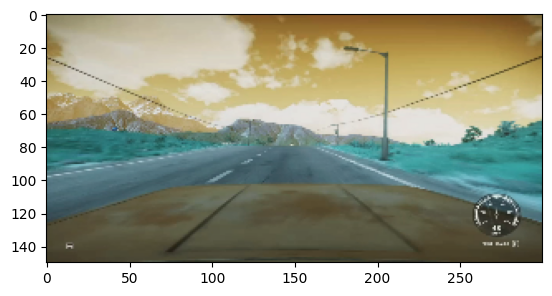

In [35]:
plt.imshow(img)